# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [12]:
def train_model(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    data_monitors={'acc':lambda y,t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    optimiser = Optimiser(model,error,learning_rule,train_data,valid_data,data_monitors,notebook=notebook)
    
    stats,keys,run_time = optimiser.train(num_epochs=num_epochs,stats_interval=stats_interval)
    
    return stats,keys

In [264]:
def plot(models,stats_interval,notebook=True,value_to_be_varried='width'):
    #Value to be varried could be width,depth,L1/L2
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    
    for k in ['error(train)','error(valid)']:
        for stats,keys,parameter_val in models: #parameter_val is the numeric value of the value_to_be_varried
            if k == 'error(train)':
                ax_1.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],
                         label=k.replace('error',f'{value_to_be_varried}{parameter_val}'))
            else:
                ax_1.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],'--',
                         label=k.replace('error',f'{value_to_be_varried}{parameter_val}'))
    ax_1.legend(loc="upper center",bbox_to_anchor=(0.5,-0.2))
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    
    for k in ['acc(train)','acc(valid)']:
        for stats,keys,parameter_val in models: #parameter_val is the numeric value of the value_to_be_varried
            if k == 'acc(train)':
                ax_2.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],
                         label=k.replace('acc',f'{value_to_be_varried}{parameter_val}'))
            else:
                ax_2.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],'--',
                         label=k.replace('acc',f'{value_to_be_varried}{parameter_val}'))
    
    ax_2.legend(loc="upper center",bbox_to_anchor=(0.5,-0.2))
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel("Accuracy")
    
    return fig_1,ax_1,fig_2,ax_2    

In [324]:
def plot_with_generalization_gap(models,notebook=True):
    #Value to be varried could be width,depth,L1/L2
    fig = plt.figure(figsize=(8, 4))
    ax_1 = fig.add_subplot(111, xscale='log')
    penalties = [1e-5,1e-4,1e-3,1e-2,1e-1]
    valid_acc_l1 = []
    valid_acc_l2 = []
    gen_gap_l1 = []
    gen_gap_l2 = []
    for stats,keys,penalty_name,penalty_val in models: #penalty is either L1 or L2
        if penalty_name == "L1":
            valid_acc_l1.append(stats[1:,keys["acc(valid)"]][-1])
        elif penalty_name == "L2":
            valid_acc_l2.append(stats[1:,keys["acc(valid)"]][-1])
        
    lns1 = ax_1.plot(penalties,valid_acc_l1,label='L1 Val Acc')
    lns2 = ax_1.plot(penalties,valid_acc_l2,label='L2 Val Acc')
            
    ax_2 = ax_1.twinx()
    
    
    for stats,keys,penalty_name,penalty_val in models: #penalty is either L1 or L2
        if penalty_name=="L1":
            gen_gap_l1.append(abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1]))
        elif penalty_name=="L2":
            gen_gap_l2.append(abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1]))
        
    lns3 = ax_2.plot(penalties,gen_gap_l1,'--',label='L1 Gap')
    lns4 = ax_2.plot(penalties,gen_gap_l2,'--',label='L2 Gap')
    lns = lns1 + lns2 + lns3 + lns4
    labels = [l.get_label() for l in lns]
    ax_1.legend(lns,labels,loc=0)
    ax_1.set_xlabel('Weight decay value')
    ax_1.set_ylabel('Accuracy')
    ax_2.set_xlabel('Weight decay value')
    ax_2.set_ylabel("Generalization gap")
    ax_2.set_ylim(0.0,1.0)
    ax_1.set_ylim(0.0,1.0)
    #ax_1.set_xlim(0,1e-1)
    ax_1.set_xticks(penalties)
    #ax_1.set_xticklabels([0,'$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])
    #ax_1.xaxis.set_minor_locator(plt.MultipleLocator(1e-5))
    
    return fig,ax_1,ax_2    

In [323]:
def plot_dropout(models,notebook=True):
    #Value to be varried could be width,depth,L1/L2
    fig = plt.figure(figsize=(8, 4))
    ax_1 = fig.add_subplot(111)
    
    dropouts_val = [0.9,0.7,0.5,0.3,0.1]
    dropout_val_accs = []
    dropout_val_gaps = []
    
    
    #for k in ['error(train)','error(valid)']:
    for stats,keys in models: #penalty is either L1 or L2
        dropout_val_accs.append(stats[1:,keys['acc(valid)']][-1])
        #generalization_gap = abs(stats[1:,keys['error(valid)']] - stats[1:,keys['error(train)']]) 
        
    lns1 = ax_1.plot(dropouts_val,dropout_val_accs,label='Val Acc')
            
    ax_2 = ax_1.twinx()
    
    #for k in ['acc(train)','acc(valid)']:
    for stats,keys in models: #penalty is either L1 or L2
        gap = abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1])
        dropout_val_gaps.append(gap)
        
    
    lns2 = ax_2.plot(dropouts_val,dropout_val_gaps,'-b',label='Gap')
    lns = lns1 + lns2
    labels = [l.get_label() for l in lns]
    
            
    ax_1.legend(lns,labels,loc=0)
    ax_1.set_xlabel('Dropout value')
    ax_1.set_ylabel('Accuracy')
    ax_2.set_xlabel('Dropout value')
    ax_2.set_ylabel("Generalization gap")
    ax_2.set_ylim(0.0,1.0)
    ax_1.set_ylim(0.0,1.0)
    #ax_1.set_xlim(1e-5,1e-1)
    ax_1.set_xticks([0.1,0.3,0.5,0.7,0.9])
    ax_1.set_xticklabels([0.1,0.3,0.5,0.7,0.9],fontsize=11)
    
    return fig,ax_1,ax_2  

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x2aba7b9b28e0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x2aba7b9b23d0>)


In [16]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty,L2Penalty
#setup hyperparameters
learning_rate = 0.1
num_epochs = 1
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
models = []
error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats,keys = train_model(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
models.append((stats,keys,1)) #Since there is only 1 hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.4s to complete
    error(train)=8.36e-01, acc(train)=7.52e-01, error(valid)=8.60e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 10.0s to complete
    error(train)=6.41e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.0s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=6.14e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.5s to complete
    error(train)=5.18e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.3s to complete
    error(train)=4.92e-01, acc(train)=8.38e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 38.4s to complete
    error(train)=4.43e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.4s to complete
    error(train)=4.27e-01, acc(train)=8.55e-01, error(valid)=5.33e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 12.0s to complete
    error(train)=4.12e-01, acc(train)=8.59e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 11.8s to complete
    error(train)=3.91e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 10.0s to complete
    error(train)=3.87e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.8s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.8s to complete
    error(train)=1.08e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.8s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.8s to complete
    error(train)=9.51e-01, acc(train)=7.27e-01, error(valid)=9.77e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.9s to complete
    error(train)=9.12e-01, acc(train)=7.36e-01, error(valid)=9.38e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.8s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=9.02e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.8s to complete
    error(train)=8.41e-01, acc(train)=7.54e-01, error(valid)=8.77e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.8s to complete
    error(train)=8.17e-01, acc(train)=7.60e-01, error(valid)=8.58e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.8s to complete
    error(train)=8.05e-01, acc(train)=7.62e-01, error(valid)=8.46e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.8s to complete
    error(train)=7.81e-01, acc(train)=7.69e-01, error(valid)=8.30e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.9s to complete
    error(train)=7.67e-01, acc(train)=7.71e-01, error(valid)=8.18e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.8s to complete
    error(train)=7.51e-01, acc(train)=7.78e-01, error(valid)=8.04e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.8s to complete
    error(train)=7.46e-01, acc(train)=7.76e-01, error(valid)=8.03e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.8s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.93e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.8s to complete
    error(train)=7.26e-01, acc(train)=7.80e-01, error(valid)=7.88e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.8s to complete
    error(train)=7.20e-01, acc(train)=7.83e-01, error(valid)=7.85e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.8s to complete
    error(train)=7.13e-01, acc(train)=7.83e-01, error(valid)=7.82e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.8s to complete
    error(train)=7.04e-01, acc(train)=7.88e-01, error(valid)=7.72e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.8s to complete
    error(train)=6.99e-01, acc(train)=7.89e-01, error(valid)=7.67e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.8s to complete
    error(train)=6.97e-01, acc(train)=7.88e-01, error(valid)=7.70e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.8s to complete
    error(train)=6.90e-01, acc(train)=7.90e-01, error(valid)=7.65e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.8s to complete
    error(train)=6.90e-01, acc(train)=7.89e-01, error(valid)=7.69e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.8s to complete
    error(train)=6.84e-01, acc(train)=7.92e-01, error(valid)=7.65e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.8s to complete
    error(train)=6.75e-01, acc(train)=7.95e-01, error(valid)=7.52e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.9s to complete
    error(train)=6.75e-01, acc(train)=7.92e-01, error(valid)=7.54e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.8s to complete
    error(train)=6.65e-01, acc(train)=7.96e-01, error(valid)=7.48e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.8s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=7.46e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.9s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=7.48e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.8s to complete
    error(train)=6.56e-01, acc(train)=7.96e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.8s to complete
    error(train)=6.54e-01, acc(train)=8.00e-01, error(valid)=7.41e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.8s to complete
    error(train)=6.50e-01, acc(train)=7.99e-01, error(valid)=7.38e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.8s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=7.37e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.8s to complete
    error(train)=6.46e-01, acc(train)=8.00e-01, error(valid)=7.36e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.8s to complete
    error(train)=6.40e-01, acc(train)=8.03e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.9s to complete
    error(train)=6.37e-01, acc(train)=8.03e-01, error(valid)=7.30e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.8s to complete
    error(train)=6.38e-01, acc(train)=8.02e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.8s to complete
    error(train)=6.37e-01, acc(train)=8.04e-01, error(valid)=7.30e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.9s to complete
    error(train)=6.32e-01, acc(train)=8.04e-01, error(valid)=7.30e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.8s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=7.24e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.6s to complete
    error(train)=6.24e-01, acc(train)=8.06e-01, error(valid)=7.21e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.6s to complete
    error(train)=6.23e-01, acc(train)=8.08e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.9s to complete
    error(train)=6.22e-01, acc(train)=8.09e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.8s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.8s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=7.20e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.9s to complete
    error(train)=6.26e-01, acc(train)=8.03e-01, error(valid)=7.31e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.8s to complete
    error(train)=6.17e-01, acc(train)=8.07e-01, error(valid)=7.19e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.8s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.9s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=7.26e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.8s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.8s to complete
    error(train)=6.15e-01, acc(train)=8.07e-01, error(valid)=7.24e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.8s to complete
    error(train)=6.08e-01, acc(train)=8.11e-01, error(valid)=7.21e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.8s to complete
    error(train)=6.01e-01, acc(train)=8.14e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.0s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=7.17e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.9s to complete
    error(train)=6.09e-01, acc(train)=8.08e-01, error(valid)=7.23e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.0s to complete
    error(train)=5.99e-01, acc(train)=8.12e-01, error(valid)=7.13e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.9s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=7.19e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.8s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=7.15e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.8s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=7.15e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.9s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=7.20e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.8s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=7.12e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.8s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.9s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.9s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.9s to complete
    error(train)=5.92e-01, acc(train)=8.13e-01, error(valid)=7.17e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.8s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.8s to complete
    error(train)=5.87e-01, acc(train)=8.14e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.9s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=7.15e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.9s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=7.17e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.8s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.9s to complete
    error(train)=5.92e-01, acc(train)=8.13e-01, error(valid)=7.26e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.9s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=7.09e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.9s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.9s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.9s to complete
    error(train)=5.72e-01, acc(train)=8.20e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.9s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.9s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.9s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.9s to complete
    error(train)=5.68e-01, acc(train)=8.20e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.9s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=7.12e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.8s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.8s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.8s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=7.12e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.8s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.8s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.8s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.8s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.9s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.8s to complete
    error(train)=5.69e-01, acc(train)=8.19e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.8s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.8s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.7s to complete
    error(train)=5.60e-01, acc(train)=8.23e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.8s to complete
    error(train)=5.61e-01, acc(train)=8.23e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.7s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=7.12e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.7s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.12e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.8s to complete
    error(train)=5.62e-01, acc(train)=8.20e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.8s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.8s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=7.11e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.9s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=1.07e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=9.00e-01, acc(train)=7.41e-01, error(valid)=9.28e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.4s to complete
    error(train)=8.05e-01, acc(train)=7.61e-01, error(valid)=8.39e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.3s to complete
    error(train)=7.34e-01, acc(train)=7.77e-01, error(valid)=7.76e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.3s to complete
    error(train)=6.89e-01, acc(train)=7.92e-01, error(valid)=7.39e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=6.54e-01, acc(train)=7.98e-01, error(valid)=7.09e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.3s to complete
    error(train)=6.15e-01, acc(train)=8.10e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.3s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=6.71e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.3s to complete
    error(train)=5.95e-01, acc(train)=8.12e-01, error(valid)=6.67e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.2s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=6.46e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.2s to complete
    error(train)=5.65e-01, acc(train)=8.17e-01, error(valid)=6.47e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.1s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=6.28e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.1s to complete
    error(train)=5.35e-01, acc(train)=8.27e-01, error(valid)=6.27e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=5.16e-01, acc(train)=8.35e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.3s to complete
    error(train)=5.14e-01, acc(train)=8.32e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.3s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=6.18e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.3s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=6.04e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.5s to complete
    error(train)=4.85e-01, acc(train)=8.40e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.5s to complete
    error(train)=4.72e-01, acc(train)=8.45e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.5s to complete
    error(train)=4.78e-01, acc(train)=8.44e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.4s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.97e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.98e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.1s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.94e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.3s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.3s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.2s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.3s to complete
    error(train)=4.46e-01, acc(train)=8.51e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.3s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.3s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.92e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.3s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.91e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.5s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.4s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=6.06e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.3s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.97e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.3s to complete
    error(train)=4.16e-01, acc(train)=8.61e-01, error(valid)=5.90e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.3s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.3s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.91e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.1s to complete
    error(train)=4.15e-01, acc(train)=8.57e-01, error(valid)=5.96e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.92e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.3s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.95e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.96e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=6.03e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.3s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.99e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.2s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=6.00e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.5s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=6.03e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.3s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=6.12e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.4s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=6.12e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.5s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=6.04e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.5s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.04e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.3s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=6.17e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.4s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=6.15e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.3s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=6.09e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.3s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=6.11e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.4s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=6.17e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.4s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=6.13e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.4s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=6.17e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.4s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.21e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.4s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=6.22e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.2s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=6.18e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.2s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=6.25e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.4s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.21e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.4s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=6.25e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.6s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=6.24e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.3s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=6.25e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.5s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=6.39e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.5s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=6.28e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.2s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=6.39e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.4s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.2s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=6.36e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.4s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=6.27e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.4s to complete
    error(train)=3.64e-01, acc(train)=8.75e-01, error(valid)=6.37e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.6s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=6.41e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.6s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=6.41e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.6s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=6.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.4s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=6.40e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.4s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=6.45e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.4s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=6.49e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.3s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=6.45e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.2s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.45e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.4s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.51e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.4s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.51e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.4s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=6.51e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.4s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=6.57e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.5s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=6.56e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.5s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=6.61e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.3s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=6.56e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.4s to complete
    error(train)=3.43e-01, acc(train)=8.82e-01, error(valid)=6.51e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.4s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=6.67e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=6.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.65e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.4s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.69e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.4s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=6.74e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.3s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=6.80e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.4s to complete
    error(train)=3.45e-01, acc(train)=8.79e-01, error(valid)=6.75e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.4s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.66e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.2s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=6.85e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.2s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=6.74e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.2s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=6.79e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.2s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=6.85e-01, acc(valid)=8.09e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=9.09e-01, acc(train)=7.35e-01, error(valid)=9.31e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=7.10e-01, acc(train)=7.87e-01, error(valid)=7.46e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.68e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.5s to complete
    error(train)=5.65e-01, acc(train)=8.24e-01, error(valid)=6.26e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.4s to complete
    error(train)=4.76e-01, acc(train)=8.42e-01, error(valid)=5.64e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.4s to complete
    error(train)=4.56e-01, acc(train)=8.47e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.4s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.5s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.6s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.5s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.1s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.4s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.7s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.6s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.4s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.36e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.6s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.7s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=5.46e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.6s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=5.53e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.6s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.6s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=5.62e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.7s to complete
    error(train)=2.84e-01, acc(train)=9.00e-01, error(valid)=5.56e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.5s to complete
    error(train)=2.92e-01, acc(train)=8.95e-01, error(valid)=5.76e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.5s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=5.79e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=5.72e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.5s to complete
    error(train)=2.73e-01, acc(train)=9.04e-01, error(valid)=5.77e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.6s to complete
    error(train)=2.73e-01, acc(train)=9.01e-01, error(valid)=5.81e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.5s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=5.83e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.5s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=5.91e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.5s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=5.91e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=2.57e-01, acc(train)=9.07e-01, error(valid)=6.09e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=2.53e-01, acc(train)=9.09e-01, error(valid)=6.08e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.13e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=2.52e-01, acc(train)=9.08e-01, error(valid)=6.19e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.25e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.3s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=6.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.4s to complete
    error(train)=2.42e-01, acc(train)=9.11e-01, error(valid)=6.34e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.4s to complete
    error(train)=2.43e-01, acc(train)=9.11e-01, error(valid)=6.42e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.2s to complete
    error(train)=2.40e-01, acc(train)=9.12e-01, error(valid)=6.41e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.3s to complete
    error(train)=2.34e-01, acc(train)=9.13e-01, error(valid)=6.45e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.2s to complete
    error(train)=2.36e-01, acc(train)=9.13e-01, error(valid)=6.53e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.2s to complete
    error(train)=2.32e-01, acc(train)=9.15e-01, error(valid)=6.60e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.6s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.54e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=2.28e-01, acc(train)=9.16e-01, error(valid)=6.63e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=2.24e-01, acc(train)=9.17e-01, error(valid)=6.72e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.5s to complete
    error(train)=2.26e-01, acc(train)=9.16e-01, error(valid)=6.77e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.5s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.91e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=6.89e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=2.20e-01, acc(train)=9.18e-01, error(valid)=7.02e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.5s to complete
    error(train)=2.18e-01, acc(train)=9.19e-01, error(valid)=7.01e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=2.11e-01, acc(train)=9.22e-01, error(valid)=7.05e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.4s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=7.16e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=2.15e-01, acc(train)=9.21e-01, error(valid)=7.21e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.2s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=7.25e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.3s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.29e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.40e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=2.05e-01, acc(train)=9.23e-01, error(valid)=7.46e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.3s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.43e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.4s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=7.60e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.2s to complete
    error(train)=1.98e-01, acc(train)=9.26e-01, error(valid)=7.57e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.2s to complete
    error(train)=2.09e-01, acc(train)=9.20e-01, error(valid)=7.74e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.4s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=7.66e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.64e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.3s to complete
    error(train)=2.01e-01, acc(train)=9.23e-01, error(valid)=7.91e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=7.80e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.3s to complete
    error(train)=1.87e-01, acc(train)=9.31e-01, error(valid)=7.95e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=8.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.3s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=7.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.3s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=8.07e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.2s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=8.17e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.3s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=1.86e-01, acc(train)=9.28e-01, error(valid)=8.30e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.5s to complete
    error(train)=1.84e-01, acc(train)=9.29e-01, error(valid)=8.40e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.3s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=8.39e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.2s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.40e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.3s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=8.43e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.3s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.68e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.1s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.73e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.1s to complete
    error(train)=1.79e-01, acc(train)=9.31e-01, error(valid)=8.77e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.1s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.86e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.5s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.83e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.5s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=8.79e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.4s to complete
    error(train)=1.79e-01, acc(train)=9.30e-01, error(valid)=9.02e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.6s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.06e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=9.10e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.3s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=9.02e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.5s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=9.03e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=9.35e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.23e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.4s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=9.32e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.49e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.5s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.49e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.6s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=9.54e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.6s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=9.73e-01, acc(valid)=8.07e-01


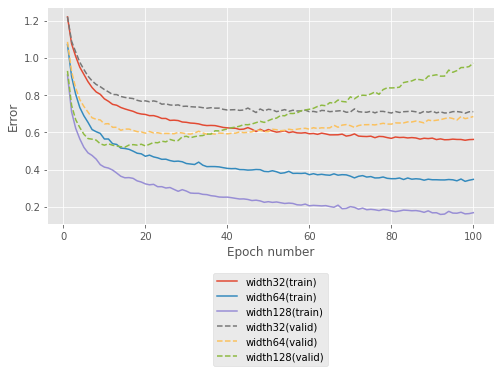

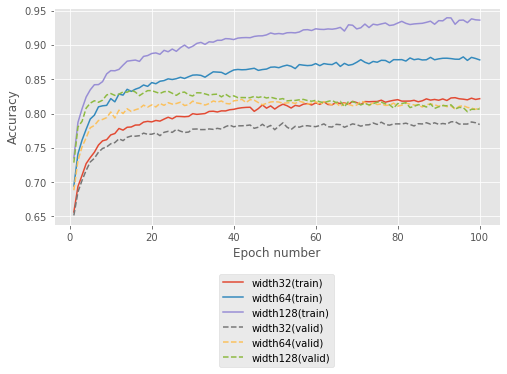

In [313]:
def vary_hidden_units_train():
    hidden_units = [32,64,128]
    learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim = 784, 47
    models = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    for hidden_dim in hidden_units:
        model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
        
        stats,keys = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats,keys,hidden_dim))
        
    fig_1,_,fig_2,_ = plot(models,stats_interval,value_to_be_varried="width")
    fig_1.savefig('error-width.pdf',bbox_inches="tight",format='pdf')
    fig_2.savefig('accuracy-width.pdf',bbox_inches="tight",format='pdf')
    
vary_hidden_units_train() 

In [89]:
def vary_hidden_layers_train():
    
    learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47,128
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    
    model_1_layer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
        
    stats_1_layer,keys_1_layer = train_model(model_1_layer, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
    
    model_2_layer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
    
    stats_2_layer,keys_2_layer = train_model(model_2_layer, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
    
    
    model_3_layer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
    
    stats_3_layer,keys_3_layer = train_model(model_3_layer, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
    
    models = [(stats_1_layer,keys_1_layer,1),(stats_2_layer,keys_2_layer,2),(stats_3_layer,keys_3_layer,3)]

    return models    
    #fig_1,_,fig_2,_ = plot(models,stats_interval,value_to_be_varried="depth")
    #fig_1.savefig('error-depth.svg',format='svg')
    #fig_2.savefig('accuracy-depth.svg',format='svg')
    
models_vary_layers = vary_hidden_layers_train() 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=9.32e-01, acc(train)=7.31e-01, error(valid)=9.46e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.39e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.3s to complete
    error(train)=6.08e-01, acc(train)=8.13e-01, error(valid)=6.54e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.07e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=5.09e-01, acc(train)=8.37e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.2s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.1s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.1s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.2s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.1s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.3s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.5s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.5s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.1s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.4s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.2s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.3s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.3s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.3s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.39e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.4s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=5.42e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=5.51e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.3s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=5.52e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.4s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=5.45e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.3s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.57e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.3s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.45e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.5s to complete
    error(train)=2.81e-01, acc(train)=9.01e-01, error(valid)=5.55e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.5s to complete
    error(train)=2.86e-01, acc(train)=8.96e-01, error(valid)=5.71e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.5s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=5.70e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.5s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=5.77e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=5.76e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.3s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=5.83e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.4s to complete
    error(train)=2.71e-01, acc(train)=9.01e-01, error(valid)=5.85e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.4s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=6.03e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.2s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=5.95e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.3s to complete
    error(train)=2.53e-01, acc(train)=9.08e-01, error(valid)=6.02e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.4s to complete
    error(train)=2.48e-01, acc(train)=9.10e-01, error(valid)=5.98e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.5s to complete
    error(train)=2.54e-01, acc(train)=9.07e-01, error(valid)=6.13e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.4s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=2.42e-01, acc(train)=9.12e-01, error(valid)=6.16e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.2s to complete
    error(train)=2.41e-01, acc(train)=9.11e-01, error(valid)=6.28e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.4s to complete
    error(train)=2.35e-01, acc(train)=9.15e-01, error(valid)=6.26e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.4s to complete
    error(train)=2.37e-01, acc(train)=9.12e-01, error(valid)=6.37e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.3s to complete
    error(train)=2.32e-01, acc(train)=9.16e-01, error(valid)=6.41e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.5s to complete
    error(train)=2.33e-01, acc(train)=9.14e-01, error(valid)=6.52e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.4s to complete
    error(train)=2.26e-01, acc(train)=9.16e-01, error(valid)=6.51e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.4s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.52e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.2s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.55e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.4s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.70e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.77e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.4s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.68e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.4s to complete
    error(train)=2.22e-01, acc(train)=9.19e-01, error(valid)=6.86e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=2.19e-01, acc(train)=9.18e-01, error(valid)=6.80e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.2s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=6.97e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.4s to complete
    error(train)=2.14e-01, acc(train)=9.18e-01, error(valid)=6.99e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.3s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.13e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.4s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.11e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.4s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=7.21e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.4s to complete
    error(train)=2.03e-01, acc(train)=9.25e-01, error(valid)=7.27e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.4s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=7.49e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=7.29e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=2.08e-01, acc(train)=9.21e-01, error(valid)=7.50e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.4s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=7.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.4s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.42e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.3s to complete
    error(train)=2.02e-01, acc(train)=9.23e-01, error(valid)=7.65e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.4s to complete
    error(train)=1.95e-01, acc(train)=9.27e-01, error(valid)=7.67e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.4s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=7.67e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.4s to complete
    error(train)=2.01e-01, acc(train)=9.24e-01, error(valid)=7.91e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=7.86e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.1s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=7.85e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.2s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=7.93e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.2s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.4s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.06e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=1.91e-01, acc(train)=9.27e-01, error(valid)=8.14e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.4s to complete
    error(train)=1.87e-01, acc(train)=9.28e-01, error(valid)=8.13e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.3s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=8.21e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.3s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=8.30e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.3s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.24e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.3s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=8.47e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.3s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=8.41e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.3s to complete
    error(train)=1.76e-01, acc(train)=9.32e-01, error(valid)=8.48e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.3s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=8.48e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.38e-01, error(valid)=8.59e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.2s to complete
    error(train)=1.73e-01, acc(train)=9.35e-01, error(valid)=8.74e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.2s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=8.69e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.3s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=8.82e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.3s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=8.77e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.3s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=9.06e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.3s to complete
    error(train)=1.66e-01, acc(train)=9.38e-01, error(valid)=9.01e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.0s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=9.09e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.4s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=9.19e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.0s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=9.24e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.4s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=9.29e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.3s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=9.32e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.38e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.2s to complete
    error(train)=1.66e-01, acc(train)=9.35e-01, error(valid)=9.52e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.2s to complete
    error(train)=1.57e-01, acc(train)=9.40e-01, error(valid)=9.45e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.2s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=9.52e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.4s to complete
    error(train)=1.62e-01, acc(train)=9.37e-01, error(valid)=9.62e-01, acc(valid)=8.07e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=7.51e-01, acc(train)=7.71e-01, error(valid)=7.72e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=6.02e-01, acc(train)=8.08e-01, error(valid)=6.47e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.8s to complete
    error(train)=5.15e-01, acc(train)=8.32e-01, error(valid)=5.81e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.8s to complete
    error(train)=4.63e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.7s to complete
    error(train)=4.33e-01, acc(train)=8.54e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.7s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.9s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.0s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.0s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.1s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.0s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.1s to complete
    error(train)=3.14e-01, acc(train)=8.86e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.0s to complete
    error(train)=2.88e-01, acc(train)=8.95e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.9s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=2.75e-01, acc(train)=8.98e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.1s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.0s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=5.24e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.1s to complete
    error(train)=2.42e-01, acc(train)=9.08e-01, error(valid)=5.26e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.0s to complete
    error(train)=2.41e-01, acc(train)=9.08e-01, error(valid)=5.41e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.9s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.44e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.0s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.73e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.8s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=5.72e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.0s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=5.83e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.0s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=5.88e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.0s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=6.11e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.0s to complete
    error(train)=2.02e-01, acc(train)=9.20e-01, error(valid)=6.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.0s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=6.46e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.7s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.43e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.1s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=6.46e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=6.54e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.0s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.83e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.8s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=6.85e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.0s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=6.96e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.1s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=7.26e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.0s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=7.21e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.0s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.40e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.50e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.0s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=7.65e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.0s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.67e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.9s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.02e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.8s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=8.05e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.1s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.14e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.1s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.17e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.1s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=8.32e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.0s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=8.50e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.0s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.77e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.9s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=8.79e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.0s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=9.05e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.9s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=9.14e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.0s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=9.41e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.0s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=9.30e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.0s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=9.54e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.51e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=9.82e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.0s to complete
    error(train)=1.47e-01, acc(train)=9.37e-01, error(valid)=9.99e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.0s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=9.94e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.9s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=9.96e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.0s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.0s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=1.03e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.04e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.0s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.07e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.0s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=1.09e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.0s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.0s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.09e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.12e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.9s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.15e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.0s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.15e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.2s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.15e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.2s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.15e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.1s to complete
    error(train)=1.24e-01, acc(train)=9.48e-01, error(valid)=1.20e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.1s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.1s to complete
    error(train)=1.30e-01, acc(train)=9.45e-01, error(valid)=1.22e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.1s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.21e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.9s to complete
    error(train)=1.07e-01, acc(train)=9.55e-01, error(valid)=1.24e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.9s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.28e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.0s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.26e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.1s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.29e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.0s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.29e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.9s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.33e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.9s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.33e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.9s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.31e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.32e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.9s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.39e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.9s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.38e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.9s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.38e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.9s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.37e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.41e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.2s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.44e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=9.94e-02, acc(train)=9.59e-01, error(valid)=1.43e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.46e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.1s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.50e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.0s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.49e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.1s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.50e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.1s to complete
    error(train)=9.70e-02, acc(train)=9.61e-01, error(valid)=1.49e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.1s to complete
    error(train)=9.90e-02, acc(train)=9.60e-01, error(valid)=1.52e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.0s to complete
    error(train)=9.23e-02, acc(train)=9.63e-01, error(valid)=1.51e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.0s to complete
    error(train)=1.11e-01, acc(train)=9.56e-01, error(valid)=1.55e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.0s to complete
    error(train)=9.77e-02, acc(train)=9.61e-01, error(valid)=1.53e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.0s to complete
    error(train)=9.56e-02, acc(train)=9.61e-01, error(valid)=1.56e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.9s to complete
    error(train)=9.96e-02, acc(train)=9.60e-01, error(valid)=1.59e+00, acc(valid)=8.14e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.5s to complete
    error(train)=6.97e-01, acc(train)=7.79e-01, error(valid)=7.26e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.5s to complete
    error(train)=5.57e-01, acc(train)=8.16e-01, error(valid)=6.01e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.6s to complete
    error(train)=4.90e-01, acc(train)=8.33e-01, error(valid)=5.55e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.5s to complete
    error(train)=4.32e-01, acc(train)=8.53e-01, error(valid)=5.17e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.5s to complete
    error(train)=4.09e-01, acc(train)=8.58e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.6s to complete
    error(train)=3.81e-01, acc(train)=8.62e-01, error(valid)=4.93e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.5s to complete
    error(train)=3.56e-01, acc(train)=8.70e-01, error(valid)=4.82e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.84e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.6s to complete
    error(train)=3.04e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.6s to complete
    error(train)=2.72e-01, acc(train)=8.96e-01, error(valid)=4.93e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.6s to complete
    error(train)=2.76e-01, acc(train)=8.93e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.6s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=5.19e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.6s to complete
    error(train)=2.63e-01, acc(train)=8.98e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.8s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=5.47e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.0s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.53e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.9s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=5.44e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.1s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.82e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.8s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=6.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.7s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=5.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.9s to complete
    error(train)=2.13e-01, acc(train)=9.12e-01, error(valid)=6.16e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.8s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.25e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.8s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=6.26e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.9s to complete
    error(train)=1.89e-01, acc(train)=9.22e-01, error(valid)=6.42e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.8s to complete
    error(train)=2.01e-01, acc(train)=9.17e-01, error(valid)=6.67e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.8s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=6.53e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.8s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=6.73e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.8s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.02e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.8s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=6.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.7s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=7.32e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.8s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.8s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.68e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.8s to complete
    error(train)=1.59e-01, acc(train)=9.33e-01, error(valid)=7.41e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.8s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=7.78e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.3s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=8.00e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.3s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.27e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.4s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=8.40e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.7s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=8.56e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.3s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=8.70e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.8s to complete
    error(train)=1.52e-01, acc(train)=9.36e-01, error(valid)=8.90e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.9s to complete
    error(train)=1.51e-01, acc(train)=9.36e-01, error(valid)=8.98e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.0s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=9.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.7s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=9.13e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.6s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=9.48e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.7s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=9.39e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.8s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=9.54e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.8s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.72e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.9s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.91e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.7s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.04e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.7s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.03e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.8s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.04e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.8s to complete
    error(train)=1.30e-01, acc(train)=9.48e-01, error(valid)=1.07e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.8s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.11e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.11e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.7s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.12e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.7s to complete
    error(train)=1.30e-01, acc(train)=9.45e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.6s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.14e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.7s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.12e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.7s to complete
    error(train)=1.31e-01, acc(train)=9.48e-01, error(valid)=1.16e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.7s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.18e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.7s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.14e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.7s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.21e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.7s to complete
    error(train)=1.21e-01, acc(train)=9.52e-01, error(valid)=1.22e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.21e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.7s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.27e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.7s to complete
    error(train)=1.18e-01, acc(train)=9.54e-01, error(valid)=1.31e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.7s to complete
    error(train)=1.33e-01, acc(train)=9.48e-01, error(valid)=1.29e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.6s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.31e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.7s to complete
    error(train)=1.23e-01, acc(train)=9.51e-01, error(valid)=1.35e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.7s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.32e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.34e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.37e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.7s to complete
    error(train)=1.30e-01, acc(train)=9.50e-01, error(valid)=1.38e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.8s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.39e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.7s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.38e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.7s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=1.38e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.7s to complete
    error(train)=1.41e-01, acc(train)=9.45e-01, error(valid)=1.41e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=9.61e-02, acc(train)=9.62e-01, error(valid)=1.38e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.48e-01, error(valid)=1.50e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.7s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.47e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.7s to complete
    error(train)=1.24e-01, acc(train)=9.53e-01, error(valid)=1.49e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=9.95e-02, acc(train)=9.60e-01, error(valid)=1.47e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.8s to complete
    error(train)=1.25e-01, acc(train)=9.53e-01, error(valid)=1.56e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.5s to complete
    error(train)=1.18e-01, acc(train)=9.54e-01, error(valid)=1.57e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.7s to complete
    error(train)=1.20e-01, acc(train)=9.54e-01, error(valid)=1.59e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.5s to complete
    error(train)=1.07e-01, acc(train)=9.58e-01, error(valid)=1.55e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.7s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.57e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.0s to complete
    error(train)=1.26e-01, acc(train)=9.53e-01, error(valid)=1.61e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=1.11e-01, acc(train)=9.57e-01, error(valid)=1.60e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.7s to complete
    error(train)=1.00e-01, acc(train)=9.60e-01, error(valid)=1.58e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=1.63e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.5s to complete
    error(train)=1.05e-01, acc(train)=9.60e-01, error(valid)=1.66e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.7s to complete
    error(train)=1.16e-01, acc(train)=9.57e-01, error(valid)=1.65e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.8s to complete
    error(train)=1.27e-01, acc(train)=9.52e-01, error(valid)=1.69e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.8s to complete
    error(train)=1.01e-01, acc(train)=9.61e-01, error(valid)=1.63e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=1.12e-01, acc(train)=9.58e-01, error(valid)=1.68e+00, acc(valid)=8.23e-01


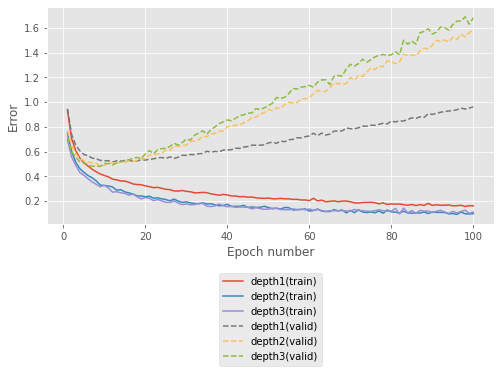

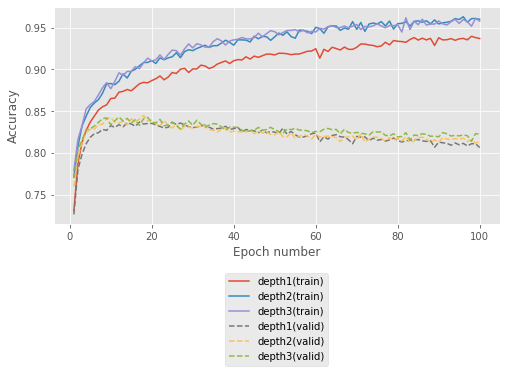

In [312]:
fig_1,_,fig_2,_ = plot(models_vary_layers,stats_interval=1,value_to_be_varried="depth")
fig_1.savefig('error-depth.pdf',bbox_inches = "tight",format='pdf')
fig_2.savefig('accuracy-depth.pdf',bbox_inches = "tight",format='pdf')

In [182]:
from mlp.penalties import L1Penalty,L2Penalty
def vary_penalty_train():
    penalties = [1e-5,1e-4,1e-3,1e-2,1e-1]
    learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47, 128
    models = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    for penalty in penalties:
        model = MultipleLayerModel([
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty), 
                    biases_penalty = L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty), 
                   biases_penalty = L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty),
                   biases_penalty = L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty),
                   biases_penalty = L1Penalty(penalty))])
        
        stats,keys = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats,keys,'L1',penalty))
        
    for penalty in penalties:
        model = MultipleLayerModel([
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty),
                   biases_penalty = L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty),
                   biases_penalty = L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty),
                   biases_penalty = L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty),
                   biases_penalty = L2Penalty(penalty))])
        
        stats_2,keys_2 = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats_2,keys_2,'L2',penalty))
    
        
    #fig_1,_,_ = plot_with_generalization_gap(models)
    #fig_1.savefig('penalty.svg',format='svg')
    return models

models_penalties = vary_penalty_train()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=7.08e-01, acc(train)=7.78e-01, error(valid)=7.39e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.2s to complete
    error(train)=5.77e-01, acc(train)=8.08e-01, error(valid)=6.30e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.9s to complete
    error(train)=5.04e-01, acc(train)=8.33e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.2s to complete
    error(train)=4.49e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.6s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.1s to complete
    error(train)=3.87e-01, acc(train)=8.63e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.9s to complete
    error(train)=3.79e-01, acc(train)=8.65e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.9s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=4.73e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.0s to complete
    error(train)=3.52e-01, acc(train)=8.70e-01, error(valid)=4.93e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.0s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=4.79e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.4s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.6s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=4.70e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.6s to complete
    error(train)=2.96e-01, acc(train)=8.90e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.0s to complete
    error(train)=2.87e-01, acc(train)=8.92e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=4.70e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.0s to complete
    error(train)=2.73e-01, acc(train)=8.95e-01, error(valid)=4.87e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.0s to complete
    error(train)=2.84e-01, acc(train)=8.91e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.1s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=4.86e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.9s to complete
    error(train)=2.66e-01, acc(train)=8.97e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=2.50e-01, acc(train)=9.03e-01, error(valid)=4.95e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.0s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=5.04e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.1s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=5.26e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.6s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=5.25e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.7s to complete
    error(train)=2.35e-01, acc(train)=9.06e-01, error(valid)=5.24e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.0s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=5.41e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.8s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=5.28e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.2s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=5.37e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.9s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=5.40e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.0s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=5.62e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.5s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=5.57e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.5s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=5.60e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=5.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.9s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=5.75e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.9s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.04e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.3s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=6.10e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.2s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=6.10e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.2s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.14e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.1s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=6.36e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=6.17e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.3s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=6.17e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.2s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.36e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.3s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=6.51e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.2s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=6.43e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.1s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=6.90e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.3s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=6.73e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.3s to complete
    error(train)=1.70e-01, acc(train)=9.29e-01, error(valid)=6.69e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.3s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=6.95e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.3s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=6.77e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.1s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=7.02e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.2s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=6.92e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.3s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=6.99e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.3s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=7.10e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.3s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=6.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.3s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.35e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.4s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=7.03e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.3s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=7.61e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.2s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=7.38e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.2s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=7.23e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=1.46e-01, acc(train)=9.39e-01, error(valid)=7.37e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=7.57e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.1s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.63e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.3s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=7.70e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=7.63e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.3s to complete
    error(train)=1.41e-01, acc(train)=9.41e-01, error(valid)=7.51e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.2s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.3s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=7.86e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.3s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=7.92e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.0s to complete
    error(train)=1.35e-01, acc(train)=9.43e-01, error(valid)=7.81e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=8.09e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.2s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.06e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=7.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=8.27e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=7.96e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.4s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=8.33e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.2s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=8.14e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.1s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=8.24e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.2s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=8.41e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.5s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=8.37e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.2s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=8.45e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.2s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=8.74e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.3s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=8.70e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.3s to complete
    error(train)=1.50e-01, acc(train)=9.41e-01, error(valid)=8.81e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.2s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=8.82e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.4s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=8.77e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.3s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=9.07e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.2s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=8.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.2s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=8.76e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.6s to complete
    error(train)=1.56e-01, acc(train)=9.38e-01, error(valid)=8.97e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.2s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=9.03e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.4s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=8.91e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.3s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=9.24e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.2s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=9.06e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.4s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=9.05e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.8s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=9.21e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.3s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=9.26e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.1s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=9.37e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.2s to complete
    error(train)=1.36e-01, acc(train)=9.46e-01, error(valid)=9.57e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.3s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=9.48e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.1s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=9.29e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.1s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=9.43e-01, acc(valid)=8.33e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.2s to complete
    error(train)=7.46e-01, acc(train)=7.69e-01, error(valid)=7.65e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.1s to complete
    error(train)=6.04e-01, acc(train)=8.06e-01, error(valid)=6.32e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.0s to complete
    error(train)=5.43e-01, acc(train)=8.24e-01, error(valid)=5.75e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.2s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=5.42e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.3s to complete
    error(train)=5.23e-01, acc(train)=8.23e-01, error(valid)=5.58e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.5s to complete
    error(train)=4.77e-01, acc(train)=8.39e-01, error(valid)=5.12e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.4s to complete
    error(train)=4.71e-01, acc(train)=8.42e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.6s to complete
    error(train)=4.75e-01, acc(train)=8.37e-01, error(valid)=5.17e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.2s to complete
    error(train)=4.49e-01, acc(train)=8.47e-01, error(valid)=4.91e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.0s to complete
    error(train)=4.48e-01, acc(train)=8.47e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.1s to complete
    error(train)=4.38e-01, acc(train)=8.50e-01, error(valid)=4.88e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.4s to complete
    error(train)=4.38e-01, acc(train)=8.50e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.4s to complete
    error(train)=4.16e-01, acc(train)=8.57e-01, error(valid)=4.65e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.4s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.6s to complete
    error(train)=4.14e-01, acc(train)=8.58e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=4.23e-01, acc(train)=8.53e-01, error(valid)=4.81e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.5s to complete
    error(train)=3.93e-01, acc(train)=8.64e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.3s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=4.73e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.5s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=4.65e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.4s to complete
    error(train)=4.03e-01, acc(train)=8.57e-01, error(valid)=4.61e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.6s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.4s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.5s to complete
    error(train)=3.96e-01, acc(train)=8.61e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.3s to complete
    error(train)=3.93e-01, acc(train)=8.62e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=4.02e-01, acc(train)=8.58e-01, error(valid)=4.63e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.5s to complete
    error(train)=3.85e-01, acc(train)=8.64e-01, error(valid)=4.47e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.5s to complete
    error(train)=3.92e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.3s to complete
    error(train)=3.84e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.1s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.4s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.4s to complete
    error(train)=4.07e-01, acc(train)=8.56e-01, error(valid)=4.74e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.58e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.4s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=4.47e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.6s to complete
    error(train)=3.88e-01, acc(train)=8.61e-01, error(valid)=4.56e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.8s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.44e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.8s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.8s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.5s to complete
    error(train)=3.69e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.5s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=4.50e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.5s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.4s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.5s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=4.33e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.4s to complete
    error(train)=3.59e-01, acc(train)=8.71e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.3s to complete
    error(train)=3.67e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.4s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.3s to complete
    error(train)=3.65e-01, acc(train)=8.69e-01, error(valid)=4.44e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.4s to complete
    error(train)=3.68e-01, acc(train)=8.69e-01, error(valid)=4.50e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.2s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.5s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.5s to complete
    error(train)=3.69e-01, acc(train)=8.67e-01, error(valid)=4.51e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.6s to complete
    error(train)=3.61e-01, acc(train)=8.72e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.4s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.2s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.3s to complete
    error(train)=3.51e-01, acc(train)=8.75e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.4s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.3s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.4s to complete
    error(train)=3.54e-01, acc(train)=8.75e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.3s to complete
    error(train)=3.52e-01, acc(train)=8.75e-01, error(valid)=4.33e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.4s to complete
    error(train)=3.46e-01, acc(train)=8.76e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.1s to complete
    error(train)=3.65e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.1s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=3.65e-01, acc(train)=8.69e-01, error(valid)=4.54e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.4s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.4s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.4s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.4s to complete
    error(train)=3.48e-01, acc(train)=8.75e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.4s to complete
    error(train)=3.45e-01, acc(train)=8.75e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.4s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=4.24e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.3s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=3.46e-01, acc(train)=8.77e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=3.42e-01, acc(train)=8.78e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=3.50e-01, acc(train)=8.74e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.4s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.4s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=4.31e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.4s to complete
    error(train)=3.58e-01, acc(train)=8.72e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.4s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=4.42e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.4s to complete
    error(train)=3.46e-01, acc(train)=8.75e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.3s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=4.41e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.5s to complete
    error(train)=3.53e-01, acc(train)=8.71e-01, error(valid)=4.39e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.5s to complete
    error(train)=3.43e-01, acc(train)=8.76e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.6s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.6s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.5s to complete
    error(train)=3.50e-01, acc(train)=8.73e-01, error(valid)=4.44e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.7s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.7s to complete
    error(train)=3.41e-01, acc(train)=8.78e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.3s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.2s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.3s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.4s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.8s to complete
    error(train)=3.33e-01, acc(train)=8.80e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.4s to complete
    error(train)=3.41e-01, acc(train)=8.76e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.4s to complete
    error(train)=3.43e-01, acc(train)=8.76e-01, error(valid)=4.37e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.4s to complete
    error(train)=3.47e-01, acc(train)=8.75e-01, error(valid)=4.40e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.5s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.2s to complete
    error(train)=3.40e-01, acc(train)=8.77e-01, error(valid)=4.39e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.1s to complete
    error(train)=3.41e-01, acc(train)=8.75e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.9s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.3s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=1.32e+00, acc(train)=6.26e-01, error(valid)=1.33e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.5s to complete
    error(train)=1.17e+00, acc(train)=6.63e-01, error(valid)=1.18e+00, acc(valid)=6.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.2s to complete
    error(train)=1.09e+00, acc(train)=6.85e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.1s to complete
    error(train)=1.05e+00, acc(train)=6.92e-01, error(valid)=1.06e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.3s to complete
    error(train)=1.00e+00, acc(train)=7.08e-01, error(valid)=1.01e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.3s to complete
    error(train)=9.76e-01, acc(train)=7.14e-01, error(valid)=9.81e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.3s to complete
    error(train)=9.67e-01, acc(train)=7.13e-01, error(valid)=9.77e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=9.65e-01, acc(train)=7.15e-01, error(valid)=9.78e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.2s to complete
    error(train)=9.24e-01, acc(train)=7.25e-01, error(valid)=9.36e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.1s to complete
    error(train)=9.04e-01, acc(train)=7.30e-01, error(valid)=9.20e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.2s to complete
    error(train)=9.12e-01, acc(train)=7.25e-01, error(valid)=9.23e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.4s to complete
    error(train)=8.89e-01, acc(train)=7.32e-01, error(valid)=9.03e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.4s to complete
    error(train)=8.78e-01, acc(train)=7.38e-01, error(valid)=8.92e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.3s to complete
    error(train)=8.96e-01, acc(train)=7.29e-01, error(valid)=9.09e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=8.59e-01, acc(train)=7.41e-01, error(valid)=8.74e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=8.60e-01, acc(train)=7.38e-01, error(valid)=8.75e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.3s to complete
    error(train)=8.95e-01, acc(train)=7.29e-01, error(valid)=9.10e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.4s to complete
    error(train)=8.62e-01, acc(train)=7.37e-01, error(valid)=8.76e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.4s to complete
    error(train)=8.47e-01, acc(train)=7.41e-01, error(valid)=8.60e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=8.44e-01, acc(train)=7.45e-01, error(valid)=8.59e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.2s to complete
    error(train)=8.30e-01, acc(train)=7.50e-01, error(valid)=8.42e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.3s to complete
    error(train)=8.26e-01, acc(train)=7.47e-01, error(valid)=8.41e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.4s to complete
    error(train)=8.20e-01, acc(train)=7.49e-01, error(valid)=8.34e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.5s to complete
    error(train)=8.08e-01, acc(train)=7.53e-01, error(valid)=8.22e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.4s to complete
    error(train)=8.09e-01, acc(train)=7.56e-01, error(valid)=8.24e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.3s to complete
    error(train)=8.14e-01, acc(train)=7.53e-01, error(valid)=8.31e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.4s to complete
    error(train)=8.42e-01, acc(train)=7.42e-01, error(valid)=8.58e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.3s to complete
    error(train)=8.31e-01, acc(train)=7.44e-01, error(valid)=8.48e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.4s to complete
    error(train)=7.98e-01, acc(train)=7.57e-01, error(valid)=8.16e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.3s to complete
    error(train)=8.19e-01, acc(train)=7.51e-01, error(valid)=8.29e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.4s to complete
    error(train)=7.90e-01, acc(train)=7.58e-01, error(valid)=8.03e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.3s to complete
    error(train)=8.04e-01, acc(train)=7.56e-01, error(valid)=8.17e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.4s to complete
    error(train)=8.02e-01, acc(train)=7.50e-01, error(valid)=8.14e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.4s to complete
    error(train)=8.17e-01, acc(train)=7.50e-01, error(valid)=8.29e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.4s to complete
    error(train)=7.86e-01, acc(train)=7.58e-01, error(valid)=8.00e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.4s to complete
    error(train)=8.12e-01, acc(train)=7.49e-01, error(valid)=8.30e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.4s to complete
    error(train)=8.02e-01, acc(train)=7.55e-01, error(valid)=8.13e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.4s to complete
    error(train)=8.05e-01, acc(train)=7.56e-01, error(valid)=8.21e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.9s to complete
    error(train)=7.89e-01, acc(train)=7.57e-01, error(valid)=8.01e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.3s to complete
    error(train)=7.94e-01, acc(train)=7.57e-01, error(valid)=8.08e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.1s to complete
    error(train)=7.86e-01, acc(train)=7.62e-01, error(valid)=7.98e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.8s to complete
    error(train)=7.98e-01, acc(train)=7.57e-01, error(valid)=8.08e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.9s to complete
    error(train)=7.86e-01, acc(train)=7.61e-01, error(valid)=7.98e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.1s to complete
    error(train)=7.80e-01, acc(train)=7.57e-01, error(valid)=7.92e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.1s to complete
    error(train)=7.69e-01, acc(train)=7.65e-01, error(valid)=7.81e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.9s to complete
    error(train)=7.79e-01, acc(train)=7.62e-01, error(valid)=7.87e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.3s to complete
    error(train)=7.85e-01, acc(train)=7.58e-01, error(valid)=7.97e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.8s to complete
    error(train)=7.75e-01, acc(train)=7.62e-01, error(valid)=7.85e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.9s to complete
    error(train)=7.70e-01, acc(train)=7.64e-01, error(valid)=7.81e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.8s to complete
    error(train)=7.84e-01, acc(train)=7.59e-01, error(valid)=7.99e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.8s to complete
    error(train)=7.82e-01, acc(train)=7.60e-01, error(valid)=8.00e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.0s to complete
    error(train)=7.73e-01, acc(train)=7.64e-01, error(valid)=7.86e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.9s to complete
    error(train)=7.87e-01, acc(train)=7.53e-01, error(valid)=8.04e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.1s to complete
    error(train)=7.63e-01, acc(train)=7.65e-01, error(valid)=7.77e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.1s to complete
    error(train)=7.65e-01, acc(train)=7.65e-01, error(valid)=7.78e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.0s to complete
    error(train)=7.61e-01, acc(train)=7.67e-01, error(valid)=7.76e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.9s to complete
    error(train)=7.73e-01, acc(train)=7.64e-01, error(valid)=7.90e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.5s to complete
    error(train)=7.78e-01, acc(train)=7.60e-01, error(valid)=7.92e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.4s to complete
    error(train)=7.79e-01, acc(train)=7.59e-01, error(valid)=7.93e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.4s to complete
    error(train)=7.61e-01, acc(train)=7.64e-01, error(valid)=7.77e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=7.77e-01, acc(train)=7.60e-01, error(valid)=7.91e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.3s to complete
    error(train)=7.73e-01, acc(train)=7.61e-01, error(valid)=7.88e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.4s to complete
    error(train)=7.64e-01, acc(train)=7.63e-01, error(valid)=7.84e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.4s to complete
    error(train)=7.73e-01, acc(train)=7.62e-01, error(valid)=7.88e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.4s to complete
    error(train)=7.73e-01, acc(train)=7.59e-01, error(valid)=7.88e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.6s to complete
    error(train)=7.64e-01, acc(train)=7.63e-01, error(valid)=7.76e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.4s to complete
    error(train)=7.54e-01, acc(train)=7.67e-01, error(valid)=7.70e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=7.86e-01, acc(train)=7.59e-01, error(valid)=8.03e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=7.62e-01, acc(train)=7.67e-01, error(valid)=7.81e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.4s to complete
    error(train)=7.65e-01, acc(train)=7.66e-01, error(valid)=7.79e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=7.52e-01, acc(train)=7.69e-01, error(valid)=7.70e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.4s to complete
    error(train)=7.58e-01, acc(train)=7.66e-01, error(valid)=7.75e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.4s to complete
    error(train)=7.55e-01, acc(train)=7.68e-01, error(valid)=7.67e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.3s to complete
    error(train)=7.75e-01, acc(train)=7.58e-01, error(valid)=7.91e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.4s to complete
    error(train)=7.58e-01, acc(train)=7.63e-01, error(valid)=7.70e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.4s to complete
    error(train)=7.68e-01, acc(train)=7.60e-01, error(valid)=7.84e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.9s to complete
    error(train)=8.02e-01, acc(train)=7.52e-01, error(valid)=8.22e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.7s to complete
    error(train)=7.63e-01, acc(train)=7.65e-01, error(valid)=7.79e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.1s to complete
    error(train)=7.46e-01, acc(train)=7.69e-01, error(valid)=7.62e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.2s to complete
    error(train)=7.54e-01, acc(train)=7.69e-01, error(valid)=7.65e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.7s to complete
    error(train)=7.68e-01, acc(train)=7.63e-01, error(valid)=7.85e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.8s to complete
    error(train)=7.56e-01, acc(train)=7.67e-01, error(valid)=7.76e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.4s to complete
    error(train)=7.51e-01, acc(train)=7.69e-01, error(valid)=7.62e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.3s to complete
    error(train)=7.58e-01, acc(train)=7.66e-01, error(valid)=7.73e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.0s to complete
    error(train)=7.66e-01, acc(train)=7.66e-01, error(valid)=7.79e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.8s to complete
    error(train)=7.75e-01, acc(train)=7.60e-01, error(valid)=7.92e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.9s to complete
    error(train)=7.74e-01, acc(train)=7.60e-01, error(valid)=7.88e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.2s to complete
    error(train)=7.57e-01, acc(train)=7.65e-01, error(valid)=7.75e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.3s to complete
    error(train)=7.69e-01, acc(train)=7.62e-01, error(valid)=7.84e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.3s to complete
    error(train)=7.89e-01, acc(train)=7.54e-01, error(valid)=8.06e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.4s to complete
    error(train)=7.82e-01, acc(train)=7.59e-01, error(valid)=7.97e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.3s to complete
    error(train)=7.56e-01, acc(train)=7.66e-01, error(valid)=7.73e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.4s to complete
    error(train)=7.46e-01, acc(train)=7.70e-01, error(valid)=7.59e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.4s to complete
    error(train)=7.70e-01, acc(train)=7.64e-01, error(valid)=7.88e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.5s to complete
    error(train)=7.77e-01, acc(train)=7.59e-01, error(valid)=7.96e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.1s to complete
    error(train)=7.55e-01, acc(train)=7.66e-01, error(valid)=7.70e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.4s to complete
    error(train)=7.59e-01, acc(train)=7.65e-01, error(valid)=7.75e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.4s to complete
    error(train)=7.54e-01, acc(train)=7.66e-01, error(valid)=7.74e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.4s to complete
    error(train)=7.62e-01, acc(train)=7.65e-01, error(valid)=7.76e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.4s to complete
    error(train)=7.64e-01, acc(train)=7.63e-01, error(valid)=7.82e-01, acc(valid)=7.55e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.1s to complete
    error(train)=7.10e-01, acc(train)=7.74e-01, error(valid)=7.35e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.9s to complete
    error(train)=5.67e-01, acc(train)=8.15e-01, error(valid)=6.13e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=4.90e-01, acc(train)=8.35e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.1s to complete
    error(train)=4.41e-01, acc(train)=8.48e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=4.04e-01, acc(train)=8.59e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.9s to complete
    error(train)=3.86e-01, acc(train)=8.63e-01, error(valid)=4.96e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.0s to complete
    error(train)=3.51e-01, acc(train)=8.73e-01, error(valid)=4.75e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.8s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.9s to complete
    error(train)=3.18e-01, acc(train)=8.79e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.1s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.0s to complete
    error(train)=2.96e-01, acc(train)=8.89e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=4.98e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.7s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=4.97e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.8s to complete
    error(train)=2.54e-01, acc(train)=9.02e-01, error(valid)=4.93e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.3s to complete
    error(train)=2.50e-01, acc(train)=9.02e-01, error(valid)=5.21e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.0s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=5.24e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.2s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.45e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.3s to complete
    error(train)=2.49e-01, acc(train)=9.02e-01, error(valid)=5.56e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.5s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=5.58e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.6s to complete
    error(train)=2.13e-01, acc(train)=9.16e-01, error(valid)=5.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.5s to complete
    error(train)=2.16e-01, acc(train)=9.13e-01, error(valid)=5.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.6s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=6.10e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.0s to complete
    error(train)=2.10e-01, acc(train)=9.14e-01, error(valid)=5.92e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.3s to complete
    error(train)=2.04e-01, acc(train)=9.16e-01, error(valid)=6.20e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.5s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=6.32e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.2s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.32e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.9s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=6.53e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.3s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=6.70e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.4s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=6.54e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.4s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=6.60e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.9s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=6.79e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.2s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=7.37e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.5s to complete
    error(train)=1.72e-01, acc(train)=9.29e-01, error(valid)=6.94e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.0s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=7.39e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.5s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=7.69e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.2s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.26e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.3s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=7.63e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.0s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=7.66e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.4s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=7.65e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.3s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.95e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.3s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=7.99e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.7s to complete
    error(train)=1.52e-01, acc(train)=9.37e-01, error(valid)=7.93e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.5s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.3s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=8.33e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.3s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.49e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.3s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.45e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.4s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=8.61e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.2s to complete
    error(train)=1.43e-01, acc(train)=9.40e-01, error(valid)=8.81e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.2s to complete
    error(train)=1.48e-01, acc(train)=9.38e-01, error(valid)=9.06e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.3s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=9.18e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.5s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=9.39e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.3s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=9.52e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.5s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=9.35e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.3s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.4s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=9.58e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.7s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=9.78e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.5s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=9.68e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.4s to complete
    error(train)=1.49e-01, acc(train)=9.41e-01, error(valid)=1.00e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.7s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=9.81e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.4s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=9.91e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.1s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.01e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.5s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.05e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.1s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=1.05e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.4s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.03e+00, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.7s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.5s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.07e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.4s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.09e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.9s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.10e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 11.5s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.11e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.7s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.09e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.5s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.07e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.9s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.09e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.1s to complete
    error(train)=1.50e-01, acc(train)=9.43e-01, error(valid)=1.18e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=1.15e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.3s to complete
    error(train)=1.21e-01, acc(train)=9.49e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.3s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.21e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.8s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.1s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.14e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.2s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.9s to complete
    error(train)=1.30e-01, acc(train)=9.48e-01, error(valid)=1.23e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.17e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.2s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.20e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.3s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.19e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.3s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.24e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.2s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.22e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.2s to complete
    error(train)=1.34e-01, acc(train)=9.48e-01, error(valid)=1.26e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.0s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.23e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.1s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.25e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.8s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.3s to complete
    error(train)=1.02e-01, acc(train)=9.59e-01, error(valid)=1.26e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.8s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=1.30e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.7s to complete
    error(train)=1.28e-01, acc(train)=9.50e-01, error(valid)=1.28e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.2s to complete
    error(train)=1.29e-01, acc(train)=9.50e-01, error(valid)=1.29e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.2s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=1.26e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.3s to complete
    error(train)=1.20e-01, acc(train)=9.54e-01, error(valid)=1.33e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.3s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.28e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.7s to complete
    error(train)=9.23e-02, acc(train)=9.62e-01, error(valid)=1.25e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.9s to complete
    error(train)=1.28e-01, acc(train)=9.51e-01, error(valid)=1.34e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.1s to complete
    error(train)=1.14e-01, acc(train)=9.56e-01, error(valid)=1.35e+00, acc(valid)=8.22e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.8s to complete
    error(train)=7.01e-01, acc(train)=7.80e-01, error(valid)=7.31e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.9s to complete
    error(train)=5.67e-01, acc(train)=8.12e-01, error(valid)=6.12e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=4.80e-01, acc(train)=8.34e-01, error(valid)=5.41e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.9s to complete
    error(train)=4.56e-01, acc(train)=8.40e-01, error(valid)=5.27e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=4.23e-01, acc(train)=8.53e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.9s to complete
    error(train)=3.80e-01, acc(train)=8.66e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.3s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.81e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.0s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.78e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=4.79e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.9s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.83e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.9s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=4.66e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=3.15e-01, acc(train)=8.83e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=2.98e-01, acc(train)=8.88e-01, error(valid)=4.76e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.0s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.7s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=4.97e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.6s to complete
    error(train)=2.74e-01, acc(train)=8.95e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.7s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=4.72e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.8s to complete
    error(train)=2.57e-01, acc(train)=9.00e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.9s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=4.79e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.6s to complete
    error(train)=2.73e-01, acc(train)=8.94e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.6s to complete
    error(train)=2.53e-01, acc(train)=9.00e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.5s to complete
    error(train)=2.33e-01, acc(train)=9.10e-01, error(valid)=4.83e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.8s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.8s to complete
    error(train)=2.46e-01, acc(train)=9.04e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.7s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.7s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.8s to complete
    error(train)=2.22e-01, acc(train)=9.13e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.9s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=5.11e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.0s to complete
    error(train)=2.13e-01, acc(train)=9.15e-01, error(valid)=5.14e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.9s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.8s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=5.09e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.0s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.1s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.0s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.9s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=5.31e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.9s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=5.36e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.5s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=5.26e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.2s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=5.48e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.0s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=5.42e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.7s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=5.50e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 11.2s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=5.48e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.6s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=5.58e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.0s to complete
    error(train)=1.83e-01, acc(train)=9.28e-01, error(valid)=5.49e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.5s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=5.65e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.8s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=5.73e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.6s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=5.71e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.7s to complete
    error(train)=1.77e-01, acc(train)=9.30e-01, error(valid)=5.51e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.8s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=5.74e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.8s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=5.64e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.6s to complete
    error(train)=1.86e-01, acc(train)=9.27e-01, error(valid)=5.89e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.8s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=5.72e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.5s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=5.70e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.5s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=5.70e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.6s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=5.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.8s to complete
    error(train)=1.61e-01, acc(train)=9.37e-01, error(valid)=5.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.7s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=5.69e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.9s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=5.96e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.8s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=5.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.7s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=5.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.7s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=5.99e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.8s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=5.80e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.7s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=6.06e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.7s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=5.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.8s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=6.10e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.8s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=6.10e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.7s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=6.21e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.7s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=6.24e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.7s to complete
    error(train)=1.54e-01, acc(train)=9.39e-01, error(valid)=5.97e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.7s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=6.33e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.4s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=6.25e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.6s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=6.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.7s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=6.19e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.6s to complete
    error(train)=1.60e-01, acc(train)=9.37e-01, error(valid)=6.30e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.7s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=6.30e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.9s to complete
    error(train)=1.47e-01, acc(train)=9.41e-01, error(valid)=6.10e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.6s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=6.20e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.8s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=6.15e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.1s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=6.29e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.7s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=6.30e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.8s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=6.06e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.7s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=6.40e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.8s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=6.19e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.7s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=6.34e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.8s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=6.36e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.8s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=6.27e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.8s to complete
    error(train)=1.62e-01, acc(train)=9.36e-01, error(valid)=6.30e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.7s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=6.42e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.8s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=6.49e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.4s to complete
    error(train)=1.45e-01, acc(train)=9.43e-01, error(valid)=6.31e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.9s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=6.52e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.8s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=6.69e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.9s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=6.52e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.7s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=6.62e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.6s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=6.43e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.4s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=6.76e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.0s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=6.41e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.4s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=6.55e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.9s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=6.62e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.4s to complete
    error(train)=1.39e-01, acc(train)=9.45e-01, error(valid)=6.59e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.7s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=6.58e-01, acc(valid)=8.36e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.0s to complete
    error(train)=7.29e-01, acc(train)=7.75e-01, error(valid)=7.44e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.0s to complete
    error(train)=5.92e-01, acc(train)=8.10e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=5.50e-01, acc(train)=8.18e-01, error(valid)=5.80e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.9s to complete
    error(train)=5.15e-01, acc(train)=8.28e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=5.04e-01, acc(train)=8.31e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.9s to complete
    error(train)=4.76e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.3s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.0s to complete
    error(train)=4.51e-01, acc(train)=8.47e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=4.39e-01, acc(train)=8.50e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.4s to complete
    error(train)=4.29e-01, acc(train)=8.56e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.2s to complete
    error(train)=4.35e-01, acc(train)=8.52e-01, error(valid)=4.90e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=4.55e-01, acc(train)=8.42e-01, error(valid)=5.06e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.0s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=4.15e-01, acc(train)=8.58e-01, error(valid)=4.74e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.0s to complete
    error(train)=4.27e-01, acc(train)=8.53e-01, error(valid)=4.86e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.1s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.0s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=4.77e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.0s to complete
    error(train)=3.97e-01, acc(train)=8.63e-01, error(valid)=4.57e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.9s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=4.77e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.9s to complete
    error(train)=4.00e-01, acc(train)=8.62e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.9s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=4.53e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.0s to complete
    error(train)=3.97e-01, acc(train)=8.62e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.0s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.59e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.8s to complete
    error(train)=3.88e-01, acc(train)=8.67e-01, error(valid)=4.49e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.8s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=4.55e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.8s to complete
    error(train)=3.94e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.0s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.1s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.8s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=4.46e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.8s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=4.50e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.8s to complete
    error(train)=3.77e-01, acc(train)=8.70e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.0s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.44e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.0s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.51e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.1s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.0s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.42e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.0s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.9s to complete
    error(train)=4.02e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.1s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.1s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.9s to complete
    error(train)=4.01e-01, acc(train)=8.59e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.9s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.0s to complete
    error(train)=3.83e-01, acc(train)=8.65e-01, error(valid)=4.48e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.0s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.0s to complete
    error(train)=3.86e-01, acc(train)=8.66e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.0s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.9s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.0s to complete
    error(train)=3.74e-01, acc(train)=8.71e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.1s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.28e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.0s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.0s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.0s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.0s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.0s to complete
    error(train)=3.74e-01, acc(train)=8.69e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.9s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.50e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.0s to complete
    error(train)=3.67e-01, acc(train)=8.73e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.0s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.0s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.1s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=4.33e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.0s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.7s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=4.33e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.9s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=4.44e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.2s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.38e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.9s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.9s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.28e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.2s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.1s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=4.44e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.2s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.9s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.34e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.1s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=4.39e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.1s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.0s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.1s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.6s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.6s to complete
    error(train)=3.72e-01, acc(train)=8.69e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=4.31e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.6s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=4.27e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.9s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.2s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=4.25e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.2s to complete
    error(train)=3.88e-01, acc(train)=8.63e-01, error(valid)=4.54e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.1s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.5s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.30e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.6s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.2s to complete
    error(train)=3.61e-01, acc(train)=8.75e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.6s to complete
    error(train)=3.61e-01, acc(train)=8.75e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.2s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=4.35e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.7s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.9s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=4.25e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.7s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.6s to complete
    error(train)=3.80e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.28e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.6s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.0s to complete
    error(train)=3.67e-01, acc(train)=8.73e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.6s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=4.30e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.6s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.6s to complete
    error(train)=3.73e-01, acc(train)=8.69e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.9s to complete
    error(train)=3.61e-01, acc(train)=8.75e-01, error(valid)=4.28e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.7s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.4s to complete
    error(train)=1.07e+00, acc(train)=6.93e-01, error(valid)=1.07e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=9.80e-01, acc(train)=7.15e-01, error(valid)=9.82e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.5s to complete
    error(train)=9.25e-01, acc(train)=7.30e-01, error(valid)=9.32e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.4s to complete
    error(train)=9.08e-01, acc(train)=7.32e-01, error(valid)=9.12e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.6s to complete
    error(train)=9.06e-01, acc(train)=7.35e-01, error(valid)=9.08e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.7s to complete
    error(train)=8.57e-01, acc(train)=7.53e-01, error(valid)=8.60e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.2s to complete
    error(train)=8.64e-01, acc(train)=7.50e-01, error(valid)=8.68e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.66e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.7s to complete
    error(train)=8.50e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.9s to complete
    error(train)=8.65e-01, acc(train)=7.51e-01, error(valid)=8.71e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.8s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.41e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.8s to complete
    error(train)=8.51e-01, acc(train)=7.52e-01, error(valid)=8.61e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.7s to complete
    error(train)=8.51e-01, acc(train)=7.51e-01, error(valid)=8.63e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.9s to complete
    error(train)=8.32e-01, acc(train)=7.62e-01, error(valid)=8.40e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.0s to complete
    error(train)=8.20e-01, acc(train)=7.64e-01, error(valid)=8.25e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.9s to complete
    error(train)=8.20e-01, acc(train)=7.64e-01, error(valid)=8.28e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.1s to complete
    error(train)=8.34e-01, acc(train)=7.58e-01, error(valid)=8.41e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.8s to complete
    error(train)=8.55e-01, acc(train)=7.47e-01, error(valid)=8.65e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.7s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.53e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.7s to complete
    error(train)=8.27e-01, acc(train)=7.57e-01, error(valid)=8.33e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.7s to complete
    error(train)=8.37e-01, acc(train)=7.58e-01, error(valid)=8.46e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.3s to complete
    error(train)=8.32e-01, acc(train)=7.59e-01, error(valid)=8.41e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.0s to complete
    error(train)=8.16e-01, acc(train)=7.65e-01, error(valid)=8.22e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.1s to complete
    error(train)=8.26e-01, acc(train)=7.60e-01, error(valid)=8.36e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.6s to complete
    error(train)=8.29e-01, acc(train)=7.62e-01, error(valid)=8.36e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.8s to complete
    error(train)=8.43e-01, acc(train)=7.57e-01, error(valid)=8.48e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.6s to complete
    error(train)=8.44e-01, acc(train)=7.53e-01, error(valid)=8.53e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.8s to complete
    error(train)=8.25e-01, acc(train)=7.59e-01, error(valid)=8.34e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.6s to complete
    error(train)=8.24e-01, acc(train)=7.64e-01, error(valid)=8.33e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.6s to complete
    error(train)=8.22e-01, acc(train)=7.60e-01, error(valid)=8.32e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=8.32e-01, acc(train)=7.62e-01, error(valid)=8.41e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.0s to complete
    error(train)=8.17e-01, acc(train)=7.63e-01, error(valid)=8.27e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.0s to complete
    error(train)=8.25e-01, acc(train)=7.63e-01, error(valid)=8.34e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.1s to complete
    error(train)=8.22e-01, acc(train)=7.62e-01, error(valid)=8.29e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.0s to complete
    error(train)=8.17e-01, acc(train)=7.62e-01, error(valid)=8.23e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.6s to complete
    error(train)=8.08e-01, acc(train)=7.66e-01, error(valid)=8.14e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.8s to complete
    error(train)=8.46e-01, acc(train)=7.52e-01, error(valid)=8.57e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.9s to complete
    error(train)=8.19e-01, acc(train)=7.63e-01, error(valid)=8.29e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.6s to complete
    error(train)=8.22e-01, acc(train)=7.63e-01, error(valid)=8.33e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.9s to complete
    error(train)=8.15e-01, acc(train)=7.65e-01, error(valid)=8.22e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.9s to complete
    error(train)=8.36e-01, acc(train)=7.58e-01, error(valid)=8.46e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=8.17e-01, acc(train)=7.65e-01, error(valid)=8.23e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.8s to complete
    error(train)=8.16e-01, acc(train)=7.65e-01, error(valid)=8.25e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.6s to complete
    error(train)=8.29e-01, acc(train)=7.61e-01, error(valid)=8.41e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.6s to complete
    error(train)=8.29e-01, acc(train)=7.54e-01, error(valid)=8.36e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.7s to complete
    error(train)=8.34e-01, acc(train)=7.54e-01, error(valid)=8.43e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.9s to complete
    error(train)=8.45e-01, acc(train)=7.56e-01, error(valid)=8.55e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.8s to complete
    error(train)=8.23e-01, acc(train)=7.61e-01, error(valid)=8.35e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.9s to complete
    error(train)=8.15e-01, acc(train)=7.67e-01, error(valid)=8.22e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.2s to complete
    error(train)=8.48e-01, acc(train)=7.52e-01, error(valid)=8.54e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.8s to complete
    error(train)=8.33e-01, acc(train)=7.57e-01, error(valid)=8.43e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.7s to complete
    error(train)=8.21e-01, acc(train)=7.65e-01, error(valid)=8.32e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.0s to complete
    error(train)=8.26e-01, acc(train)=7.61e-01, error(valid)=8.32e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.6s to complete
    error(train)=8.19e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.7s to complete
    error(train)=8.13e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.7s to complete
    error(train)=8.17e-01, acc(train)=7.60e-01, error(valid)=8.23e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.8s to complete
    error(train)=8.19e-01, acc(train)=7.67e-01, error(valid)=8.29e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.0s to complete
    error(train)=8.31e-01, acc(train)=7.61e-01, error(valid)=8.42e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.9s to complete
    error(train)=8.30e-01, acc(train)=7.62e-01, error(valid)=8.40e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.0s to complete
    error(train)=8.24e-01, acc(train)=7.65e-01, error(valid)=8.31e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.8s to complete
    error(train)=8.18e-01, acc(train)=7.64e-01, error(valid)=8.25e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.6s to complete
    error(train)=8.15e-01, acc(train)=7.63e-01, error(valid)=8.27e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.6s to complete
    error(train)=8.12e-01, acc(train)=7.64e-01, error(valid)=8.18e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.7s to complete
    error(train)=8.34e-01, acc(train)=7.63e-01, error(valid)=8.39e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.6s to complete
    error(train)=8.27e-01, acc(train)=7.61e-01, error(valid)=8.34e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.0s to complete
    error(train)=8.27e-01, acc(train)=7.61e-01, error(valid)=8.38e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.7s to complete
    error(train)=8.24e-01, acc(train)=7.60e-01, error(valid)=8.33e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=8.28e-01, acc(train)=7.59e-01, error(valid)=8.36e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.9s to complete
    error(train)=8.34e-01, acc(train)=7.55e-01, error(valid)=8.44e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.9s to complete
    error(train)=8.27e-01, acc(train)=7.67e-01, error(valid)=8.33e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.7s to complete
    error(train)=8.33e-01, acc(train)=7.58e-01, error(valid)=8.42e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.9s to complete
    error(train)=8.27e-01, acc(train)=7.61e-01, error(valid)=8.34e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.7s to complete
    error(train)=8.08e-01, acc(train)=7.67e-01, error(valid)=8.15e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.8s to complete
    error(train)=8.11e-01, acc(train)=7.66e-01, error(valid)=8.21e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.8s to complete
    error(train)=8.17e-01, acc(train)=7.66e-01, error(valid)=8.24e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=8.24e-01, acc(train)=7.60e-01, error(valid)=8.31e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.8s to complete
    error(train)=8.18e-01, acc(train)=7.61e-01, error(valid)=8.25e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.8s to complete
    error(train)=8.22e-01, acc(train)=7.62e-01, error(valid)=8.33e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.8s to complete
    error(train)=8.18e-01, acc(train)=7.64e-01, error(valid)=8.27e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.8s to complete
    error(train)=8.13e-01, acc(train)=7.66e-01, error(valid)=8.21e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=8.22e-01, acc(train)=7.59e-01, error(valid)=8.31e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.29e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.9s to complete
    error(train)=8.21e-01, acc(train)=7.64e-01, error(valid)=8.29e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.8s to complete
    error(train)=8.28e-01, acc(train)=7.64e-01, error(valid)=8.39e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.8s to complete
    error(train)=8.23e-01, acc(train)=7.63e-01, error(valid)=8.32e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.8s to complete
    error(train)=8.20e-01, acc(train)=7.62e-01, error(valid)=8.29e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.8s to complete
    error(train)=8.17e-01, acc(train)=7.67e-01, error(valid)=8.27e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=8.08e-01, acc(train)=7.67e-01, error(valid)=8.15e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.8s to complete
    error(train)=8.14e-01, acc(train)=7.64e-01, error(valid)=8.23e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.8s to complete
    error(train)=8.21e-01, acc(train)=7.63e-01, error(valid)=8.28e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.8s to complete
    error(train)=8.26e-01, acc(train)=7.62e-01, error(valid)=8.35e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.8s to complete
    error(train)=8.41e-01, acc(train)=7.56e-01, error(valid)=8.50e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.0s to complete
    error(train)=8.15e-01, acc(train)=7.66e-01, error(valid)=8.25e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.8s to complete
    error(train)=8.14e-01, acc(train)=7.64e-01, error(valid)=8.24e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.7s to complete
    error(train)=8.16e-01, acc(train)=7.64e-01, error(valid)=8.24e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.9s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.45e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.7s to complete
    error(train)=8.15e-01, acc(train)=7.64e-01, error(valid)=8.23e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.7s to complete
    error(train)=8.31e-01, acc(train)=7.61e-01, error(valid)=8.42e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.6s to complete
    error(train)=8.28e-01, acc(train)=7.64e-01, error(valid)=8.36e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.6s to complete
    error(train)=8.22e-01, acc(train)=7.64e-01, error(valid)=8.30e-01, acc(valid)=7.60e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


In [92]:
from mlp.layers import DropoutLayer
def vary_dropout_train():
    incl_probs = [0.9,0.7,0.5,0.3,0.1]
    learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47, 128
    models = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    for prob in incl_probs:
        model = MultipleLayerModel([
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
        
        stats,keys = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats,keys))
        
    #fig_1,_,fig_2,_ = plot(models,stats_interval,value_to_be_varried="dropout")
    #fig_1.savefig('error-dropout.svg',format='svg')
    #fig_2.savefig('accuracy-dropout.svg',format='svg')
    return models
    
model_dropouts = vary_dropout_train() 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.9s to complete
    error(train)=7.48e-01, acc(train)=7.67e-01, error(valid)=7.59e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.9s to complete
    error(train)=5.99e-01, acc(train)=8.07e-01, error(valid)=6.25e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.3s to complete
    error(train)=5.29e-01, acc(train)=8.24e-01, error(valid)=5.64e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.0s to complete
    error(train)=4.88e-01, acc(train)=8.34e-01, error(valid)=5.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.9s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.00e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.7s to complete
    error(train)=4.31e-01, acc(train)=8.51e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.8s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=4.79e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.9s to complete
    error(train)=3.98e-01, acc(train)=8.60e-01, error(valid)=4.63e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.9s to complete
    error(train)=3.86e-01, acc(train)=8.64e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.7s to complete
    error(train)=3.84e-01, acc(train)=8.62e-01, error(valid)=4.62e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.3s to complete
    error(train)=3.72e-01, acc(train)=8.66e-01, error(valid)=4.52e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.2s to complete
    error(train)=3.62e-01, acc(train)=8.70e-01, error(valid)=4.48e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.9s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.0s to complete
    error(train)=3.50e-01, acc(train)=8.72e-01, error(valid)=4.42e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.4s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=4.33e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.0s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.8s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.9s to complete
    error(train)=3.24e-01, acc(train)=8.81e-01, error(valid)=4.28e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.5s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=4.22e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.0s to complete
    error(train)=3.21e-01, acc(train)=8.83e-01, error(valid)=4.28e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.8s to complete
    error(train)=3.18e-01, acc(train)=8.84e-01, error(valid)=4.33e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.9s to complete
    error(train)=3.08e-01, acc(train)=8.86e-01, error(valid)=4.24e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.4s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.0s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=4.31e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.1s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=4.20e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.4s to complete
    error(train)=3.04e-01, acc(train)=8.86e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.0s to complete
    error(train)=3.00e-01, acc(train)=8.88e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.8s to complete
    error(train)=2.94e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.9s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.26e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.0s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.2s to complete
    error(train)=2.88e-01, acc(train)=8.93e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.9s to complete
    error(train)=2.86e-01, acc(train)=8.91e-01, error(valid)=4.22e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.0s to complete
    error(train)=2.83e-01, acc(train)=8.93e-01, error(valid)=4.18e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.9s to complete
    error(train)=2.84e-01, acc(train)=8.93e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.8s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=4.18e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.2s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=4.24e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.6s to complete
    error(train)=2.84e-01, acc(train)=8.91e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.9s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.5s to complete
    error(train)=2.77e-01, acc(train)=8.95e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.9s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=4.20e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.6s to complete
    error(train)=2.75e-01, acc(train)=8.95e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.1s to complete
    error(train)=2.73e-01, acc(train)=8.95e-01, error(valid)=4.19e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.8s to complete
    error(train)=2.74e-01, acc(train)=8.96e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.7s to complete
    error(train)=2.73e-01, acc(train)=8.95e-01, error(valid)=4.20e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.8s to complete
    error(train)=2.71e-01, acc(train)=8.96e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.7s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=4.24e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.3s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=4.19e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.2s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.1s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.9s to complete
    error(train)=2.63e-01, acc(train)=8.98e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.5s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.8s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=4.20e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.4s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=4.19e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.1s to complete
    error(train)=2.61e-01, acc(train)=9.00e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.9s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.3s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.8s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.7s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.9s to complete
    error(train)=2.56e-01, acc(train)=9.00e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.2s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.9s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=4.20e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.6s to complete
    error(train)=2.54e-01, acc(train)=9.02e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.2s to complete
    error(train)=2.52e-01, acc(train)=9.03e-01, error(valid)=4.15e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.8s to complete
    error(train)=2.52e-01, acc(train)=9.03e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.7s to complete
    error(train)=2.54e-01, acc(train)=9.01e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=2.50e-01, acc(train)=9.03e-01, error(valid)=4.15e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.9s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.5s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=4.14e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.8s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.9s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=4.22e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.9s to complete
    error(train)=2.49e-01, acc(train)=9.03e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.1s to complete
    error(train)=2.46e-01, acc(train)=9.05e-01, error(valid)=4.15e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.2s to complete
    error(train)=2.51e-01, acc(train)=9.04e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.3s to complete
    error(train)=2.47e-01, acc(train)=9.05e-01, error(valid)=4.16e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.6s to complete
    error(train)=2.47e-01, acc(train)=9.03e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.4s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.0s to complete
    error(train)=2.42e-01, acc(train)=9.08e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.6s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=4.20e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.8s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.26e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.3s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=4.19e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.8s to complete
    error(train)=2.45e-01, acc(train)=9.03e-01, error(valid)=4.28e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.5s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=4.24e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.5s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.7s to complete
    error(train)=2.40e-01, acc(train)=9.07e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.6s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.5s to complete
    error(train)=2.43e-01, acc(train)=9.06e-01, error(valid)=4.22e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.5s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.6s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.4s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.8s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.29e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.2s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.21e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.7s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.3s to complete
    error(train)=2.40e-01, acc(train)=9.06e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.9s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.2s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.25e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.5s to complete
    error(train)=2.35e-01, acc(train)=9.08e-01, error(valid)=4.22e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.3s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.26e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.7s to complete
    error(train)=2.40e-01, acc(train)=9.07e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.5s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=4.25e-01, acc(valid)=8.56e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.3s to complete
    error(train)=1.02e+00, acc(train)=6.96e-01, error(valid)=1.03e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.4s to complete
    error(train)=8.16e-01, acc(train)=7.51e-01, error(valid)=8.24e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.1s to complete
    error(train)=7.33e-01, acc(train)=7.69e-01, error(valid)=7.45e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.4s to complete
    error(train)=6.78e-01, acc(train)=7.80e-01, error(valid)=6.95e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.2s to complete
    error(train)=6.45e-01, acc(train)=7.87e-01, error(valid)=6.65e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.8s to complete
    error(train)=6.13e-01, acc(train)=8.01e-01, error(valid)=6.34e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.6s to complete
    error(train)=5.93e-01, acc(train)=8.04e-01, error(valid)=6.18e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.1s to complete
    error(train)=5.77e-01, acc(train)=8.09e-01, error(valid)=6.07e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.2s to complete
    error(train)=5.63e-01, acc(train)=8.11e-01, error(valid)=5.94e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.2s to complete
    error(train)=5.55e-01, acc(train)=8.15e-01, error(valid)=5.84e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.9s to complete
    error(train)=5.46e-01, acc(train)=8.16e-01, error(valid)=5.80e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.4s to complete
    error(train)=5.37e-01, acc(train)=8.17e-01, error(valid)=5.71e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.9s to complete
    error(train)=5.29e-01, acc(train)=8.21e-01, error(valid)=5.61e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.0s to complete
    error(train)=5.26e-01, acc(train)=8.23e-01, error(valid)=5.61e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.9s to complete
    error(train)=5.18e-01, acc(train)=8.22e-01, error(valid)=5.51e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.2s to complete
    error(train)=5.13e-01, acc(train)=8.25e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.5s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.38e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.8s to complete
    error(train)=5.01e-01, acc(train)=8.29e-01, error(valid)=5.38e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.6s to complete
    error(train)=4.97e-01, acc(train)=8.28e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.8s to complete
    error(train)=4.92e-01, acc(train)=8.30e-01, error(valid)=5.32e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.9s to complete
    error(train)=4.92e-01, acc(train)=8.31e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.9s to complete
    error(train)=4.88e-01, acc(train)=8.32e-01, error(valid)=5.26e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.0s to complete
    error(train)=4.84e-01, acc(train)=8.33e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.0s to complete
    error(train)=4.85e-01, acc(train)=8.32e-01, error(valid)=5.22e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.0s to complete
    error(train)=4.80e-01, acc(train)=8.34e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.0s to complete
    error(train)=4.75e-01, acc(train)=8.37e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.3s to complete
    error(train)=4.77e-01, acc(train)=8.36e-01, error(valid)=5.14e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.8s to complete
    error(train)=4.70e-01, acc(train)=8.37e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.5s to complete
    error(train)=4.71e-01, acc(train)=8.36e-01, error(valid)=5.09e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.1s to complete
    error(train)=4.68e-01, acc(train)=8.37e-01, error(valid)=5.08e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.3s to complete
    error(train)=4.65e-01, acc(train)=8.39e-01, error(valid)=5.10e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.9s to complete
    error(train)=4.65e-01, acc(train)=8.38e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.6s to complete
    error(train)=4.66e-01, acc(train)=8.38e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.9s to complete
    error(train)=4.59e-01, acc(train)=8.41e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.1s to complete
    error(train)=4.58e-01, acc(train)=8.41e-01, error(valid)=4.99e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.3s to complete
    error(train)=4.62e-01, acc(train)=8.39e-01, error(valid)=5.07e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.8s to complete
    error(train)=4.56e-01, acc(train)=8.42e-01, error(valid)=4.96e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.9s to complete
    error(train)=4.58e-01, acc(train)=8.40e-01, error(valid)=4.97e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.2s to complete
    error(train)=4.54e-01, acc(train)=8.41e-01, error(valid)=4.98e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.8s to complete
    error(train)=4.56e-01, acc(train)=8.41e-01, error(valid)=5.00e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.9s to complete
    error(train)=4.51e-01, acc(train)=8.42e-01, error(valid)=4.95e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.5s to complete
    error(train)=4.55e-01, acc(train)=8.41e-01, error(valid)=4.98e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.1s to complete
    error(train)=4.58e-01, acc(train)=8.39e-01, error(valid)=4.99e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.4s to complete
    error(train)=4.51e-01, acc(train)=8.41e-01, error(valid)=4.93e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.3s to complete
    error(train)=4.47e-01, acc(train)=8.45e-01, error(valid)=4.89e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=4.46e-01, acc(train)=8.43e-01, error(valid)=4.90e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.8s to complete
    error(train)=4.45e-01, acc(train)=8.44e-01, error(valid)=4.90e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.4s to complete
    error(train)=4.42e-01, acc(train)=8.46e-01, error(valid)=4.86e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.4s to complete
    error(train)=4.46e-01, acc(train)=8.44e-01, error(valid)=4.92e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.9s to complete
    error(train)=4.46e-01, acc(train)=8.43e-01, error(valid)=4.92e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.5s to complete
    error(train)=4.46e-01, acc(train)=8.45e-01, error(valid)=4.93e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.5s to complete
    error(train)=4.46e-01, acc(train)=8.44e-01, error(valid)=4.91e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.6s to complete
    error(train)=4.43e-01, acc(train)=8.44e-01, error(valid)=4.90e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.9s to complete
    error(train)=4.42e-01, acc(train)=8.47e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.1s to complete
    error(train)=4.37e-01, acc(train)=8.46e-01, error(valid)=4.84e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.7s to complete
    error(train)=4.40e-01, acc(train)=8.45e-01, error(valid)=4.86e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.0s to complete
    error(train)=4.37e-01, acc(train)=8.47e-01, error(valid)=4.85e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.6s to complete
    error(train)=4.38e-01, acc(train)=8.46e-01, error(valid)=4.84e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.2s to complete
    error(train)=4.36e-01, acc(train)=8.46e-01, error(valid)=4.81e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.6s to complete
    error(train)=4.38e-01, acc(train)=8.47e-01, error(valid)=4.83e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.6s to complete
    error(train)=4.38e-01, acc(train)=8.46e-01, error(valid)=4.85e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.7s to complete
    error(train)=4.36e-01, acc(train)=8.48e-01, error(valid)=4.82e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.9s to complete
    error(train)=4.36e-01, acc(train)=8.48e-01, error(valid)=4.84e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.0s to complete
    error(train)=4.35e-01, acc(train)=8.47e-01, error(valid)=4.83e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.2s to complete
    error(train)=4.36e-01, acc(train)=8.48e-01, error(valid)=4.83e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.9s to complete
    error(train)=4.32e-01, acc(train)=8.47e-01, error(valid)=4.82e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=4.32e-01, acc(train)=8.46e-01, error(valid)=4.80e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.4s to complete
    error(train)=4.30e-01, acc(train)=8.47e-01, error(valid)=4.79e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.3s to complete
    error(train)=4.36e-01, acc(train)=8.44e-01, error(valid)=4.88e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.7s to complete
    error(train)=4.34e-01, acc(train)=8.46e-01, error(valid)=4.83e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.4s to complete
    error(train)=4.33e-01, acc(train)=8.48e-01, error(valid)=4.80e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.1s to complete
    error(train)=4.33e-01, acc(train)=8.47e-01, error(valid)=4.81e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.7s to complete
    error(train)=4.30e-01, acc(train)=8.49e-01, error(valid)=4.80e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.4s to complete
    error(train)=4.31e-01, acc(train)=8.50e-01, error(valid)=4.81e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.6s to complete
    error(train)=4.28e-01, acc(train)=8.49e-01, error(valid)=4.76e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.0s to complete
    error(train)=4.29e-01, acc(train)=8.47e-01, error(valid)=4.77e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.8s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=4.76e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.3s to complete
    error(train)=4.33e-01, acc(train)=8.46e-01, error(valid)=4.82e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.0s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=4.74e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.8s to complete
    error(train)=4.30e-01, acc(train)=8.47e-01, error(valid)=4.79e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.9s to complete
    error(train)=4.30e-01, acc(train)=8.48e-01, error(valid)=4.83e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.7s to complete
    error(train)=4.29e-01, acc(train)=8.48e-01, error(valid)=4.80e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.7s to complete
    error(train)=4.27e-01, acc(train)=8.49e-01, error(valid)=4.75e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.9s to complete
    error(train)=4.29e-01, acc(train)=8.48e-01, error(valid)=4.79e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.9s to complete
    error(train)=4.28e-01, acc(train)=8.50e-01, error(valid)=4.77e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.7s to complete
    error(train)=4.29e-01, acc(train)=8.47e-01, error(valid)=4.82e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.3s to complete
    error(train)=4.27e-01, acc(train)=8.48e-01, error(valid)=4.79e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.4s to complete
    error(train)=4.26e-01, acc(train)=8.50e-01, error(valid)=4.76e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.8s to complete
    error(train)=4.25e-01, acc(train)=8.50e-01, error(valid)=4.79e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.4s to complete
    error(train)=4.25e-01, acc(train)=8.49e-01, error(valid)=4.75e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.5s to complete
    error(train)=4.24e-01, acc(train)=8.50e-01, error(valid)=4.76e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.6s to complete
    error(train)=4.25e-01, acc(train)=8.51e-01, error(valid)=4.78e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.9s to complete
    error(train)=4.21e-01, acc(train)=8.50e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.3s to complete
    error(train)=4.24e-01, acc(train)=8.49e-01, error(valid)=4.74e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.6s to complete
    error(train)=4.27e-01, acc(train)=8.47e-01, error(valid)=4.79e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.3s to complete
    error(train)=4.25e-01, acc(train)=8.49e-01, error(valid)=4.79e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.9s to complete
    error(train)=4.24e-01, acc(train)=8.48e-01, error(valid)=4.75e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.1s to complete
    error(train)=4.22e-01, acc(train)=8.51e-01, error(valid)=4.76e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.0s to complete
    error(train)=4.22e-01, acc(train)=8.50e-01, error(valid)=4.75e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=4.21e-01, acc(train)=8.51e-01, error(valid)=4.74e-01, acc(valid)=8.37e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.6s to complete
    error(train)=1.60e+00, acc(train)=5.69e-01, error(valid)=1.60e+00, acc(valid)=5.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.9s to complete
    error(train)=1.26e+00, acc(train)=6.39e-01, error(valid)=1.27e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.8s to complete
    error(train)=1.13e+00, acc(train)=6.69e-01, error(valid)=1.14e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.2s to complete
    error(train)=1.04e+00, acc(train)=6.87e-01, error(valid)=1.05e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.2s to complete
    error(train)=9.83e-01, acc(train)=7.01e-01, error(valid)=9.90e-01, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.8s to complete
    error(train)=9.50e-01, acc(train)=7.12e-01, error(valid)=9.59e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.8s to complete
    error(train)=9.23e-01, acc(train)=7.15e-01, error(valid)=9.34e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.9s to complete
    error(train)=8.96e-01, acc(train)=7.24e-01, error(valid)=9.06e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.8s to complete
    error(train)=8.77e-01, acc(train)=7.27e-01, error(valid)=8.88e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.0s to complete
    error(train)=8.53e-01, acc(train)=7.30e-01, error(valid)=8.64e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.7s to complete
    error(train)=8.43e-01, acc(train)=7.38e-01, error(valid)=8.53e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.9s to complete
    error(train)=8.33e-01, acc(train)=7.37e-01, error(valid)=8.44e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.9s to complete
    error(train)=8.30e-01, acc(train)=7.38e-01, error(valid)=8.42e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.9s to complete
    error(train)=8.12e-01, acc(train)=7.46e-01, error(valid)=8.25e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.9s to complete
    error(train)=8.05e-01, acc(train)=7.42e-01, error(valid)=8.17e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.5s to complete
    error(train)=8.02e-01, acc(train)=7.42e-01, error(valid)=8.13e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.1s to complete
    error(train)=7.91e-01, acc(train)=7.47e-01, error(valid)=8.01e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.4s to complete
    error(train)=7.91e-01, acc(train)=7.49e-01, error(valid)=8.03e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.9s to complete
    error(train)=7.83e-01, acc(train)=7.53e-01, error(valid)=7.98e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.9s to complete
    error(train)=7.78e-01, acc(train)=7.53e-01, error(valid)=7.92e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.4s to complete
    error(train)=7.72e-01, acc(train)=7.56e-01, error(valid)=7.86e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.0s to complete
    error(train)=7.68e-01, acc(train)=7.55e-01, error(valid)=7.82e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.9s to complete
    error(train)=7.64e-01, acc(train)=7.59e-01, error(valid)=7.77e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.6s to complete
    error(train)=7.63e-01, acc(train)=7.57e-01, error(valid)=7.78e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.8s to complete
    error(train)=7.61e-01, acc(train)=7.59e-01, error(valid)=7.75e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.0s to complete
    error(train)=7.52e-01, acc(train)=7.60e-01, error(valid)=7.65e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.1s to complete
    error(train)=7.55e-01, acc(train)=7.56e-01, error(valid)=7.69e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.1s to complete
    error(train)=7.50e-01, acc(train)=7.61e-01, error(valid)=7.64e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.4s to complete
    error(train)=7.47e-01, acc(train)=7.60e-01, error(valid)=7.61e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.9s to complete
    error(train)=7.45e-01, acc(train)=7.67e-01, error(valid)=7.60e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.7s to complete
    error(train)=7.46e-01, acc(train)=7.60e-01, error(valid)=7.58e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.9s to complete
    error(train)=7.36e-01, acc(train)=7.65e-01, error(valid)=7.50e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.9s to complete
    error(train)=7.40e-01, acc(train)=7.62e-01, error(valid)=7.55e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.5s to complete
    error(train)=7.43e-01, acc(train)=7.64e-01, error(valid)=7.56e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.8s to complete
    error(train)=7.38e-01, acc(train)=7.61e-01, error(valid)=7.51e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.9s to complete
    error(train)=7.35e-01, acc(train)=7.67e-01, error(valid)=7.51e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.9s to complete
    error(train)=7.37e-01, acc(train)=7.63e-01, error(valid)=7.51e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.0s to complete
    error(train)=7.31e-01, acc(train)=7.62e-01, error(valid)=7.46e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.0s to complete
    error(train)=7.33e-01, acc(train)=7.68e-01, error(valid)=7.48e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.6s to complete
    error(train)=7.36e-01, acc(train)=7.64e-01, error(valid)=7.50e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.1s to complete
    error(train)=7.26e-01, acc(train)=7.68e-01, error(valid)=7.41e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.0s to complete
    error(train)=7.26e-01, acc(train)=7.67e-01, error(valid)=7.41e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.6s to complete
    error(train)=7.30e-01, acc(train)=7.67e-01, error(valid)=7.46e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.5s to complete
    error(train)=7.20e-01, acc(train)=7.68e-01, error(valid)=7.37e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.8s to complete
    error(train)=7.27e-01, acc(train)=7.68e-01, error(valid)=7.41e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.4s to complete
    error(train)=7.24e-01, acc(train)=7.69e-01, error(valid)=7.38e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.4s to complete
    error(train)=7.22e-01, acc(train)=7.72e-01, error(valid)=7.38e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.2s to complete
    error(train)=7.24e-01, acc(train)=7.69e-01, error(valid)=7.38e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.2s to complete
    error(train)=7.18e-01, acc(train)=7.68e-01, error(valid)=7.34e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.1s to complete
    error(train)=7.21e-01, acc(train)=7.68e-01, error(valid)=7.36e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.9s to complete
    error(train)=7.16e-01, acc(train)=7.67e-01, error(valid)=7.31e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.1s to complete
    error(train)=7.12e-01, acc(train)=7.74e-01, error(valid)=7.25e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.1s to complete
    error(train)=7.17e-01, acc(train)=7.71e-01, error(valid)=7.31e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.2s to complete
    error(train)=7.15e-01, acc(train)=7.71e-01, error(valid)=7.32e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.1s to complete
    error(train)=7.14e-01, acc(train)=7.70e-01, error(valid)=7.30e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.2s to complete
    error(train)=7.05e-01, acc(train)=7.75e-01, error(valid)=7.23e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.1s to complete
    error(train)=7.09e-01, acc(train)=7.73e-01, error(valid)=7.26e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.1s to complete
    error(train)=7.12e-01, acc(train)=7.72e-01, error(valid)=7.28e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.1s to complete
    error(train)=7.11e-01, acc(train)=7.68e-01, error(valid)=7.27e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.2s to complete
    error(train)=7.13e-01, acc(train)=7.72e-01, error(valid)=7.28e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.1s to complete
    error(train)=7.11e-01, acc(train)=7.75e-01, error(valid)=7.28e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.1s to complete
    error(train)=7.10e-01, acc(train)=7.74e-01, error(valid)=7.26e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.0s to complete
    error(train)=7.12e-01, acc(train)=7.75e-01, error(valid)=7.30e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=7.08e-01, acc(train)=7.75e-01, error(valid)=7.26e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.1s to complete
    error(train)=7.03e-01, acc(train)=7.74e-01, error(valid)=7.18e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.0s to complete
    error(train)=7.05e-01, acc(train)=7.71e-01, error(valid)=7.22e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.9s to complete
    error(train)=7.01e-01, acc(train)=7.76e-01, error(valid)=7.20e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=7.02e-01, acc(train)=7.77e-01, error(valid)=7.19e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.0s to complete
    error(train)=7.05e-01, acc(train)=7.75e-01, error(valid)=7.21e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.5s to complete
    error(train)=7.04e-01, acc(train)=7.77e-01, error(valid)=7.19e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.5s to complete
    error(train)=7.06e-01, acc(train)=7.76e-01, error(valid)=7.26e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.7s to complete
    error(train)=7.01e-01, acc(train)=7.75e-01, error(valid)=7.17e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.8s to complete
    error(train)=6.98e-01, acc(train)=7.79e-01, error(valid)=7.15e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.5s to complete
    error(train)=7.01e-01, acc(train)=7.78e-01, error(valid)=7.19e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.1s to complete
    error(train)=7.02e-01, acc(train)=7.78e-01, error(valid)=7.19e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.2s to complete
    error(train)=6.99e-01, acc(train)=7.76e-01, error(valid)=7.14e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.0s to complete
    error(train)=7.00e-01, acc(train)=7.76e-01, error(valid)=7.17e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.6s to complete
    error(train)=7.05e-01, acc(train)=7.76e-01, error(valid)=7.19e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.1s to complete
    error(train)=7.01e-01, acc(train)=7.75e-01, error(valid)=7.17e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.6s to complete
    error(train)=6.96e-01, acc(train)=7.79e-01, error(valid)=7.12e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.2s to complete
    error(train)=7.03e-01, acc(train)=7.77e-01, error(valid)=7.18e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.7s to complete
    error(train)=6.94e-01, acc(train)=7.78e-01, error(valid)=7.10e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.9s to complete
    error(train)=7.01e-01, acc(train)=7.76e-01, error(valid)=7.19e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.0s to complete
    error(train)=7.04e-01, acc(train)=7.75e-01, error(valid)=7.21e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.0s to complete
    error(train)=6.98e-01, acc(train)=7.79e-01, error(valid)=7.13e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.1s to complete
    error(train)=6.95e-01, acc(train)=7.78e-01, error(valid)=7.11e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.9s to complete
    error(train)=6.93e-01, acc(train)=7.78e-01, error(valid)=7.09e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.1s to complete
    error(train)=6.94e-01, acc(train)=7.79e-01, error(valid)=7.13e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.9s to complete
    error(train)=6.95e-01, acc(train)=7.80e-01, error(valid)=7.13e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.0s to complete
    error(train)=6.96e-01, acc(train)=7.76e-01, error(valid)=7.15e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.1s to complete
    error(train)=6.95e-01, acc(train)=7.79e-01, error(valid)=7.14e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.1s to complete
    error(train)=6.91e-01, acc(train)=7.78e-01, error(valid)=7.10e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.7s to complete
    error(train)=6.92e-01, acc(train)=7.78e-01, error(valid)=7.11e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.0s to complete
    error(train)=6.96e-01, acc(train)=7.75e-01, error(valid)=7.15e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.4s to complete
    error(train)=6.91e-01, acc(train)=7.79e-01, error(valid)=7.07e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.8s to complete
    error(train)=7.00e-01, acc(train)=7.76e-01, error(valid)=7.18e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.7s to complete
    error(train)=6.93e-01, acc(train)=7.79e-01, error(valid)=7.10e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.9s to complete
    error(train)=6.91e-01, acc(train)=7.82e-01, error(valid)=7.09e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=6.95e-01, acc(train)=7.79e-01, error(valid)=7.11e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.0s to complete
    error(train)=6.93e-01, acc(train)=7.77e-01, error(valid)=7.10e-01, acc(valid)=7.73e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.5s to complete
    error(train)=2.97e+00, acc(train)=1.79e-01, error(valid)=2.97e+00, acc(valid)=1.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.9s to complete
    error(train)=2.54e+00, acc(train)=3.03e-01, error(valid)=2.54e+00, acc(valid)=3.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.0s to complete
    error(train)=2.31e+00, acc(train)=3.65e-01, error(valid)=2.31e+00, acc(valid)=3.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.0s to complete
    error(train)=2.21e+00, acc(train)=3.97e-01, error(valid)=2.21e+00, acc(valid)=3.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.0s to complete
    error(train)=2.09e+00, acc(train)=4.28e-01, error(valid)=2.09e+00, acc(valid)=4.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.5s to complete
    error(train)=2.03e+00, acc(train)=4.45e-01, error(valid)=2.03e+00, acc(valid)=4.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.8s to complete
    error(train)=1.96e+00, acc(train)=4.73e-01, error(valid)=1.96e+00, acc(valid)=4.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.7s to complete
    error(train)=1.92e+00, acc(train)=4.88e-01, error(valid)=1.92e+00, acc(valid)=4.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.1s to complete
    error(train)=1.86e+00, acc(train)=4.91e-01, error(valid)=1.86e+00, acc(valid)=4.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.0s to complete
    error(train)=1.81e+00, acc(train)=5.22e-01, error(valid)=1.82e+00, acc(valid)=5.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.8s to complete
    error(train)=1.78e+00, acc(train)=5.14e-01, error(valid)=1.78e+00, acc(valid)=5.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.8s to complete
    error(train)=1.74e+00, acc(train)=5.30e-01, error(valid)=1.74e+00, acc(valid)=5.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.8s to complete
    error(train)=1.71e+00, acc(train)=5.40e-01, error(valid)=1.71e+00, acc(valid)=5.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.0s to complete
    error(train)=1.67e+00, acc(train)=5.43e-01, error(valid)=1.68e+00, acc(valid)=5.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.0s to complete
    error(train)=1.65e+00, acc(train)=5.53e-01, error(valid)=1.66e+00, acc(valid)=5.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.1s to complete
    error(train)=1.63e+00, acc(train)=5.61e-01, error(valid)=1.63e+00, acc(valid)=5.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.0s to complete
    error(train)=1.61e+00, acc(train)=5.62e-01, error(valid)=1.62e+00, acc(valid)=5.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.0s to complete
    error(train)=1.60e+00, acc(train)=5.67e-01, error(valid)=1.60e+00, acc(valid)=5.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.0s to complete
    error(train)=1.58e+00, acc(train)=5.67e-01, error(valid)=1.58e+00, acc(valid)=5.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.0s to complete
    error(train)=1.56e+00, acc(train)=5.71e-01, error(valid)=1.57e+00, acc(valid)=5.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.8s to complete
    error(train)=1.55e+00, acc(train)=5.82e-01, error(valid)=1.56e+00, acc(valid)=5.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.9s to complete
    error(train)=1.54e+00, acc(train)=5.80e-01, error(valid)=1.55e+00, acc(valid)=5.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.0s to complete
    error(train)=1.53e+00, acc(train)=5.84e-01, error(valid)=1.54e+00, acc(valid)=5.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.7s to complete
    error(train)=1.51e+00, acc(train)=5.87e-01, error(valid)=1.52e+00, acc(valid)=5.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.9s to complete
    error(train)=1.51e+00, acc(train)=5.87e-01, error(valid)=1.51e+00, acc(valid)=5.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.7s to complete
    error(train)=1.50e+00, acc(train)=5.93e-01, error(valid)=1.51e+00, acc(valid)=5.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.0s to complete
    error(train)=1.49e+00, acc(train)=5.94e-01, error(valid)=1.50e+00, acc(valid)=5.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.0s to complete
    error(train)=1.48e+00, acc(train)=5.96e-01, error(valid)=1.48e+00, acc(valid)=5.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.9s to complete
    error(train)=1.48e+00, acc(train)=5.93e-01, error(valid)=1.48e+00, acc(valid)=5.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.9s to complete
    error(train)=1.47e+00, acc(train)=6.04e-01, error(valid)=1.47e+00, acc(valid)=6.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.0s to complete
    error(train)=1.45e+00, acc(train)=6.03e-01, error(valid)=1.46e+00, acc(valid)=6.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.0s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.46e+00, acc(valid)=6.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.0s to complete
    error(train)=1.45e+00, acc(train)=6.03e-01, error(valid)=1.45e+00, acc(valid)=6.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.0s to complete
    error(train)=1.43e+00, acc(train)=6.06e-01, error(valid)=1.43e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.0s to complete
    error(train)=1.44e+00, acc(train)=6.07e-01, error(valid)=1.44e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.2s to complete
    error(train)=1.43e+00, acc(train)=6.07e-01, error(valid)=1.43e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.6s to complete
    error(train)=1.42e+00, acc(train)=6.05e-01, error(valid)=1.42e+00, acc(valid)=6.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.9s to complete
    error(train)=1.43e+00, acc(train)=6.06e-01, error(valid)=1.43e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.0s to complete
    error(train)=1.41e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.9s to complete
    error(train)=1.41e+00, acc(train)=6.12e-01, error(valid)=1.41e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.0s to complete
    error(train)=1.40e+00, acc(train)=6.11e-01, error(valid)=1.41e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.0s to complete
    error(train)=1.40e+00, acc(train)=6.13e-01, error(valid)=1.41e+00, acc(valid)=6.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.8s to complete
    error(train)=1.40e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.8s to complete
    error(train)=1.39e+00, acc(train)=6.12e-01, error(valid)=1.39e+00, acc(valid)=6.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.9s to complete
    error(train)=1.39e+00, acc(train)=6.12e-01, error(valid)=1.39e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.8s to complete
    error(train)=1.38e+00, acc(train)=6.16e-01, error(valid)=1.39e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.3s to complete
    error(train)=1.38e+00, acc(train)=6.16e-01, error(valid)=1.39e+00, acc(valid)=6.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.8s to complete
    error(train)=1.38e+00, acc(train)=6.15e-01, error(valid)=1.38e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.9s to complete
    error(train)=1.38e+00, acc(train)=6.13e-01, error(valid)=1.38e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.4s to complete
    error(train)=1.38e+00, acc(train)=6.11e-01, error(valid)=1.38e+00, acc(valid)=6.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.9s to complete
    error(train)=1.37e+00, acc(train)=6.22e-01, error(valid)=1.37e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.7s to complete
    error(train)=1.36e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.6s to complete
    error(train)=1.36e+00, acc(train)=6.12e-01, error(valid)=1.36e+00, acc(valid)=6.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.6s to complete
    error(train)=1.36e+00, acc(train)=6.18e-01, error(valid)=1.36e+00, acc(valid)=6.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.5s to complete
    error(train)=1.36e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.5s to complete
    error(train)=1.36e+00, acc(train)=6.20e-01, error(valid)=1.36e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.7s to complete
    error(train)=1.35e+00, acc(train)=6.19e-01, error(valid)=1.36e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.6s to complete
    error(train)=1.35e+00, acc(train)=6.24e-01, error(valid)=1.35e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.1s to complete
    error(train)=1.36e+00, acc(train)=6.18e-01, error(valid)=1.36e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.5s to complete
    error(train)=1.35e+00, acc(train)=6.20e-01, error(valid)=1.35e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.3s to complete
    error(train)=1.35e+00, acc(train)=6.18e-01, error(valid)=1.35e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.0s to complete
    error(train)=1.34e+00, acc(train)=6.22e-01, error(valid)=1.35e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.0s to complete
    error(train)=1.35e+00, acc(train)=6.21e-01, error(valid)=1.35e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.9s to complete
    error(train)=1.35e+00, acc(train)=6.22e-01, error(valid)=1.35e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.0s to complete
    error(train)=1.34e+00, acc(train)=6.19e-01, error(valid)=1.35e+00, acc(valid)=6.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.0s to complete
    error(train)=1.34e+00, acc(train)=6.22e-01, error(valid)=1.34e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.0s to complete
    error(train)=1.35e+00, acc(train)=6.25e-01, error(valid)=1.35e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.0s to complete
    error(train)=1.34e+00, acc(train)=6.28e-01, error(valid)=1.34e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.0s to complete
    error(train)=1.34e+00, acc(train)=6.24e-01, error(valid)=1.34e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.9s to complete
    error(train)=1.34e+00, acc(train)=6.25e-01, error(valid)=1.34e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=1.32e+00, acc(train)=6.22e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.8s to complete
    error(train)=1.33e+00, acc(train)=6.24e-01, error(valid)=1.33e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.0s to complete
    error(train)=1.33e+00, acc(train)=6.25e-01, error(valid)=1.34e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.1s to complete
    error(train)=1.32e+00, acc(train)=6.27e-01, error(valid)=1.32e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.0s to complete
    error(train)=1.32e+00, acc(train)=6.29e-01, error(valid)=1.32e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.0s to complete
    error(train)=1.32e+00, acc(train)=6.23e-01, error(valid)=1.32e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.1s to complete
    error(train)=1.32e+00, acc(train)=6.28e-01, error(valid)=1.32e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.0s to complete
    error(train)=1.32e+00, acc(train)=6.24e-01, error(valid)=1.32e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.9s to complete
    error(train)=1.33e+00, acc(train)=6.31e-01, error(valid)=1.33e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.9s to complete
    error(train)=1.32e+00, acc(train)=6.27e-01, error(valid)=1.33e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.6s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 7.4s to complete
    error(train)=1.31e+00, acc(train)=6.25e-01, error(valid)=1.32e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.6s to complete
    error(train)=1.31e+00, acc(train)=6.26e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.2s to complete
    error(train)=1.31e+00, acc(train)=6.31e-01, error(valid)=1.31e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.4s to complete
    error(train)=1.32e+00, acc(train)=6.28e-01, error(valid)=1.32e+00, acc(valid)=6.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.2s to complete
    error(train)=1.31e+00, acc(train)=6.28e-01, error(valid)=1.32e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.5s to complete
    error(train)=1.31e+00, acc(train)=6.24e-01, error(valid)=1.32e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.6s to complete
    error(train)=1.32e+00, acc(train)=6.28e-01, error(valid)=1.33e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.6s to complete
    error(train)=1.32e+00, acc(train)=6.25e-01, error(valid)=1.33e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.3s to complete
    error(train)=1.31e+00, acc(train)=6.27e-01, error(valid)=1.32e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.0s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.31e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.1s to complete
    error(train)=1.32e+00, acc(train)=6.26e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.0s to complete
    error(train)=1.30e+00, acc(train)=6.30e-01, error(valid)=1.31e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.9s to complete
    error(train)=1.30e+00, acc(train)=6.27e-01, error(valid)=1.31e+00, acc(valid)=6.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.1s to complete
    error(train)=1.30e+00, acc(train)=6.30e-01, error(valid)=1.30e+00, acc(valid)=6.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.0s to complete
    error(train)=1.31e+00, acc(train)=6.32e-01, error(valid)=1.32e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.6s to complete
    error(train)=1.30e+00, acc(train)=6.27e-01, error(valid)=1.31e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.1s to complete
    error(train)=1.30e+00, acc(train)=6.34e-01, error(valid)=1.31e+00, acc(valid)=6.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=1.32e+00, acc(train)=6.26e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.0s to complete
    error(train)=1.30e+00, acc(train)=6.36e-01, error(valid)=1.31e+00, acc(valid)=6.37e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.7s to complete
    error(train)=3.65e+00, acc(train)=4.77e-02, error(valid)=3.65e+00, acc(valid)=4.53e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.3s to complete
    error(train)=3.59e+00, acc(train)=5.52e-02, error(valid)=3.58e+00, acc(valid)=5.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.0s to complete
    error(train)=3.55e+00, acc(train)=5.37e-02, error(valid)=3.55e+00, acc(valid)=5.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.1s to complete
    error(train)=3.53e+00, acc(train)=5.92e-02, error(valid)=3.53e+00, acc(valid)=5.30e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.9s to complete
    error(train)=3.52e+00, acc(train)=5.57e-02, error(valid)=3.52e+00, acc(valid)=4.94e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.6s to complete
    error(train)=3.50e+00, acc(train)=5.69e-02, error(valid)=3.50e+00, acc(valid)=4.86e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.6s to complete
    error(train)=3.50e+00, acc(train)=5.51e-02, error(valid)=3.50e+00, acc(valid)=5.14e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.4s to complete
    error(train)=3.50e+00, acc(train)=5.77e-02, error(valid)=3.50e+00, acc(valid)=5.60e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.6s to complete
    error(train)=3.49e+00, acc(train)=6.07e-02, error(valid)=3.49e+00, acc(valid)=5.60e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.4s to complete
    error(train)=3.48e+00, acc(train)=5.83e-02, error(valid)=3.48e+00, acc(valid)=5.68e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.6s to complete
    error(train)=3.48e+00, acc(train)=5.88e-02, error(valid)=3.48e+00, acc(valid)=5.59e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 7.3s to complete
    error(train)=3.49e+00, acc(train)=6.02e-02, error(valid)=3.49e+00, acc(valid)=5.81e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.0s to complete
    error(train)=3.48e+00, acc(train)=6.02e-02, error(valid)=3.47e+00, acc(valid)=5.72e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.2s to complete
    error(train)=3.48e+00, acc(train)=5.91e-02, error(valid)=3.48e+00, acc(valid)=5.56e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.7s to complete
    error(train)=3.48e+00, acc(train)=5.95e-02, error(valid)=3.48e+00, acc(valid)=5.52e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.2s to complete
    error(train)=3.48e+00, acc(train)=5.83e-02, error(valid)=3.48e+00, acc(valid)=5.31e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.3s to complete
    error(train)=3.48e+00, acc(train)=5.81e-02, error(valid)=3.48e+00, acc(valid)=5.68e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.6s to complete
    error(train)=3.48e+00, acc(train)=5.74e-02, error(valid)=3.48e+00, acc(valid)=5.58e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.9s to complete
    error(train)=3.47e+00, acc(train)=5.59e-02, error(valid)=3.47e+00, acc(valid)=5.24e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.2s to complete
    error(train)=3.47e+00, acc(train)=5.50e-02, error(valid)=3.47e+00, acc(valid)=5.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.6s to complete
    error(train)=3.48e+00, acc(train)=5.68e-02, error(valid)=3.48e+00, acc(valid)=5.46e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.7s to complete
    error(train)=3.47e+00, acc(train)=5.98e-02, error(valid)=3.47e+00, acc(valid)=5.80e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.7s to complete
    error(train)=3.47e+00, acc(train)=5.57e-02, error(valid)=3.47e+00, acc(valid)=5.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.2s to complete
    error(train)=3.48e+00, acc(train)=5.32e-02, error(valid)=3.48e+00, acc(valid)=5.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.7s to complete
    error(train)=3.47e+00, acc(train)=5.60e-02, error(valid)=3.47e+00, acc(valid)=5.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.7s to complete
    error(train)=3.48e+00, acc(train)=5.77e-02, error(valid)=3.48e+00, acc(valid)=5.27e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.9s to complete
    error(train)=3.47e+00, acc(train)=5.69e-02, error(valid)=3.47e+00, acc(valid)=5.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.74e-02, error(valid)=3.48e+00, acc(valid)=5.77e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.7s to complete
    error(train)=3.47e+00, acc(train)=5.52e-02, error(valid)=3.47e+00, acc(valid)=5.32e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.61e-02, error(valid)=3.48e+00, acc(valid)=5.37e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.50e-02, error(valid)=3.48e+00, acc(valid)=5.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.45e-02, error(valid)=3.48e+00, acc(valid)=5.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.48e-02, error(valid)=3.48e+00, acc(valid)=5.35e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.7s to complete
    error(train)=3.48e+00, acc(train)=5.59e-02, error(valid)=3.48e+00, acc(valid)=5.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.51e-02, error(valid)=3.48e+00, acc(valid)=5.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.49e-02, error(valid)=3.48e+00, acc(valid)=5.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.8s to complete
    error(train)=3.48e+00, acc(train)=5.33e-02, error(valid)=3.49e+00, acc(valid)=5.24e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.5s to complete
    error(train)=3.49e+00, acc(train)=5.19e-02, error(valid)=3.49e+00, acc(valid)=5.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.3s to complete
    error(train)=3.48e+00, acc(train)=5.41e-02, error(valid)=3.48e+00, acc(valid)=5.32e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.6s to complete
    error(train)=3.48e+00, acc(train)=5.33e-02, error(valid)=3.48e+00, acc(valid)=4.94e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.7s to complete
    error(train)=3.48e+00, acc(train)=5.37e-02, error(valid)=3.48e+00, acc(valid)=5.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 7.7s to complete
    error(train)=3.48e+00, acc(train)=5.40e-02, error(valid)=3.48e+00, acc(valid)=5.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.8s to complete
    error(train)=3.49e+00, acc(train)=5.49e-02, error(valid)=3.49e+00, acc(valid)=4.94e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.1s to complete
    error(train)=3.48e+00, acc(train)=5.29e-02, error(valid)=3.49e+00, acc(valid)=4.91e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.3s to complete
    error(train)=3.49e+00, acc(train)=4.96e-02, error(valid)=3.49e+00, acc(valid)=4.58e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.9s to complete
    error(train)=3.48e+00, acc(train)=5.39e-02, error(valid)=3.48e+00, acc(valid)=5.29e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.8s to complete
    error(train)=3.49e+00, acc(train)=5.29e-02, error(valid)=3.49e+00, acc(valid)=4.93e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.8s to complete
    error(train)=3.49e+00, acc(train)=5.22e-02, error(valid)=3.49e+00, acc(valid)=4.92e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.9s to complete
    error(train)=3.50e+00, acc(train)=5.13e-02, error(valid)=3.50e+00, acc(valid)=4.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.9s to complete
    error(train)=3.49e+00, acc(train)=5.40e-02, error(valid)=3.49e+00, acc(valid)=5.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 7.8s to complete
    error(train)=3.50e+00, acc(train)=5.06e-02, error(valid)=3.50e+00, acc(valid)=4.68e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.9s to complete
    error(train)=3.50e+00, acc(train)=5.09e-02, error(valid)=3.50e+00, acc(valid)=4.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.9s to complete
    error(train)=3.50e+00, acc(train)=5.12e-02, error(valid)=3.50e+00, acc(valid)=4.72e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.0s to complete
    error(train)=3.51e+00, acc(train)=4.75e-02, error(valid)=3.51e+00, acc(valid)=4.37e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.7s to complete
    error(train)=3.51e+00, acc(train)=4.85e-02, error(valid)=3.51e+00, acc(valid)=4.66e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.0s to complete
    error(train)=3.50e+00, acc(train)=5.11e-02, error(valid)=3.50e+00, acc(valid)=5.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.6s to complete
    error(train)=3.51e+00, acc(train)=5.09e-02, error(valid)=3.51e+00, acc(valid)=4.56e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=3.52e+00, acc(train)=4.68e-02, error(valid)=3.52e+00, acc(valid)=4.55e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.5s to complete
    error(train)=3.51e+00, acc(train)=5.05e-02, error(valid)=3.51e+00, acc(valid)=4.77e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.9s to complete
    error(train)=3.50e+00, acc(train)=4.87e-02, error(valid)=3.51e+00, acc(valid)=4.53e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.6s to complete
    error(train)=3.51e+00, acc(train)=4.87e-02, error(valid)=3.52e+00, acc(valid)=4.49e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.7s to complete
    error(train)=3.51e+00, acc(train)=4.63e-02, error(valid)=3.51e+00, acc(valid)=4.47e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=3.51e+00, acc(train)=4.89e-02, error(valid)=3.52e+00, acc(valid)=4.54e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.9s to complete
    error(train)=3.52e+00, acc(train)=4.58e-02, error(valid)=3.53e+00, acc(valid)=3.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.9s to complete
    error(train)=3.52e+00, acc(train)=4.84e-02, error(valid)=3.52e+00, acc(valid)=4.57e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.9s to complete
    error(train)=3.53e+00, acc(train)=4.48e-02, error(valid)=3.54e+00, acc(valid)=4.30e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.9s to complete
    error(train)=3.53e+00, acc(train)=4.57e-02, error(valid)=3.53e+00, acc(valid)=4.34e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.1s to complete
    error(train)=3.52e+00, acc(train)=4.94e-02, error(valid)=3.52e+00, acc(valid)=4.52e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.6s to complete
    error(train)=3.53e+00, acc(train)=4.49e-02, error(valid)=3.53e+00, acc(valid)=4.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 7.4s to complete
    error(train)=3.53e+00, acc(train)=4.56e-02, error(valid)=3.53e+00, acc(valid)=4.25e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.3s to complete
    error(train)=3.52e+00, acc(train)=4.38e-02, error(valid)=3.53e+00, acc(valid)=4.35e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.4s to complete
    error(train)=3.52e+00, acc(train)=4.68e-02, error(valid)=3.53e+00, acc(valid)=4.47e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.9s to complete
    error(train)=3.53e+00, acc(train)=4.56e-02, error(valid)=3.54e+00, acc(valid)=4.35e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.8s to complete
    error(train)=3.53e+00, acc(train)=4.40e-02, error(valid)=3.53e+00, acc(valid)=4.17e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.6s to complete
    error(train)=3.54e+00, acc(train)=4.29e-02, error(valid)=3.54e+00, acc(valid)=3.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.7s to complete
    error(train)=3.53e+00, acc(train)=4.24e-02, error(valid)=3.54e+00, acc(valid)=3.65e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.8s to complete
    error(train)=3.54e+00, acc(train)=4.11e-02, error(valid)=3.54e+00, acc(valid)=3.97e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.9s to complete
    error(train)=3.55e+00, acc(train)=4.47e-02, error(valid)=3.55e+00, acc(valid)=4.17e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.1s to complete
    error(train)=3.53e+00, acc(train)=4.53e-02, error(valid)=3.54e+00, acc(valid)=4.26e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.9s to complete
    error(train)=3.55e+00, acc(train)=4.41e-02, error(valid)=3.56e+00, acc(valid)=4.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.08e-02, error(valid)=3.56e+00, acc(valid)=3.68e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.23e-02, error(valid)=3.56e+00, acc(valid)=4.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.38e-02, error(valid)=3.55e+00, acc(valid)=3.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.9s to complete
    error(train)=3.55e+00, acc(train)=4.38e-02, error(valid)=3.55e+00, acc(valid)=4.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.02e-02, error(valid)=3.55e+00, acc(valid)=3.73e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.05e-02, error(valid)=3.56e+00, acc(valid)=3.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.37e-02, error(valid)=3.56e+00, acc(valid)=4.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.0s to complete
    error(train)=3.55e+00, acc(train)=4.49e-02, error(valid)=3.56e+00, acc(valid)=4.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.6s to complete
    error(train)=3.56e+00, acc(train)=4.16e-02, error(valid)=3.56e+00, acc(valid)=3.90e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.6s to complete
    error(train)=3.57e+00, acc(train)=4.07e-02, error(valid)=3.57e+00, acc(valid)=3.97e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.0s to complete
    error(train)=3.57e+00, acc(train)=4.27e-02, error(valid)=3.57e+00, acc(valid)=3.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.1s to complete
    error(train)=3.57e+00, acc(train)=4.20e-02, error(valid)=3.58e+00, acc(valid)=3.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.0s to complete
    error(train)=3.56e+00, acc(train)=4.09e-02, error(valid)=3.57e+00, acc(valid)=3.94e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.9s to complete
    error(train)=3.57e+00, acc(train)=4.08e-02, error(valid)=3.58e+00, acc(valid)=3.93e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.3s to complete
    error(train)=3.56e+00, acc(train)=4.26e-02, error(valid)=3.57e+00, acc(valid)=4.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.0s to complete
    error(train)=3.57e+00, acc(train)=3.67e-02, error(valid)=3.58e+00, acc(valid)=3.51e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=3.57e+00, acc(train)=3.81e-02, error(valid)=3.58e+00, acc(valid)=3.73e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.9s to complete
    error(train)=3.57e+00, acc(train)=3.86e-02, error(valid)=3.58e+00, acc(valid)=3.65e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=3.57e+00, acc(train)=4.08e-02, error(valid)=3.58e+00, acc(valid)=3.91e-02


In [183]:
def vary_hyperparameter_combinations():
    incl_probs = [0.95,0.85,0.8,0.75]
    penalties = [1e-5,1e-4]
    learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47, 128
    models_l1 = []
    models_l2 = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    for prob in incl_probs:
        for penalty in penalties:
            print(f'Training for dropout:{prob} and penalty:{penalty}')
            model_l1 = MultipleLayerModel([
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty),
                       biases_penalty = L1Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty),
                       biases_penalty = L1Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty),
                       biases_penalty = L1Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty),
                       biases_penalty = L1Penalty(penalty))])
            
            model_l2 = MultipleLayerModel([
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty),
                       biases_penalty = L2Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty),
                       biases_penalty = L2Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty),
                       biases_penalty = L2Penalty(penalty)), 
            ReluLayer(),
            DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty),
                       biases_penalty = L2Penalty(penalty))])
            
            
            stats_l1,keys_l1 = train_model(model_l1, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
            stats_l2,keys_l2 = train_model(model_l2,error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
            
            models_l1.append((stats_l1,keys_l1))
            models_l2.append((stats_l2,keys_l2))
            
            
    return models_l1,models_l2     

models_experimental_l1,models_experimental_l2 = vary_hyperparameter_combinations()

Training for dropout:0.95 and penalty:1e-05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.1s to complete
    error(train)=7.04e-01, acc(train)=7.78e-01, error(valid)=7.23e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.3s to complete
    error(train)=5.67e-01, acc(train)=8.15e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.4s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.54e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.8s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.1s to complete
    error(train)=4.43e-01, acc(train)=8.48e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.0s to complete
    error(train)=4.07e-01, acc(train)=8.59e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.1s to complete
    error(train)=3.94e-01, acc(train)=8.61e-01, error(valid)=4.64e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.1s to complete
    error(train)=3.77e-01, acc(train)=8.66e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.2s to complete
    error(train)=3.66e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.1s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.36e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.2s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=4.39e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.3s to complete
    error(train)=3.34e-01, acc(train)=8.79e-01, error(valid)=4.32e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.2s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.9s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.9s to complete
    error(train)=3.21e-01, acc(train)=8.81e-01, error(valid)=4.31e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 10.0s to complete
    error(train)=3.09e-01, acc(train)=8.86e-01, error(valid)=4.24e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.9s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.0s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.17e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.6s to complete
    error(train)=2.97e-01, acc(train)=8.88e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.0s to complete
    error(train)=2.91e-01, acc(train)=8.89e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.1s to complete
    error(train)=2.94e-01, acc(train)=8.90e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.0s to complete
    error(train)=2.87e-01, acc(train)=8.92e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.0s to complete
    error(train)=2.82e-01, acc(train)=8.93e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.0s to complete
    error(train)=2.83e-01, acc(train)=8.93e-01, error(valid)=4.16e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.5s to complete
    error(train)=2.85e-01, acc(train)=8.91e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.2s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=4.20e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.9s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.2s to complete
    error(train)=2.72e-01, acc(train)=8.97e-01, error(valid)=4.15e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.9s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=4.13e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.9s to complete
    error(train)=2.63e-01, acc(train)=8.99e-01, error(valid)=4.09e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 7.9s to complete
    error(train)=2.69e-01, acc(train)=8.95e-01, error(valid)=4.19e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.2s to complete
    error(train)=2.56e-01, acc(train)=9.01e-01, error(valid)=4.12e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.9s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=4.15e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.1s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=4.03e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.0s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=4.13e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.8s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=4.27e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.0s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=4.11e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.2s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=4.13e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.0s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.3s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.3s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=4.20e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.6s to complete
    error(train)=2.46e-01, acc(train)=9.04e-01, error(valid)=4.19e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.2s to complete
    error(train)=2.42e-01, acc(train)=9.07e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.4s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=4.13e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.2s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=4.13e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.2s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=4.17e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.5s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.0s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=4.14e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.8s to complete
    error(train)=2.38e-01, acc(train)=9.06e-01, error(valid)=4.18e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.0s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=4.14e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.5s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.3s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.2s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=4.15e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.2s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.0s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=4.24e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.1s to complete
    error(train)=2.30e-01, acc(train)=9.10e-01, error(valid)=4.14e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.0s to complete
    error(train)=2.30e-01, acc(train)=9.11e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.9s to complete
    error(train)=2.35e-01, acc(train)=9.08e-01, error(valid)=4.25e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.9s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=4.27e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.5s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.3s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=4.25e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.0s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.7s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=4.24e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=4.18e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.0s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=4.26e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.9s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=4.30e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.7s to complete
    error(train)=2.19e-01, acc(train)=9.15e-01, error(valid)=4.20e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.7s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.4s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=4.16e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.0s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=4.16e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.0s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=4.22e-01, acc(valid)=8.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.8s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=4.14e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.8s to complete
    error(train)=2.17e-01, acc(train)=9.15e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.7s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=4.24e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.7s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=4.18e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.2s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=4.26e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.9s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=4.27e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.8s to complete
    error(train)=2.20e-01, acc(train)=9.13e-01, error(valid)=4.30e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.0s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=4.25e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.7s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=4.17e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.9s to complete
    error(train)=2.19e-01, acc(train)=9.12e-01, error(valid)=4.23e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.6s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=4.24e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.8s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=4.25e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.9s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=4.21e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.9s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=4.24e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.9s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=4.19e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.1s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=4.29e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.9s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.0s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=4.20e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.9s to complete
    error(train)=2.11e-01, acc(train)=9.18e-01, error(valid)=4.29e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.7s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=4.19e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.0s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=4.18e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.9s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=4.23e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.9s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=4.23e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.9s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=4.18e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.4s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=4.23e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=4.22e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=4.20e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=4.16e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.5s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=4.20e-01, acc(valid)=8.61e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.9s to complete
    error(train)=7.17e-01, acc(train)=7.75e-01, error(valid)=7.41e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.9s to complete
    error(train)=5.52e-01, acc(train)=8.18e-01, error(valid)=5.89e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.1s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.6s to complete
    error(train)=4.55e-01, acc(train)=8.43e-01, error(valid)=5.16e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.6s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.6s to complete
    error(train)=4.05e-01, acc(train)=8.57e-01, error(valid)=4.80e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.2s to complete
    error(train)=3.96e-01, acc(train)=8.59e-01, error(valid)=4.84e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 7.8s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=4.60e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.3s to complete
    error(train)=3.64e-01, acc(train)=8.69e-01, error(valid)=4.65e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.8s to complete
    error(train)=3.43e-01, acc(train)=8.76e-01, error(valid)=4.52e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.7s to complete
    error(train)=3.38e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.7s to complete
    error(train)=3.28e-01, acc(train)=8.81e-01, error(valid)=4.51e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.7s to complete
    error(train)=3.16e-01, acc(train)=8.84e-01, error(valid)=4.47e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.4s to complete
    error(train)=3.07e-01, acc(train)=8.85e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.5s to complete
    error(train)=3.00e-01, acc(train)=8.88e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.5s to complete
    error(train)=2.93e-01, acc(train)=8.90e-01, error(valid)=4.36e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.5s to complete
    error(train)=3.01e-01, acc(train)=8.87e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.5s to complete
    error(train)=2.88e-01, acc(train)=8.92e-01, error(valid)=4.43e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.6s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.1s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=4.52e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.8s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.5s to complete
    error(train)=2.71e-01, acc(train)=8.98e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.2s to complete
    error(train)=2.62e-01, acc(train)=9.00e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.5s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.1s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=4.49e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:02<?, ?it/s]

Epoch 26: 14.1s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.5s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=4.50e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.8s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=4.53e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.2s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.8s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=4.46e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.9s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=4.45e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.8s to complete
    error(train)=2.47e-01, acc(train)=9.03e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.9s to complete
    error(train)=2.39e-01, acc(train)=9.08e-01, error(valid)=4.55e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.7s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=4.46e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.1s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.6s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=4.57e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.9s to complete
    error(train)=2.34e-01, acc(train)=9.09e-01, error(valid)=4.49e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.8s to complete
    error(train)=2.31e-01, acc(train)=9.09e-01, error(valid)=4.49e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.6s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=4.47e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.9s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=4.49e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.6s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=4.52e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.6s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=4.55e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 11.2s to complete
    error(train)=2.23e-01, acc(train)=9.12e-01, error(valid)=4.47e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.1s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=4.50e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.4s to complete
    error(train)=2.25e-01, acc(train)=9.12e-01, error(valid)=4.58e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.2s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.7s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.4s to complete
    error(train)=2.15e-01, acc(train)=9.15e-01, error(valid)=4.48e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.5s to complete
    error(train)=2.17e-01, acc(train)=9.14e-01, error(valid)=4.57e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.2s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=4.49e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.3s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.6s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=4.56e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.7s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=4.53e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.7s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=4.54e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.4s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=4.61e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.8s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=4.57e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=4.53e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.0s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=4.53e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.6s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=4.50e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.5s to complete
    error(train)=2.03e-01, acc(train)=9.18e-01, error(valid)=4.57e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.8s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=4.54e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.4s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=4.65e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.6s to complete
    error(train)=2.05e-01, acc(train)=9.17e-01, error(valid)=4.58e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.6s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=4.74e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.6s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=4.56e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.7s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=4.75e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.4s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=4.62e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.0s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=4.65e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.6s to complete
    error(train)=2.04e-01, acc(train)=9.16e-01, error(valid)=4.66e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.5s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=4.60e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.3s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=4.65e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.3s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=4.67e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.4s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=4.61e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.8s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=4.65e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 10.0s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=4.64e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.5s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=4.65e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.9s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=4.63e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.7s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=4.62e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.5s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=4.64e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.2s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=4.70e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.5s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=4.63e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.0s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=4.71e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.2s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=4.64e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.6s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=4.66e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.1s to complete
    error(train)=1.90e-01, acc(train)=9.24e-01, error(valid)=4.65e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.4s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=4.76e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.7s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=4.69e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.7s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=4.64e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.7s to complete
    error(train)=1.87e-01, acc(train)=9.23e-01, error(valid)=4.66e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.7s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=4.69e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.6s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=4.68e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.3s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=4.68e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=4.54e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.2s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=4.63e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.7s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=4.57e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.6s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=4.68e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.9s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=4.75e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.8s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=4.76e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.8s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=4.65e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.4s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=4.66e-01, acc(valid)=8.52e-01


Training for dropout:0.95 and penalty:0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.7s to complete
    error(train)=7.76e-01, acc(train)=7.58e-01, error(valid)=7.92e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.0s to complete
    error(train)=6.20e-01, acc(train)=8.00e-01, error(valid)=6.45e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.1s to complete
    error(train)=5.68e-01, acc(train)=8.16e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.1s to complete
    error(train)=5.29e-01, acc(train)=8.26e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.5s to complete
    error(train)=5.14e-01, acc(train)=8.26e-01, error(valid)=5.42e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.0s to complete
    error(train)=4.88e-01, acc(train)=8.38e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.4s to complete
    error(train)=4.74e-01, acc(train)=8.40e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.0s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=4.95e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.7s to complete
    error(train)=4.68e-01, acc(train)=8.41e-01, error(valid)=5.01e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.1s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=4.83e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.0s to complete
    error(train)=4.51e-01, acc(train)=8.46e-01, error(valid)=4.82e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.9s to complete
    error(train)=4.40e-01, acc(train)=8.50e-01, error(valid)=4.77e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.4s to complete
    error(train)=4.25e-01, acc(train)=8.54e-01, error(valid)=4.59e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.0s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=4.59e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.3s to complete
    error(train)=4.29e-01, acc(train)=8.52e-01, error(valid)=4.66e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.1s to complete
    error(train)=4.25e-01, acc(train)=8.53e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.7s to complete
    error(train)=4.23e-01, acc(train)=8.54e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.0s to complete
    error(train)=4.11e-01, acc(train)=8.56e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.0s to complete
    error(train)=4.33e-01, acc(train)=8.49e-01, error(valid)=4.68e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.2s to complete
    error(train)=4.04e-01, acc(train)=8.59e-01, error(valid)=4.40e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.0s to complete
    error(train)=4.03e-01, acc(train)=8.60e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.0s to complete
    error(train)=4.09e-01, acc(train)=8.59e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.9s to complete
    error(train)=4.03e-01, acc(train)=8.59e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.6s to complete
    error(train)=4.10e-01, acc(train)=8.57e-01, error(valid)=4.47e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.2s to complete
    error(train)=4.09e-01, acc(train)=8.57e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.2s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.9s to complete
    error(train)=3.99e-01, acc(train)=8.60e-01, error(valid)=4.36e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.0s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.0s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.6s to complete
    error(train)=3.89e-01, acc(train)=8.62e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.0s to complete
    error(train)=3.92e-01, acc(train)=8.63e-01, error(valid)=4.33e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.1s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=4.29e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.3s to complete
    error(train)=3.85e-01, acc(train)=8.67e-01, error(valid)=4.24e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.1s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=4.26e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.2s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.9s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.2s to complete
    error(train)=3.84e-01, acc(train)=8.65e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.0s to complete
    error(train)=3.82e-01, acc(train)=8.67e-01, error(valid)=4.24e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.6s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.1s to complete
    error(train)=3.81e-01, acc(train)=8.66e-01, error(valid)=4.22e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.0s to complete
    error(train)=3.71e-01, acc(train)=8.69e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.1s to complete
    error(train)=3.83e-01, acc(train)=8.65e-01, error(valid)=4.22e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.2s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.6s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.15e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.1s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.1s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=4.16e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.1s to complete
    error(train)=3.79e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.2s to complete
    error(train)=3.84e-01, acc(train)=8.65e-01, error(valid)=4.26e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.3s to complete
    error(train)=3.71e-01, acc(train)=8.69e-01, error(valid)=4.10e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.4s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.9s to complete
    error(train)=3.80e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.0s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.8s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=4.16e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.6s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.25e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.0s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.1s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.16e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.0s to complete
    error(train)=3.73e-01, acc(train)=8.69e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.6s to complete
    error(train)=3.84e-01, acc(train)=8.64e-01, error(valid)=4.27e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.3s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.8s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.0s to complete
    error(train)=3.80e-01, acc(train)=8.64e-01, error(valid)=4.24e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.4s to complete
    error(train)=3.76e-01, acc(train)=8.66e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.7s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=4.15e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.7s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=4.15e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.3s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.2s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.8s to complete
    error(train)=3.74e-01, acc(train)=8.68e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.9s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.1s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.0s to complete
    error(train)=3.69e-01, acc(train)=8.69e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.8s to complete
    error(train)=3.73e-01, acc(train)=8.69e-01, error(valid)=4.17e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.1s to complete
    error(train)=3.79e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 10.2s to complete
    error(train)=3.70e-01, acc(train)=8.67e-01, error(valid)=4.14e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.8s to complete
    error(train)=3.82e-01, acc(train)=8.64e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.3s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=4.15e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.3s to complete
    error(train)=3.60e-01, acc(train)=8.73e-01, error(valid)=4.06e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.5s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=4.19e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.5s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=4.11e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.2s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=4.15e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.2s to complete
    error(train)=3.70e-01, acc(train)=8.69e-01, error(valid)=4.10e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.2s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.13e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.3s to complete
    error(train)=3.70e-01, acc(train)=8.69e-01, error(valid)=4.12e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.6s to complete
    error(train)=3.74e-01, acc(train)=8.68e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.2s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.10e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.8s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=4.09e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.5s to complete
    error(train)=3.70e-01, acc(train)=8.68e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.1s to complete
    error(train)=3.66e-01, acc(train)=8.71e-01, error(valid)=4.13e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.2s to complete
    error(train)=3.76e-01, acc(train)=8.66e-01, error(valid)=4.21e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.4s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=4.07e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.3s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.1s to complete
    error(train)=3.60e-01, acc(train)=8.73e-01, error(valid)=4.06e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.9s to complete
    error(train)=3.60e-01, acc(train)=8.72e-01, error(valid)=4.01e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.1s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=4.22e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.0s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=4.17e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.0s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.06e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.8s to complete
    error(train)=3.68e-01, acc(train)=8.69e-01, error(valid)=4.12e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.0s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=4.11e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=3.70e-01, acc(train)=8.70e-01, error(valid)=4.17e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.1s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.12e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.1s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=4.18e-01, acc(valid)=8.52e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.1s to complete
    error(train)=7.09e-01, acc(train)=7.77e-01, error(valid)=7.32e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.4s to complete
    error(train)=5.70e-01, acc(train)=8.11e-01, error(valid)=6.02e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.7s to complete
    error(train)=5.04e-01, acc(train)=8.32e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.3s to complete
    error(train)=4.59e-01, acc(train)=8.42e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.3s to complete
    error(train)=4.46e-01, acc(train)=8.46e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.1s to complete
    error(train)=4.15e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.3s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=4.69e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.9s to complete
    error(train)=3.78e-01, acc(train)=8.66e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.9s to complete
    error(train)=3.61e-01, acc(train)=8.71e-01, error(valid)=4.48e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.8s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.9s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.0s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.6s to complete
    error(train)=3.34e-01, acc(train)=8.77e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.7s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 11.4s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=4.28e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 11.6s to complete
    error(train)=3.23e-01, acc(train)=8.82e-01, error(valid)=4.36e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.9s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.21e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.2s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=4.30e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.1s to complete
    error(train)=3.04e-01, acc(train)=8.87e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.5s to complete
    error(train)=3.00e-01, acc(train)=8.89e-01, error(valid)=4.26e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 12.0s to complete
    error(train)=2.92e-01, acc(train)=8.92e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 11.0s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=4.22e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.3s to complete
    error(train)=2.85e-01, acc(train)=8.91e-01, error(valid)=4.11e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.7s to complete
    error(train)=2.90e-01, acc(train)=8.91e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.8s to complete
    error(train)=2.85e-01, acc(train)=8.93e-01, error(valid)=4.12e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.0s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=4.20e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.1s to complete
    error(train)=2.83e-01, acc(train)=8.95e-01, error(valid)=4.17e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.0s to complete
    error(train)=2.82e-01, acc(train)=8.95e-01, error(valid)=4.17e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.1s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=4.04e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.1s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=4.12e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.9s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=4.08e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.1s to complete
    error(train)=2.85e-01, acc(train)=8.93e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.4s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=4.11e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.2s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=4.08e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.7s to complete
    error(train)=2.72e-01, acc(train)=8.97e-01, error(valid)=4.12e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.4s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=4.06e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.7s to complete
    error(train)=2.72e-01, acc(train)=8.97e-01, error(valid)=4.13e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.5s to complete
    error(train)=2.70e-01, acc(train)=8.96e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.3s to complete
    error(train)=2.61e-01, acc(train)=9.00e-01, error(valid)=4.07e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.1s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=4.12e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.6s to complete
    error(train)=2.59e-01, acc(train)=9.01e-01, error(valid)=4.07e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.0s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.9s to complete
    error(train)=2.55e-01, acc(train)=9.04e-01, error(valid)=4.04e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.1s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=4.07e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.1s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=4.11e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.4s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=4.07e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.9s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=4.02e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.9s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=4.16e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.0s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=3.96e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.0s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=4.00e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.1s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=3.95e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 11.6s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=4.02e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.1s to complete
    error(train)=2.43e-01, acc(train)=9.07e-01, error(valid)=3.99e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.1s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=4.02e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.2s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=4.02e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.1s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.05e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.3s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=3.98e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.6s to complete
    error(train)=2.49e-01, acc(train)=9.04e-01, error(valid)=4.01e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.1s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=3.95e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.7s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=3.95e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.1s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=3.99e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.6s to complete
    error(train)=2.42e-01, acc(train)=9.07e-01, error(valid)=3.94e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.6s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=4.00e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.1s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=4.06e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.7s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=3.97e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.0s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=3.98e-01, acc(valid)=8.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.0s to complete
    error(train)=2.42e-01, acc(train)=9.07e-01, error(valid)=4.03e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.3s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=4.03e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.4s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.01e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.9s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=4.01e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.0s to complete
    error(train)=2.40e-01, acc(train)=9.07e-01, error(valid)=4.03e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.3s to complete
    error(train)=2.34e-01, acc(train)=9.11e-01, error(valid)=3.90e-01, acc(valid)=8.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.0s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=4.06e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.2s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=4.06e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 10.0s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=3.96e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.9s to complete
    error(train)=2.41e-01, acc(train)=9.07e-01, error(valid)=4.06e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.9s to complete
    error(train)=2.38e-01, acc(train)=9.07e-01, error(valid)=4.00e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.0s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=4.01e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.9s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=4.06e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.9s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=4.01e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.9s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=4.00e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.9s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=3.93e-01, acc(valid)=8.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.9s to complete
    error(train)=2.42e-01, acc(train)=9.07e-01, error(valid)=4.08e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.9s to complete
    error(train)=2.33e-01, acc(train)=9.10e-01, error(valid)=4.00e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.9s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=3.97e-01, acc(valid)=8.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.0s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=4.05e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.9s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=3.97e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.9s to complete
    error(train)=2.32e-01, acc(train)=9.10e-01, error(valid)=4.02e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.9s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=4.01e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.9s to complete
    error(train)=2.33e-01, acc(train)=9.11e-01, error(valid)=4.01e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.9s to complete
    error(train)=2.43e-01, acc(train)=9.05e-01, error(valid)=4.13e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.9s to complete
    error(train)=2.36e-01, acc(train)=9.08e-01, error(valid)=4.03e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.9s to complete
    error(train)=2.28e-01, acc(train)=9.12e-01, error(valid)=4.03e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.1s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=4.08e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.6s to complete
    error(train)=2.31e-01, acc(train)=9.11e-01, error(valid)=4.03e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 11.7s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=4.14e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 11.6s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=4.10e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.7s to complete
    error(train)=2.25e-01, acc(train)=9.13e-01, error(valid)=3.96e-01, acc(valid)=8.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 11.6s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=4.01e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 11.6s to complete
    error(train)=2.28e-01, acc(train)=9.11e-01, error(valid)=3.98e-01, acc(valid)=8.62e-01


Training for dropout:0.85 and penalty:1e-05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.6s to complete
    error(train)=8.13e-01, acc(train)=7.44e-01, error(valid)=8.26e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.5s to complete
    error(train)=6.50e-01, acc(train)=7.87e-01, error(valid)=6.67e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.5s to complete
    error(train)=5.70e-01, acc(train)=8.13e-01, error(valid)=5.91e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.6s to complete
    error(train)=5.37e-01, acc(train)=8.19e-01, error(valid)=5.61e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.5s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.24e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.5s to complete
    error(train)=4.69e-01, acc(train)=8.41e-01, error(valid)=5.05e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.5s to complete
    error(train)=4.63e-01, acc(train)=8.40e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.5s to complete
    error(train)=4.40e-01, acc(train)=8.48e-01, error(valid)=4.81e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 9.4s to complete
    error(train)=4.31e-01, acc(train)=8.49e-01, error(valid)=4.74e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.6s to complete
    error(train)=4.22e-01, acc(train)=8.52e-01, error(valid)=4.67e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.5s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=4.63e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 9.5s to complete
    error(train)=4.09e-01, acc(train)=8.55e-01, error(valid)=4.63e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.5s to complete
    error(train)=4.02e-01, acc(train)=8.60e-01, error(valid)=4.55e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.4s to complete
    error(train)=4.01e-01, acc(train)=8.57e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.5s to complete
    error(train)=3.88e-01, acc(train)=8.64e-01, error(valid)=4.40e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.5s to complete
    error(train)=3.91e-01, acc(train)=8.62e-01, error(valid)=4.45e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.5s to complete
    error(train)=3.86e-01, acc(train)=8.62e-01, error(valid)=4.40e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.5s to complete
    error(train)=3.80e-01, acc(train)=8.64e-01, error(valid)=4.34e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.5s to complete
    error(train)=3.79e-01, acc(train)=8.65e-01, error(valid)=4.38e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.5s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=4.26e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.4s to complete
    error(train)=3.67e-01, acc(train)=8.69e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.4s to complete
    error(train)=3.68e-01, acc(train)=8.68e-01, error(valid)=4.31e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.5s to complete
    error(train)=3.64e-01, acc(train)=8.69e-01, error(valid)=4.28e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.5s to complete
    error(train)=3.60e-01, acc(train)=8.70e-01, error(valid)=4.25e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.5s to complete
    error(train)=3.60e-01, acc(train)=8.67e-01, error(valid)=4.31e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.4s to complete
    error(train)=3.61e-01, acc(train)=8.70e-01, error(valid)=4.28e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.5s to complete
    error(train)=3.52e-01, acc(train)=8.72e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.5s to complete
    error(train)=3.54e-01, acc(train)=8.71e-01, error(valid)=4.23e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.5s to complete
    error(train)=3.47e-01, acc(train)=8.74e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.5s to complete
    error(train)=3.44e-01, acc(train)=8.76e-01, error(valid)=4.15e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.2s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.21e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.6s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=4.09e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.2s to complete
    error(train)=3.45e-01, acc(train)=8.74e-01, error(valid)=4.16e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.6s to complete
    error(train)=3.45e-01, acc(train)=8.74e-01, error(valid)=4.11e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.6s to complete
    error(train)=3.46e-01, acc(train)=8.71e-01, error(valid)=4.15e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.3s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.11e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.8s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.5s to complete
    error(train)=3.40e-01, acc(train)=8.75e-01, error(valid)=4.09e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.5s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=4.06e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.5s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=4.05e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.5s to complete
    error(train)=3.41e-01, acc(train)=8.75e-01, error(valid)=4.15e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.5s to complete
    error(train)=3.34e-01, acc(train)=8.77e-01, error(valid)=4.03e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.5s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=4.03e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.5s to complete
    error(train)=3.34e-01, acc(train)=8.76e-01, error(valid)=4.07e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.5s to complete
    error(train)=3.35e-01, acc(train)=8.76e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.4s to complete
    error(train)=3.28e-01, acc(train)=8.80e-01, error(valid)=3.97e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.3s to complete
    error(train)=3.30e-01, acc(train)=8.79e-01, error(valid)=4.02e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.3s to complete
    error(train)=3.33e-01, acc(train)=8.78e-01, error(valid)=4.05e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.3s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=4.05e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.3s to complete
    error(train)=3.27e-01, acc(train)=8.80e-01, error(valid)=4.02e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.3s to complete
    error(train)=3.25e-01, acc(train)=8.81e-01, error(valid)=4.02e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.3s to complete
    error(train)=3.26e-01, acc(train)=8.80e-01, error(valid)=4.00e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.4s to complete
    error(train)=3.27e-01, acc(train)=8.79e-01, error(valid)=4.07e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.4s to complete
    error(train)=3.29e-01, acc(train)=8.78e-01, error(valid)=4.08e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.4s to complete
    error(train)=3.27e-01, acc(train)=8.79e-01, error(valid)=4.02e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.4s to complete
    error(train)=3.25e-01, acc(train)=8.79e-01, error(valid)=4.04e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.2s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=4.03e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.5s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=4.00e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.3s to complete
    error(train)=3.23e-01, acc(train)=8.79e-01, error(valid)=4.01e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.4s to complete
    error(train)=3.24e-01, acc(train)=8.79e-01, error(valid)=4.00e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.5s to complete
    error(train)=3.25e-01, acc(train)=8.81e-01, error(valid)=4.05e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.5s to complete
    error(train)=3.27e-01, acc(train)=8.78e-01, error(valid)=4.06e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.5s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=4.00e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.5s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=4.04e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.5s to complete
    error(train)=3.18e-01, acc(train)=8.82e-01, error(valid)=3.98e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.3s to complete
    error(train)=3.25e-01, acc(train)=8.80e-01, error(valid)=4.09e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.3s to complete
    error(train)=3.16e-01, acc(train)=8.82e-01, error(valid)=3.97e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.3s to complete
    error(train)=3.22e-01, acc(train)=8.80e-01, error(valid)=4.02e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.3s to complete
    error(train)=3.18e-01, acc(train)=8.82e-01, error(valid)=3.98e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.3s to complete
    error(train)=3.24e-01, acc(train)=8.81e-01, error(valid)=4.02e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.3s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=3.97e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.3s to complete
    error(train)=3.17e-01, acc(train)=8.82e-01, error(valid)=3.96e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.9s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=3.94e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.7s to complete
    error(train)=3.17e-01, acc(train)=8.83e-01, error(valid)=4.00e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.7s to complete
    error(train)=3.16e-01, acc(train)=8.82e-01, error(valid)=3.94e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.7s to complete
    error(train)=3.18e-01, acc(train)=8.81e-01, error(valid)=3.99e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.8s to complete
    error(train)=3.16e-01, acc(train)=8.84e-01, error(valid)=3.93e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.8s to complete
    error(train)=3.17e-01, acc(train)=8.82e-01, error(valid)=3.95e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.5s to complete
    error(train)=3.22e-01, acc(train)=8.79e-01, error(valid)=4.02e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.8s to complete
    error(train)=3.13e-01, acc(train)=8.82e-01, error(valid)=3.90e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.8s to complete
    error(train)=3.13e-01, acc(train)=8.82e-01, error(valid)=3.92e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.8s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=3.93e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.4s to complete
    error(train)=3.15e-01, acc(train)=8.84e-01, error(valid)=3.93e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.4s to complete
    error(train)=3.15e-01, acc(train)=8.81e-01, error(valid)=3.95e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.4s to complete
    error(train)=3.13e-01, acc(train)=8.84e-01, error(valid)=3.96e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.3s to complete
    error(train)=3.13e-01, acc(train)=8.83e-01, error(valid)=3.92e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.4s to complete
    error(train)=3.12e-01, acc(train)=8.84e-01, error(valid)=3.92e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.3s to complete
    error(train)=3.16e-01, acc(train)=8.82e-01, error(valid)=4.02e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.3s to complete
    error(train)=3.09e-01, acc(train)=8.86e-01, error(valid)=3.92e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.4s to complete
    error(train)=3.10e-01, acc(train)=8.85e-01, error(valid)=3.90e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.4s to complete
    error(train)=3.12e-01, acc(train)=8.82e-01, error(valid)=3.94e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.6s to complete
    error(train)=3.12e-01, acc(train)=8.83e-01, error(valid)=3.93e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.7s to complete
    error(train)=3.14e-01, acc(train)=8.82e-01, error(valid)=3.95e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.6s to complete
    error(train)=3.10e-01, acc(train)=8.85e-01, error(valid)=3.92e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.7s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=3.91e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.6s to complete
    error(train)=3.13e-01, acc(train)=8.84e-01, error(valid)=3.96e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.6s to complete
    error(train)=3.12e-01, acc(train)=8.82e-01, error(valid)=3.93e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.2s to complete
    error(train)=3.12e-01, acc(train)=8.83e-01, error(valid)=3.98e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.2s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=3.94e-01, acc(valid)=8.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.0s to complete
    error(train)=3.10e-01, acc(train)=8.83e-01, error(valid)=3.93e-01, acc(valid)=8.60e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.3s to complete
    error(train)=7.90e-01, acc(train)=7.56e-01, error(valid)=8.06e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.8s to complete
    error(train)=6.44e-01, acc(train)=7.92e-01, error(valid)=6.68e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.2s to complete
    error(train)=5.60e-01, acc(train)=8.14e-01, error(valid)=5.83e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.3s to complete
    error(train)=5.19e-01, acc(train)=8.25e-01, error(valid)=5.55e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.4s to complete
    error(train)=4.97e-01, acc(train)=8.31e-01, error(valid)=5.34e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.0s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.4s to complete
    error(train)=4.52e-01, acc(train)=8.44e-01, error(valid)=4.96e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.0s to complete
    error(train)=4.42e-01, acc(train)=8.45e-01, error(valid)=4.91e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.0s to complete
    error(train)=4.27e-01, acc(train)=8.51e-01, error(valid)=4.77e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.0s to complete
    error(train)=4.18e-01, acc(train)=8.52e-01, error(valid)=4.75e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.9s to complete
    error(train)=4.09e-01, acc(train)=8.56e-01, error(valid)=4.66e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.0s to complete
    error(train)=4.00e-01, acc(train)=8.57e-01, error(valid)=4.61e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.0s to complete
    error(train)=3.96e-01, acc(train)=8.59e-01, error(valid)=4.62e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 10.7s to complete
    error(train)=3.88e-01, acc(train)=8.61e-01, error(valid)=4.54e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 10.9s to complete
    error(train)=3.78e-01, acc(train)=8.65e-01, error(valid)=4.48e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 10.9s to complete
    error(train)=3.75e-01, acc(train)=8.64e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.9s to complete
    error(train)=3.73e-01, acc(train)=8.65e-01, error(valid)=4.45e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.3s to complete
    error(train)=3.64e-01, acc(train)=8.66e-01, error(valid)=4.36e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.9s to complete
    error(train)=3.72e-01, acc(train)=8.64e-01, error(valid)=4.50e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.9s to complete
    error(train)=3.57e-01, acc(train)=8.69e-01, error(valid)=4.35e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.8s to complete
    error(train)=3.61e-01, acc(train)=8.67e-01, error(valid)=4.38e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.8s to complete
    error(train)=3.53e-01, acc(train)=8.72e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.8s to complete
    error(train)=3.49e-01, acc(train)=8.73e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.8s to complete
    error(train)=3.47e-01, acc(train)=8.72e-01, error(valid)=4.31e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.8s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.32e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.8s to complete
    error(train)=3.50e-01, acc(train)=8.70e-01, error(valid)=4.34e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.8s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.7s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.2s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.9s to complete
    error(train)=3.37e-01, acc(train)=8.75e-01, error(valid)=4.23e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.7s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=4.23e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.4s to complete
    error(train)=3.37e-01, acc(train)=8.76e-01, error(valid)=4.26e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.9s to complete
    error(train)=3.35e-01, acc(train)=8.76e-01, error(valid)=4.25e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.5s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.8s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.1s to complete
    error(train)=3.23e-01, acc(train)=8.80e-01, error(valid)=4.18e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.6s to complete
    error(train)=3.26e-01, acc(train)=8.79e-01, error(valid)=4.17e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.8s to complete
    error(train)=3.26e-01, acc(train)=8.79e-01, error(valid)=4.21e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.9s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=4.15e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.8s to complete
    error(train)=3.21e-01, acc(train)=8.81e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.9s to complete
    error(train)=3.20e-01, acc(train)=8.80e-01, error(valid)=4.13e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.8s to complete
    error(train)=3.15e-01, acc(train)=8.83e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.7s to complete
    error(train)=3.18e-01, acc(train)=8.83e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.7s to complete
    error(train)=3.17e-01, acc(train)=8.82e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.7s to complete
    error(train)=3.21e-01, acc(train)=8.80e-01, error(valid)=4.22e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.7s to complete
    error(train)=3.19e-01, acc(train)=8.80e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.7s to complete
    error(train)=3.17e-01, acc(train)=8.81e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.7s to complete
    error(train)=3.17e-01, acc(train)=8.81e-01, error(valid)=4.16e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.7s to complete
    error(train)=3.11e-01, acc(train)=8.82e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.9s to complete
    error(train)=3.13e-01, acc(train)=8.82e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.9s to complete
    error(train)=3.14e-01, acc(train)=8.82e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.9s to complete
    error(train)=3.12e-01, acc(train)=8.83e-01, error(valid)=4.11e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.9s to complete
    error(train)=3.07e-01, acc(train)=8.84e-01, error(valid)=4.08e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.9s to complete
    error(train)=3.09e-01, acc(train)=8.85e-01, error(valid)=4.11e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.7s to complete
    error(train)=3.06e-01, acc(train)=8.85e-01, error(valid)=4.11e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.7s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=4.10e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.7s to complete
    error(train)=3.08e-01, acc(train)=8.84e-01, error(valid)=4.11e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.7s to complete
    error(train)=3.02e-01, acc(train)=8.86e-01, error(valid)=4.10e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.9s to complete
    error(train)=3.05e-01, acc(train)=8.86e-01, error(valid)=4.09e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.0s to complete
    error(train)=3.01e-01, acc(train)=8.87e-01, error(valid)=4.12e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.0s to complete
    error(train)=3.02e-01, acc(train)=8.86e-01, error(valid)=4.09e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.0s to complete
    error(train)=3.02e-01, acc(train)=8.87e-01, error(valid)=4.05e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.7s to complete
    error(train)=3.07e-01, acc(train)=8.84e-01, error(valid)=4.13e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.8s to complete
    error(train)=2.98e-01, acc(train)=8.86e-01, error(valid)=4.06e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.8s to complete
    error(train)=2.97e-01, acc(train)=8.88e-01, error(valid)=4.06e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.7s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=4.12e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.8s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.11e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.4s to complete
    error(train)=3.01e-01, acc(train)=8.87e-01, error(valid)=4.13e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.8s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.9s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=4.10e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.2s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.11e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.8s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=4.07e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.1s to complete
    error(train)=3.01e-01, acc(train)=8.86e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 11.0s to complete
    error(train)=2.99e-01, acc(train)=8.87e-01, error(valid)=4.07e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.0s to complete
    error(train)=2.96e-01, acc(train)=8.87e-01, error(valid)=4.03e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.3s to complete
    error(train)=2.98e-01, acc(train)=8.85e-01, error(valid)=4.11e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.7s to complete
    error(train)=2.98e-01, acc(train)=8.88e-01, error(valid)=4.07e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.6s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=4.09e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.6s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=4.13e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.7s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=4.09e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.8s to complete
    error(train)=2.97e-01, acc(train)=8.87e-01, error(valid)=4.10e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.7s to complete
    error(train)=2.94e-01, acc(train)=8.88e-01, error(valid)=4.06e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.7s to complete
    error(train)=2.93e-01, acc(train)=8.89e-01, error(valid)=4.06e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.7s to complete
    error(train)=2.96e-01, acc(train)=8.88e-01, error(valid)=4.07e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.6s to complete
    error(train)=2.93e-01, acc(train)=8.88e-01, error(valid)=4.07e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.7s to complete
    error(train)=2.98e-01, acc(train)=8.86e-01, error(valid)=4.08e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.8s to complete
    error(train)=2.95e-01, acc(train)=8.88e-01, error(valid)=4.03e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.7s to complete
    error(train)=2.95e-01, acc(train)=8.88e-01, error(valid)=4.07e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.7s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=4.09e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.6s to complete
    error(train)=2.91e-01, acc(train)=8.90e-01, error(valid)=4.02e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.6s to complete
    error(train)=2.92e-01, acc(train)=8.89e-01, error(valid)=4.05e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 10.2s to complete
    error(train)=2.93e-01, acc(train)=8.87e-01, error(valid)=4.07e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.8s to complete
    error(train)=2.94e-01, acc(train)=8.88e-01, error(valid)=4.07e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.8s to complete
    error(train)=2.91e-01, acc(train)=8.89e-01, error(valid)=4.05e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.8s to complete
    error(train)=2.89e-01, acc(train)=8.89e-01, error(valid)=4.02e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.8s to complete
    error(train)=2.91e-01, acc(train)=8.88e-01, error(valid)=4.05e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.7s to complete
    error(train)=2.89e-01, acc(train)=8.91e-01, error(valid)=4.01e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.7s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=3.98e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.7s to complete
    error(train)=2.88e-01, acc(train)=8.90e-01, error(valid)=4.04e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.7s to complete
    error(train)=2.88e-01, acc(train)=8.91e-01, error(valid)=3.99e-01, acc(valid)=8.60e-01


Training for dropout:0.85 and penalty:0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.4s to complete
    error(train)=8.57e-01, acc(train)=7.42e-01, error(valid)=8.70e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.4s to complete
    error(train)=6.92e-01, acc(train)=7.80e-01, error(valid)=7.07e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.4s to complete
    error(train)=6.25e-01, acc(train)=7.98e-01, error(valid)=6.39e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.4s to complete
    error(train)=6.07e-01, acc(train)=8.00e-01, error(valid)=6.23e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.5s to complete
    error(train)=5.74e-01, acc(train)=8.13e-01, error(valid)=5.91e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.6s to complete
    error(train)=5.39e-01, acc(train)=8.22e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.5s to complete
    error(train)=5.38e-01, acc(train)=8.22e-01, error(valid)=5.54e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.4s to complete
    error(train)=5.29e-01, acc(train)=8.22e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 9.5s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.38e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.4s to complete
    error(train)=5.06e-01, acc(train)=8.30e-01, error(valid)=5.27e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.4s to complete
    error(train)=4.97e-01, acc(train)=8.33e-01, error(valid)=5.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 9.4s to complete
    error(train)=4.96e-01, acc(train)=8.33e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.5s to complete
    error(train)=4.87e-01, acc(train)=8.35e-01, error(valid)=5.09e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 9.5s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.5s to complete
    error(train)=4.76e-01, acc(train)=8.41e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.3s to complete
    error(train)=4.82e-01, acc(train)=8.39e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.4s to complete
    error(train)=4.77e-01, acc(train)=8.39e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.5s to complete
    error(train)=4.75e-01, acc(train)=8.39e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.5s to complete
    error(train)=4.73e-01, acc(train)=8.39e-01, error(valid)=4.95e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.5s to complete
    error(train)=4.69e-01, acc(train)=8.39e-01, error(valid)=4.94e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.5s to complete
    error(train)=4.57e-01, acc(train)=8.44e-01, error(valid)=4.81e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.4s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=4.86e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.4s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=4.85e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.3s to complete
    error(train)=4.61e-01, acc(train)=8.43e-01, error(valid)=4.84e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.4s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=4.79e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.3s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=4.92e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.4s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=4.83e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.4s to complete
    error(train)=4.50e-01, acc(train)=8.46e-01, error(valid)=4.72e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.3s to complete
    error(train)=4.53e-01, acc(train)=8.47e-01, error(valid)=4.77e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.4s to complete
    error(train)=4.49e-01, acc(train)=8.46e-01, error(valid)=4.72e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.4s to complete
    error(train)=4.43e-01, acc(train)=8.47e-01, error(valid)=4.67e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.4s to complete
    error(train)=4.45e-01, acc(train)=8.48e-01, error(valid)=4.70e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.4s to complete
    error(train)=4.48e-01, acc(train)=8.45e-01, error(valid)=4.72e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.3s to complete
    error(train)=4.56e-01, acc(train)=8.44e-01, error(valid)=4.83e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.4s to complete
    error(train)=4.43e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.4s to complete
    error(train)=4.43e-01, acc(train)=8.49e-01, error(valid)=4.66e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.4s to complete
    error(train)=4.46e-01, acc(train)=8.49e-01, error(valid)=4.71e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.4s to complete
    error(train)=4.53e-01, acc(train)=8.44e-01, error(valid)=4.77e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.4s to complete
    error(train)=4.45e-01, acc(train)=8.50e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.4s to complete
    error(train)=4.43e-01, acc(train)=8.48e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.3s to complete
    error(train)=4.39e-01, acc(train)=8.50e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.3s to complete
    error(train)=4.54e-01, acc(train)=8.44e-01, error(valid)=4.78e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.4s to complete
    error(train)=4.47e-01, acc(train)=8.47e-01, error(valid)=4.73e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.4s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=4.67e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.3s to complete
    error(train)=4.50e-01, acc(train)=8.48e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.4s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=4.68e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.3s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=4.63e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.3s to complete
    error(train)=4.45e-01, acc(train)=8.46e-01, error(valid)=4.71e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.4s to complete
    error(train)=4.36e-01, acc(train)=8.51e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.3s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.63e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.4s to complete
    error(train)=4.50e-01, acc(train)=8.44e-01, error(valid)=4.80e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.4s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.4s to complete
    error(train)=4.30e-01, acc(train)=8.52e-01, error(valid)=4.54e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.4s to complete
    error(train)=4.40e-01, acc(train)=8.47e-01, error(valid)=4.67e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.4s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=4.66e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.4s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.63e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.5s to complete
    error(train)=4.33e-01, acc(train)=8.51e-01, error(valid)=4.57e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.5s to complete
    error(train)=4.33e-01, acc(train)=8.51e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.5s to complete
    error(train)=4.38e-01, acc(train)=8.50e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.5s to complete
    error(train)=4.29e-01, acc(train)=8.54e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.5s to complete
    error(train)=4.36e-01, acc(train)=8.49e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.5s to complete
    error(train)=4.37e-01, acc(train)=8.49e-01, error(valid)=4.63e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.5s to complete
    error(train)=4.44e-01, acc(train)=8.48e-01, error(valid)=4.67e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.5s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.5s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=4.55e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.5s to complete
    error(train)=4.35e-01, acc(train)=8.50e-01, error(valid)=4.59e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.5s to complete
    error(train)=4.43e-01, acc(train)=8.47e-01, error(valid)=4.68e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.2s to complete
    error(train)=4.37e-01, acc(train)=8.50e-01, error(valid)=4.65e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.8s to complete
    error(train)=4.33e-01, acc(train)=8.51e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.7s to complete
    error(train)=4.27e-01, acc(train)=8.53e-01, error(valid)=4.51e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.3s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=4.67e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.8s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=4.61e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.7s to complete
    error(train)=4.28e-01, acc(train)=8.53e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.4s to complete
    error(train)=4.29e-01, acc(train)=8.52e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.8s to complete
    error(train)=4.34e-01, acc(train)=8.51e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.9s to complete
    error(train)=4.34e-01, acc(train)=8.50e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.7s to complete
    error(train)=4.33e-01, acc(train)=8.52e-01, error(valid)=4.56e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.6s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=4.50e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.6s to complete
    error(train)=4.28e-01, acc(train)=8.52e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.9s to complete
    error(train)=4.35e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.7s to complete
    error(train)=4.33e-01, acc(train)=8.50e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.8s to complete
    error(train)=4.33e-01, acc(train)=8.49e-01, error(valid)=4.61e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.7s to complete
    error(train)=4.29e-01, acc(train)=8.52e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.7s to complete
    error(train)=4.26e-01, acc(train)=8.52e-01, error(valid)=4.49e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.8s to complete
    error(train)=4.27e-01, acc(train)=8.53e-01, error(valid)=4.55e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.2s to complete
    error(train)=4.35e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.9s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=4.46e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.8s to complete
    error(train)=4.25e-01, acc(train)=8.54e-01, error(valid)=4.49e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.7s to complete
    error(train)=4.34e-01, acc(train)=8.47e-01, error(valid)=4.58e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.4s to complete
    error(train)=4.35e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.4s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=4.47e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.5s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=4.55e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.3s to complete
    error(train)=4.30e-01, acc(train)=8.53e-01, error(valid)=4.53e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.2s to complete
    error(train)=4.37e-01, acc(train)=8.49e-01, error(valid)=4.62e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.5s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.7s to complete
    error(train)=4.26e-01, acc(train)=8.52e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.6s to complete
    error(train)=4.36e-01, acc(train)=8.50e-01, error(valid)=4.59e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.6s to complete
    error(train)=4.24e-01, acc(train)=8.53e-01, error(valid)=4.50e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.1s to complete
    error(train)=4.33e-01, acc(train)=8.50e-01, error(valid)=4.60e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.7s to complete
    error(train)=4.36e-01, acc(train)=8.49e-01, error(valid)=4.59e-01, acc(valid)=8.41e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.3s to complete
    error(train)=8.07e-01, acc(train)=7.49e-01, error(valid)=8.18e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.2s to complete
    error(train)=6.36e-01, acc(train)=7.95e-01, error(valid)=6.56e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.2s to complete
    error(train)=5.66e-01, acc(train)=8.14e-01, error(valid)=5.90e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.3s to complete
    error(train)=5.28e-01, acc(train)=8.24e-01, error(valid)=5.57e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.2s to complete
    error(train)=5.01e-01, acc(train)=8.29e-01, error(valid)=5.38e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.2s to complete
    error(train)=4.75e-01, acc(train)=8.38e-01, error(valid)=5.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.6s to complete
    error(train)=4.63e-01, acc(train)=8.41e-01, error(valid)=5.01e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.3s to complete
    error(train)=4.47e-01, acc(train)=8.45e-01, error(valid)=4.91e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.2s to complete
    error(train)=4.51e-01, acc(train)=8.42e-01, error(valid)=4.97e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.3s to complete
    error(train)=4.26e-01, acc(train)=8.50e-01, error(valid)=4.74e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.1s to complete
    error(train)=4.16e-01, acc(train)=8.53e-01, error(valid)=4.64e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.0s to complete
    error(train)=4.11e-01, acc(train)=8.57e-01, error(valid)=4.65e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.2s to complete
    error(train)=4.08e-01, acc(train)=8.57e-01, error(valid)=4.63e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 11.0s to complete
    error(train)=4.01e-01, acc(train)=8.60e-01, error(valid)=4.57e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 11.4s to complete
    error(train)=3.97e-01, acc(train)=8.59e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 11.1s to complete
    error(train)=3.96e-01, acc(train)=8.60e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.9s to complete
    error(train)=3.90e-01, acc(train)=8.63e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.8s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=4.41e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.8s to complete
    error(train)=3.82e-01, acc(train)=8.65e-01, error(valid)=4.40e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.7s to complete
    error(train)=3.82e-01, acc(train)=8.65e-01, error(valid)=4.40e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.2s to complete
    error(train)=3.73e-01, acc(train)=8.68e-01, error(valid)=4.32e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 11.2s to complete
    error(train)=3.75e-01, acc(train)=8.67e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.4s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.8s to complete
    error(train)=3.78e-01, acc(train)=8.63e-01, error(valid)=4.42e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 11.3s to complete
    error(train)=3.68e-01, acc(train)=8.67e-01, error(valid)=4.28e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 11.2s to complete
    error(train)=3.71e-01, acc(train)=8.66e-01, error(valid)=4.36e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 11.6s to complete
    error(train)=3.65e-01, acc(train)=8.69e-01, error(valid)=4.30e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.7s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=4.30e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 11.6s to complete
    error(train)=3.61e-01, acc(train)=8.71e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.7s to complete
    error(train)=3.61e-01, acc(train)=8.69e-01, error(valid)=4.25e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.5s to complete
    error(train)=3.57e-01, acc(train)=8.69e-01, error(valid)=4.23e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 11.4s to complete
    error(train)=3.59e-01, acc(train)=8.70e-01, error(valid)=4.25e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 11.4s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 11.6s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=4.20e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.6s to complete
    error(train)=3.59e-01, acc(train)=8.70e-01, error(valid)=4.22e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.8s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.17e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.6s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=4.15e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 11.5s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=4.12e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 11.5s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.13e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 11.6s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.15e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 11.7s to complete
    error(train)=3.48e-01, acc(train)=8.74e-01, error(valid)=4.09e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.3s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.12e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.9s to complete
    error(train)=3.50e-01, acc(train)=8.73e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.5s to complete
    error(train)=3.48e-01, acc(train)=8.74e-01, error(valid)=4.13e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.5s to complete
    error(train)=3.44e-01, acc(train)=8.75e-01, error(valid)=4.10e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 11.2s to complete
    error(train)=3.45e-01, acc(train)=8.75e-01, error(valid)=4.11e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 11.4s to complete
    error(train)=3.46e-01, acc(train)=8.75e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 11.5s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.03e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.8s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=4.06e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.9s to complete
    error(train)=3.46e-01, acc(train)=8.74e-01, error(valid)=4.10e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.0s to complete
    error(train)=3.47e-01, acc(train)=8.73e-01, error(valid)=4.12e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.6s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=4.09e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.7s to complete
    error(train)=3.49e-01, acc(train)=8.73e-01, error(valid)=4.14e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.6s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=4.09e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.4s to complete
    error(train)=3.37e-01, acc(train)=8.76e-01, error(valid)=4.06e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.9s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=4.06e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.5s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=3.99e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.5s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=4.08e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.8s to complete
    error(train)=3.41e-01, acc(train)=8.75e-01, error(valid)=4.11e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.7s to complete
    error(train)=3.39e-01, acc(train)=8.77e-01, error(valid)=4.05e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.8s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=4.07e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.4s to complete
    error(train)=3.39e-01, acc(train)=8.75e-01, error(valid)=4.09e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.2s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=4.04e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.9s to complete
    error(train)=3.37e-01, acc(train)=8.75e-01, error(valid)=4.04e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.4s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=4.02e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 11.8s to complete
    error(train)=3.38e-01, acc(train)=8.76e-01, error(valid)=4.04e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 11.5s to complete
    error(train)=3.33e-01, acc(train)=8.80e-01, error(valid)=4.02e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.3s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=4.02e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.4s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=3.97e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.5s to complete
    error(train)=3.34e-01, acc(train)=8.78e-01, error(valid)=4.02e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.9s to complete
    error(train)=3.36e-01, acc(train)=8.77e-01, error(valid)=4.04e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.3s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=4.00e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 12.0s to complete
    error(train)=3.28e-01, acc(train)=8.79e-01, error(valid)=3.99e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 11.1s to complete
    error(train)=3.33e-01, acc(train)=8.79e-01, error(valid)=3.99e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.3s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=4.03e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 11.5s to complete
    error(train)=3.27e-01, acc(train)=8.80e-01, error(valid)=3.95e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 11.5s to complete
    error(train)=3.30e-01, acc(train)=8.78e-01, error(valid)=4.00e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 11.3s to complete
    error(train)=3.30e-01, acc(train)=8.79e-01, error(valid)=3.95e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 11.4s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.10e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 11.6s to complete
    error(train)=3.33e-01, acc(train)=8.78e-01, error(valid)=3.99e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 11.4s to complete
    error(train)=3.29e-01, acc(train)=8.79e-01, error(valid)=3.98e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 11.4s to complete
    error(train)=3.26e-01, acc(train)=8.81e-01, error(valid)=3.95e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 11.6s to complete
    error(train)=3.26e-01, acc(train)=8.80e-01, error(valid)=3.94e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 11.3s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=4.02e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 11.4s to complete
    error(train)=3.34e-01, acc(train)=8.77e-01, error(valid)=4.01e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.3s to complete
    error(train)=3.34e-01, acc(train)=8.76e-01, error(valid)=4.01e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 11.4s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=4.03e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 11.5s to complete
    error(train)=3.31e-01, acc(train)=8.78e-01, error(valid)=4.07e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 11.4s to complete
    error(train)=3.26e-01, acc(train)=8.80e-01, error(valid)=3.95e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 11.3s to complete
    error(train)=3.29e-01, acc(train)=8.80e-01, error(valid)=3.98e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 11.3s to complete
    error(train)=3.26e-01, acc(train)=8.81e-01, error(valid)=3.93e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 11.5s to complete
    error(train)=3.30e-01, acc(train)=8.79e-01, error(valid)=3.97e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.6s to complete
    error(train)=3.28e-01, acc(train)=8.80e-01, error(valid)=3.97e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.7s to complete
    error(train)=3.23e-01, acc(train)=8.81e-01, error(valid)=3.92e-01, acc(valid)=8.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 11.4s to complete
    error(train)=3.25e-01, acc(train)=8.82e-01, error(valid)=3.95e-01, acc(valid)=8.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 11.5s to complete
    error(train)=3.28e-01, acc(train)=8.78e-01, error(valid)=3.96e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 11.4s to complete
    error(train)=3.30e-01, acc(train)=8.79e-01, error(valid)=4.04e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.6s to complete
    error(train)=3.32e-01, acc(train)=8.79e-01, error(valid)=4.00e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 11.8s to complete
    error(train)=3.26e-01, acc(train)=8.81e-01, error(valid)=3.90e-01, acc(valid)=8.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 11.6s to complete
    error(train)=3.34e-01, acc(train)=8.76e-01, error(valid)=4.07e-01, acc(valid)=8.57e-01


Training for dropout:0.8 and penalty:1e-05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.6s to complete
    error(train)=8.72e-01, acc(train)=7.35e-01, error(valid)=8.84e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.6s to complete
    error(train)=7.01e-01, acc(train)=7.74e-01, error(valid)=7.16e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.7s to complete
    error(train)=6.18e-01, acc(train)=8.00e-01, error(valid)=6.43e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.5s to complete
    error(train)=5.75e-01, acc(train)=8.11e-01, error(valid)=6.02e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.7s to complete
    error(train)=5.38e-01, acc(train)=8.19e-01, error(valid)=5.65e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.4s to complete
    error(train)=5.24e-01, acc(train)=8.25e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.6s to complete
    error(train)=5.01e-01, acc(train)=8.29e-01, error(valid)=5.33e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.5s to complete
    error(train)=4.87e-01, acc(train)=8.33e-01, error(valid)=5.18e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 9.7s to complete
    error(train)=4.82e-01, acc(train)=8.33e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.7s to complete
    error(train)=4.66e-01, acc(train)=8.39e-01, error(valid)=5.06e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.6s to complete
    error(train)=4.55e-01, acc(train)=8.42e-01, error(valid)=4.94e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 9.7s to complete
    error(train)=4.53e-01, acc(train)=8.43e-01, error(valid)=4.92e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.6s to complete
    error(train)=4.40e-01, acc(train)=8.46e-01, error(valid)=4.79e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.6s to complete
    error(train)=4.36e-01, acc(train)=8.46e-01, error(valid)=4.76e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 10.2s to complete
    error(train)=4.32e-01, acc(train)=8.48e-01, error(valid)=4.74e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.5s to complete
    error(train)=4.27e-01, acc(train)=8.51e-01, error(valid)=4.68e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.4s to complete
    error(train)=4.19e-01, acc(train)=8.53e-01, error(valid)=4.61e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.4s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.3s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=4.53e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.4s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=4.54e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.0s to complete
    error(train)=4.06e-01, acc(train)=8.55e-01, error(valid)=4.53e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.9s to complete
    error(train)=3.99e-01, acc(train)=8.58e-01, error(valid)=4.48e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.7s to complete
    error(train)=4.00e-01, acc(train)=8.56e-01, error(valid)=4.49e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.1s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=4.50e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.5s to complete
    error(train)=3.97e-01, acc(train)=8.58e-01, error(valid)=4.51e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.0s to complete
    error(train)=3.94e-01, acc(train)=8.58e-01, error(valid)=4.49e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.9s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=4.46e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.9s to complete
    error(train)=3.94e-01, acc(train)=8.59e-01, error(valid)=4.51e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.4s to complete
    error(train)=3.89e-01, acc(train)=8.61e-01, error(valid)=4.41e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.5s to complete
    error(train)=3.83e-01, acc(train)=8.62e-01, error(valid)=4.36e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.4s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.4s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.7s to complete
    error(train)=3.86e-01, acc(train)=8.60e-01, error(valid)=4.39e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.4s to complete
    error(train)=3.83e-01, acc(train)=8.64e-01, error(valid)=4.38e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.4s to complete
    error(train)=3.75e-01, acc(train)=8.65e-01, error(valid)=4.31e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.4s to complete
    error(train)=3.79e-01, acc(train)=8.62e-01, error(valid)=4.37e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.9s to complete
    error(train)=3.83e-01, acc(train)=8.61e-01, error(valid)=4.44e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.7s to complete
    error(train)=3.78e-01, acc(train)=8.63e-01, error(valid)=4.34e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.6s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.28e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.5s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=4.32e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.3s to complete
    error(train)=3.72e-01, acc(train)=8.66e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.5s to complete
    error(train)=3.72e-01, acc(train)=8.66e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.5s to complete
    error(train)=3.68e-01, acc(train)=8.66e-01, error(valid)=4.27e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.5s to complete
    error(train)=3.72e-01, acc(train)=8.64e-01, error(valid)=4.33e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.5s to complete
    error(train)=3.69e-01, acc(train)=8.66e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.6s to complete
    error(train)=3.71e-01, acc(train)=8.64e-01, error(valid)=4.32e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.5s to complete
    error(train)=3.71e-01, acc(train)=8.63e-01, error(valid)=4.31e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.4s to complete
    error(train)=3.65e-01, acc(train)=8.67e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.4s to complete
    error(train)=3.70e-01, acc(train)=8.66e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.5s to complete
    error(train)=3.65e-01, acc(train)=8.68e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.7s to complete
    error(train)=3.62e-01, acc(train)=8.69e-01, error(valid)=4.26e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.5s to complete
    error(train)=3.60e-01, acc(train)=8.69e-01, error(valid)=4.23e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.4s to complete
    error(train)=3.72e-01, acc(train)=8.64e-01, error(valid)=4.35e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.5s to complete
    error(train)=3.63e-01, acc(train)=8.69e-01, error(valid)=4.26e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.2s to complete
    error(train)=3.59e-01, acc(train)=8.70e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.0s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.5s to complete
    error(train)=3.61e-01, acc(train)=8.70e-01, error(valid)=4.24e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.2s to complete
    error(train)=3.60e-01, acc(train)=8.70e-01, error(valid)=4.22e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.1s to complete
    error(train)=3.61e-01, acc(train)=8.69e-01, error(valid)=4.22e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.4s to complete
    error(train)=3.57e-01, acc(train)=8.71e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.4s to complete
    error(train)=3.61e-01, acc(train)=8.68e-01, error(valid)=4.22e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.4s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.15e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.4s to complete
    error(train)=3.59e-01, acc(train)=8.69e-01, error(valid)=4.20e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.4s to complete
    error(train)=3.62e-01, acc(train)=8.68e-01, error(valid)=4.29e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.5s to complete
    error(train)=3.60e-01, acc(train)=8.68e-01, error(valid)=4.18e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.4s to complete
    error(train)=3.59e-01, acc(train)=8.69e-01, error(valid)=4.23e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.6s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.16e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.4s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.6s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.6s to complete
    error(train)=3.56e-01, acc(train)=8.70e-01, error(valid)=4.25e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.7s to complete
    error(train)=3.52e-01, acc(train)=8.72e-01, error(valid)=4.17e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.5s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.14e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.5s to complete
    error(train)=3.56e-01, acc(train)=8.71e-01, error(valid)=4.22e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.5s to complete
    error(train)=3.56e-01, acc(train)=8.71e-01, error(valid)=4.16e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.8s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.5s to complete
    error(train)=3.55e-01, acc(train)=8.70e-01, error(valid)=4.20e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.5s to complete
    error(train)=3.58e-01, acc(train)=8.68e-01, error(valid)=4.20e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.5s to complete
    error(train)=3.47e-01, acc(train)=8.74e-01, error(valid)=4.08e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.7s to complete
    error(train)=3.57e-01, acc(train)=8.69e-01, error(valid)=4.21e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.5s to complete
    error(train)=3.52e-01, acc(train)=8.70e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.7s to complete
    error(train)=3.50e-01, acc(train)=8.72e-01, error(valid)=4.11e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.5s to complete
    error(train)=3.50e-01, acc(train)=8.72e-01, error(valid)=4.15e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.5s to complete
    error(train)=3.57e-01, acc(train)=8.69e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.6s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.7s to complete
    error(train)=3.52e-01, acc(train)=8.71e-01, error(valid)=4.17e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.6s to complete
    error(train)=3.53e-01, acc(train)=8.69e-01, error(valid)=4.17e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.6s to complete
    error(train)=3.52e-01, acc(train)=8.72e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.0s to complete
    error(train)=3.49e-01, acc(train)=8.73e-01, error(valid)=4.12e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.8s to complete
    error(train)=3.51e-01, acc(train)=8.71e-01, error(valid)=4.17e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.5s to complete
    error(train)=3.54e-01, acc(train)=8.69e-01, error(valid)=4.20e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.6s to complete
    error(train)=3.47e-01, acc(train)=8.73e-01, error(valid)=4.10e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.7s to complete
    error(train)=3.52e-01, acc(train)=8.71e-01, error(valid)=4.15e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.6s to complete
    error(train)=3.52e-01, acc(train)=8.70e-01, error(valid)=4.16e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.6s to complete
    error(train)=3.51e-01, acc(train)=8.71e-01, error(valid)=4.11e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.3s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.14e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.5s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=4.14e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.5s to complete
    error(train)=3.47e-01, acc(train)=8.74e-01, error(valid)=4.07e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.5s to complete
    error(train)=3.45e-01, acc(train)=8.73e-01, error(valid)=4.05e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.6s to complete
    error(train)=3.50e-01, acc(train)=8.71e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.6s to complete
    error(train)=3.46e-01, acc(train)=8.72e-01, error(valid)=4.11e-01, acc(valid)=8.57e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.2s to complete
    error(train)=8.63e-01, acc(train)=7.33e-01, error(valid)=8.75e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.3s to complete
    error(train)=6.83e-01, acc(train)=7.79e-01, error(valid)=7.01e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.2s to complete
    error(train)=6.13e-01, acc(train)=8.02e-01, error(valid)=6.35e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.2s to complete
    error(train)=5.78e-01, acc(train)=8.08e-01, error(valid)=6.02e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.2s to complete
    error(train)=5.40e-01, acc(train)=8.20e-01, error(valid)=5.70e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.4s to complete
    error(train)=5.25e-01, acc(train)=8.18e-01, error(valid)=5.58e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.7s to complete
    error(train)=4.98e-01, acc(train)=8.30e-01, error(valid)=5.35e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.1s to complete
    error(train)=4.81e-01, acc(train)=8.33e-01, error(valid)=5.17e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.2s to complete
    error(train)=4.74e-01, acc(train)=8.36e-01, error(valid)=5.12e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.2s to complete
    error(train)=4.59e-01, acc(train)=8.39e-01, error(valid)=5.02e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.3s to complete
    error(train)=4.46e-01, acc(train)=8.44e-01, error(valid)=4.89e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.2s to complete
    error(train)=4.48e-01, acc(train)=8.42e-01, error(valid)=4.97e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.7s to complete
    error(train)=4.36e-01, acc(train)=8.46e-01, error(valid)=4.81e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 10.5s to complete
    error(train)=4.28e-01, acc(train)=8.51e-01, error(valid)=4.79e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.6s to complete
    error(train)=4.26e-01, acc(train)=8.50e-01, error(valid)=4.76e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 10.2s to complete
    error(train)=4.21e-01, acc(train)=8.51e-01, error(valid)=4.72e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.9s to complete
    error(train)=4.12e-01, acc(train)=8.53e-01, error(valid)=4.64e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.9s to complete
    error(train)=4.13e-01, acc(train)=8.52e-01, error(valid)=4.68e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.7s to complete
    error(train)=4.10e-01, acc(train)=8.52e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.5s to complete
    error(train)=4.06e-01, acc(train)=8.56e-01, error(valid)=4.61e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.4s to complete
    error(train)=4.08e-01, acc(train)=8.55e-01, error(valid)=4.65e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.4s to complete
    error(train)=3.99e-01, acc(train)=8.56e-01, error(valid)=4.58e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.9s to complete
    error(train)=4.01e-01, acc(train)=8.56e-01, error(valid)=4.61e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.2s to complete
    error(train)=3.88e-01, acc(train)=8.61e-01, error(valid)=4.46e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.3s to complete
    error(train)=3.89e-01, acc(train)=8.60e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.0s to complete
    error(train)=3.84e-01, acc(train)=8.62e-01, error(valid)=4.45e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.1s to complete
    error(train)=3.86e-01, acc(train)=8.61e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.2s to complete
    error(train)=3.82e-01, acc(train)=8.61e-01, error(valid)=4.44e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.8s to complete
    error(train)=3.77e-01, acc(train)=8.64e-01, error(valid)=4.39e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.1s to complete
    error(train)=3.82e-01, acc(train)=8.61e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.9s to complete
    error(train)=3.76e-01, acc(train)=8.62e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.3s to complete
    error(train)=3.80e-01, acc(train)=8.63e-01, error(valid)=4.42e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 11.0s to complete
    error(train)=3.74e-01, acc(train)=8.64e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.1s to complete
    error(train)=3.76e-01, acc(train)=8.64e-01, error(valid)=4.39e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.5s to complete
    error(train)=3.73e-01, acc(train)=8.66e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.0s to complete
    error(train)=3.70e-01, acc(train)=8.65e-01, error(valid)=4.34e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.8s to complete
    error(train)=3.70e-01, acc(train)=8.65e-01, error(valid)=4.33e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.8s to complete
    error(train)=3.68e-01, acc(train)=8.66e-01, error(valid)=4.30e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.7s to complete
    error(train)=3.65e-01, acc(train)=8.67e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.4s to complete
    error(train)=3.66e-01, acc(train)=8.66e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.0s to complete
    error(train)=3.65e-01, acc(train)=8.68e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.2s to complete
    error(train)=3.62e-01, acc(train)=8.68e-01, error(valid)=4.27e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.1s to complete
    error(train)=3.63e-01, acc(train)=8.68e-01, error(valid)=4.30e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.4s to complete
    error(train)=3.62e-01, acc(train)=8.68e-01, error(valid)=4.29e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.7s to complete
    error(train)=3.67e-01, acc(train)=8.65e-01, error(valid)=4.33e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.9s to complete
    error(train)=3.60e-01, acc(train)=8.69e-01, error(valid)=4.26e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.4s to complete
    error(train)=3.59e-01, acc(train)=8.69e-01, error(valid)=4.28e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.7s to complete
    error(train)=3.58e-01, acc(train)=8.70e-01, error(valid)=4.29e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 11.0s to complete
    error(train)=3.59e-01, acc(train)=8.68e-01, error(valid)=4.24e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.4s to complete
    error(train)=3.62e-01, acc(train)=8.67e-01, error(valid)=4.31e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.7s to complete
    error(train)=3.56e-01, acc(train)=8.70e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.7s to complete
    error(train)=3.54e-01, acc(train)=8.71e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.7s to complete
    error(train)=3.58e-01, acc(train)=8.70e-01, error(valid)=4.28e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.8s to complete
    error(train)=3.54e-01, acc(train)=8.70e-01, error(valid)=4.26e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.7s to complete
    error(train)=3.55e-01, acc(train)=8.70e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.7s to complete
    error(train)=3.55e-01, acc(train)=8.70e-01, error(valid)=4.27e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.7s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.15e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.5s to complete
    error(train)=3.52e-01, acc(train)=8.70e-01, error(valid)=4.23e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.1s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=4.23e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.7s to complete
    error(train)=3.54e-01, acc(train)=8.70e-01, error(valid)=4.28e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.8s to complete
    error(train)=3.48e-01, acc(train)=8.72e-01, error(valid)=4.24e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.7s to complete
    error(train)=3.53e-01, acc(train)=8.71e-01, error(valid)=4.23e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.7s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=4.20e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.4s to complete
    error(train)=3.50e-01, acc(train)=8.72e-01, error(valid)=4.20e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.4s to complete
    error(train)=3.51e-01, acc(train)=8.70e-01, error(valid)=4.24e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.6s to complete
    error(train)=3.52e-01, acc(train)=8.71e-01, error(valid)=4.26e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.5s to complete
    error(train)=3.47e-01, acc(train)=8.72e-01, error(valid)=4.18e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.7s to complete
    error(train)=3.50e-01, acc(train)=8.71e-01, error(valid)=4.24e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.7s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.22e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.7s to complete
    error(train)=3.51e-01, acc(train)=8.71e-01, error(valid)=4.25e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.7s to complete
    error(train)=3.47e-01, acc(train)=8.73e-01, error(valid)=4.21e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.8s to complete
    error(train)=3.49e-01, acc(train)=8.72e-01, error(valid)=4.24e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 10.7s to complete
    error(train)=3.45e-01, acc(train)=8.73e-01, error(valid)=4.17e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.8s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.20e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 10.8s to complete
    error(train)=3.45e-01, acc(train)=8.72e-01, error(valid)=4.20e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.7s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.1s to complete
    error(train)=3.47e-01, acc(train)=8.73e-01, error(valid)=4.23e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.0s to complete
    error(train)=3.42e-01, acc(train)=8.73e-01, error(valid)=4.22e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.9s to complete
    error(train)=3.42e-01, acc(train)=8.76e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.3s to complete
    error(train)=3.48e-01, acc(train)=8.71e-01, error(valid)=4.21e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.0s to complete
    error(train)=3.48e-01, acc(train)=8.71e-01, error(valid)=4.24e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.0s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.12e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.8s to complete
    error(train)=3.44e-01, acc(train)=8.74e-01, error(valid)=4.20e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.6s to complete
    error(train)=3.42e-01, acc(train)=8.74e-01, error(valid)=4.14e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.7s to complete
    error(train)=3.41e-01, acc(train)=8.74e-01, error(valid)=4.20e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.7s to complete
    error(train)=3.40e-01, acc(train)=8.74e-01, error(valid)=4.14e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.7s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.20e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.8s to complete
    error(train)=3.41e-01, acc(train)=8.74e-01, error(valid)=4.19e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.7s to complete
    error(train)=3.40e-01, acc(train)=8.74e-01, error(valid)=4.15e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.6s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=4.19e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.6s to complete
    error(train)=3.43e-01, acc(train)=8.74e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 10.8s to complete
    error(train)=3.42e-01, acc(train)=8.72e-01, error(valid)=4.18e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.6s to complete
    error(train)=3.38e-01, acc(train)=8.75e-01, error(valid)=4.12e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.8s to complete
    error(train)=3.39e-01, acc(train)=8.74e-01, error(valid)=4.18e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.6s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=4.16e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.6s to complete
    error(train)=3.39e-01, acc(train)=8.74e-01, error(valid)=4.17e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.9s to complete
    error(train)=3.36e-01, acc(train)=8.77e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.7s to complete
    error(train)=3.39e-01, acc(train)=8.76e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.5s to complete
    error(train)=3.37e-01, acc(train)=8.76e-01, error(valid)=4.13e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.5s to complete
    error(train)=3.37e-01, acc(train)=8.76e-01, error(valid)=4.16e-01, acc(valid)=8.55e-01


Training for dropout:0.8 and penalty:0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.5s to complete
    error(train)=9.24e-01, acc(train)=7.20e-01, error(valid)=9.30e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.7s to complete
    error(train)=7.65e-01, acc(train)=7.62e-01, error(valid)=7.73e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.5s to complete
    error(train)=6.90e-01, acc(train)=7.81e-01, error(valid)=7.00e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 10.3s to complete
    error(train)=6.44e-01, acc(train)=7.95e-01, error(valid)=6.58e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.9s to complete
    error(train)=6.19e-01, acc(train)=7.98e-01, error(valid)=6.27e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.5s to complete
    error(train)=5.98e-01, acc(train)=8.04e-01, error(valid)=6.13e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.7s to complete
    error(train)=5.80e-01, acc(train)=8.09e-01, error(valid)=5.92e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.8s to complete
    error(train)=5.59e-01, acc(train)=8.19e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 7.9s to complete
    error(train)=5.56e-01, acc(train)=8.18e-01, error(valid)=5.73e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.3s to complete
    error(train)=5.44e-01, acc(train)=8.21e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.4s to complete
    error(train)=5.44e-01, acc(train)=8.19e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.2s to complete
    error(train)=5.44e-01, acc(train)=8.21e-01, error(valid)=5.60e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.7s to complete
    error(train)=5.25e-01, acc(train)=8.25e-01, error(valid)=5.41e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.3s to complete
    error(train)=5.23e-01, acc(train)=8.25e-01, error(valid)=5.40e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.8s to complete
    error(train)=5.24e-01, acc(train)=8.26e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.1s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.8s to complete
    error(train)=5.16e-01, acc(train)=8.30e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.6s to complete
    error(train)=5.03e-01, acc(train)=8.33e-01, error(valid)=5.19e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.7s to complete
    error(train)=5.10e-01, acc(train)=8.28e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.6s to complete
    error(train)=5.04e-01, acc(train)=8.32e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.7s to complete
    error(train)=5.06e-01, acc(train)=8.31e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.8s to complete
    error(train)=4.95e-01, acc(train)=8.34e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.4s to complete
    error(train)=4.96e-01, acc(train)=8.34e-01, error(valid)=5.17e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.7s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=5.17e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.9s to complete
    error(train)=4.94e-01, acc(train)=8.34e-01, error(valid)=5.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.5s to complete
    error(train)=4.88e-01, acc(train)=8.38e-01, error(valid)=5.07e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.6s to complete
    error(train)=4.98e-01, acc(train)=8.31e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.6s to complete
    error(train)=4.94e-01, acc(train)=8.32e-01, error(valid)=5.09e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.6s to complete
    error(train)=4.99e-01, acc(train)=8.32e-01, error(valid)=5.18e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.2s to complete
    error(train)=5.01e-01, acc(train)=8.33e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.0s to complete
    error(train)=4.95e-01, acc(train)=8.36e-01, error(valid)=5.06e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.2s to complete
    error(train)=4.86e-01, acc(train)=8.37e-01, error(valid)=5.02e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.9s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.10e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.2s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.7s to complete
    error(train)=4.93e-01, acc(train)=8.36e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.6s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=5.03e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.5s to complete
    error(train)=4.95e-01, acc(train)=8.36e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.6s to complete
    error(train)=4.87e-01, acc(train)=8.38e-01, error(valid)=5.03e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.4s to complete
    error(train)=4.81e-01, acc(train)=8.38e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.5s to complete
    error(train)=4.82e-01, acc(train)=8.38e-01, error(valid)=4.98e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.5s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.6s to complete
    error(train)=4.84e-01, acc(train)=8.37e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.6s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=4.92e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.6s to complete
    error(train)=4.83e-01, acc(train)=8.38e-01, error(valid)=4.98e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.6s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=5.03e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.0s to complete
    error(train)=4.78e-01, acc(train)=8.39e-01, error(valid)=4.96e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.0s to complete
    error(train)=4.76e-01, acc(train)=8.37e-01, error(valid)=4.92e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.6s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=5.04e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.6s to complete
    error(train)=4.79e-01, acc(train)=8.40e-01, error(valid)=4.95e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.6s to complete
    error(train)=4.76e-01, acc(train)=8.40e-01, error(valid)=4.87e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.7s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=4.95e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.6s to complete
    error(train)=4.80e-01, acc(train)=8.41e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.6s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=4.97e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.7s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=4.96e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.2s to complete
    error(train)=4.82e-01, acc(train)=8.36e-01, error(valid)=4.99e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.7s to complete
    error(train)=4.79e-01, acc(train)=8.37e-01, error(valid)=4.95e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.1s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=4.94e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.7s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=4.96e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.4s to complete
    error(train)=4.81e-01, acc(train)=8.38e-01, error(valid)=4.94e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.5s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.7s to complete
    error(train)=4.89e-01, acc(train)=8.35e-01, error(valid)=5.03e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.6s to complete
    error(train)=4.69e-01, acc(train)=8.41e-01, error(valid)=4.82e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.4s to complete
    error(train)=4.75e-01, acc(train)=8.39e-01, error(valid)=4.92e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.1s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=4.88e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 11.6s to complete
    error(train)=4.81e-01, acc(train)=8.37e-01, error(valid)=4.97e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.8s to complete
    error(train)=4.71e-01, acc(train)=8.42e-01, error(valid)=4.89e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.2s to complete
    error(train)=4.73e-01, acc(train)=8.40e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.9s to complete
    error(train)=4.77e-01, acc(train)=8.39e-01, error(valid)=4.93e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.5s to complete
    error(train)=4.78e-01, acc(train)=8.41e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.8s to complete
    error(train)=4.69e-01, acc(train)=8.41e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.5s to complete
    error(train)=4.72e-01, acc(train)=8.40e-01, error(valid)=4.91e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.3s to complete
    error(train)=4.86e-01, acc(train)=8.36e-01, error(valid)=5.04e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.6s to complete
    error(train)=4.72e-01, acc(train)=8.39e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.2s to complete
    error(train)=4.81e-01, acc(train)=8.39e-01, error(valid)=4.97e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.4s to complete
    error(train)=4.82e-01, acc(train)=8.39e-01, error(valid)=4.98e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.8s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=4.88e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.6s to complete
    error(train)=4.70e-01, acc(train)=8.41e-01, error(valid)=4.85e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.0s to complete
    error(train)=4.82e-01, acc(train)=8.38e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.2s to complete
    error(train)=4.81e-01, acc(train)=8.36e-01, error(valid)=4.97e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.4s to complete
    error(train)=4.68e-01, acc(train)=8.42e-01, error(valid)=4.82e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.2s to complete
    error(train)=4.72e-01, acc(train)=8.42e-01, error(valid)=4.88e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.9s to complete
    error(train)=4.74e-01, acc(train)=8.38e-01, error(valid)=4.92e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.9s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.5s to complete
    error(train)=4.72e-01, acc(train)=8.40e-01, error(valid)=4.87e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.6s to complete
    error(train)=4.74e-01, acc(train)=8.40e-01, error(valid)=4.90e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.7s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=4.91e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.5s to complete
    error(train)=4.71e-01, acc(train)=8.38e-01, error(valid)=4.89e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.6s to complete
    error(train)=4.79e-01, acc(train)=8.38e-01, error(valid)=4.95e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.9s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=4.89e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.6s to complete
    error(train)=4.70e-01, acc(train)=8.38e-01, error(valid)=4.85e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.7s to complete
    error(train)=4.75e-01, acc(train)=8.39e-01, error(valid)=4.91e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.6s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=4.87e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.4s to complete
    error(train)=4.71e-01, acc(train)=8.40e-01, error(valid)=4.86e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.0s to complete
    error(train)=4.75e-01, acc(train)=8.40e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 12.8s to complete
    error(train)=4.71e-01, acc(train)=8.40e-01, error(valid)=4.84e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.0s to complete
    error(train)=4.73e-01, acc(train)=8.40e-01, error(valid)=4.86e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.0s to complete
    error(train)=4.75e-01, acc(train)=8.37e-01, error(valid)=4.89e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.7s to complete
    error(train)=4.77e-01, acc(train)=8.38e-01, error(valid)=4.93e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.1s to complete
    error(train)=4.78e-01, acc(train)=8.37e-01, error(valid)=4.92e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=4.76e-01, acc(train)=8.39e-01, error(valid)=4.94e-01, acc(valid)=8.31e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.3s to complete
    error(train)=8.79e-01, acc(train)=7.31e-01, error(valid)=8.91e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.9s to complete
    error(train)=6.92e-01, acc(train)=7.78e-01, error(valid)=7.07e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.5s to complete
    error(train)=6.16e-01, acc(train)=7.99e-01, error(valid)=6.36e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.2s to complete
    error(train)=5.72e-01, acc(train)=8.11e-01, error(valid)=5.97e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.2s to complete
    error(train)=5.42e-01, acc(train)=8.18e-01, error(valid)=5.67e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.7s to complete
    error(train)=5.21e-01, acc(train)=8.23e-01, error(valid)=5.48e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.8s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=5.31e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.3s to complete
    error(train)=4.89e-01, acc(train)=8.34e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.3s to complete
    error(train)=4.75e-01, acc(train)=8.38e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.2s to complete
    error(train)=4.67e-01, acc(train)=8.38e-01, error(valid)=5.00e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.1s to complete
    error(train)=4.63e-01, acc(train)=8.41e-01, error(valid)=4.98e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.2s to complete
    error(train)=4.56e-01, acc(train)=8.43e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.3s to complete
    error(train)=4.50e-01, acc(train)=8.43e-01, error(valid)=4.87e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 11.0s to complete
    error(train)=4.42e-01, acc(train)=8.47e-01, error(valid)=4.79e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 11.2s to complete
    error(train)=4.39e-01, acc(train)=8.47e-01, error(valid)=4.80e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 11.5s to complete
    error(train)=4.42e-01, acc(train)=8.45e-01, error(valid)=4.86e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 11.3s to complete
    error(train)=4.29e-01, acc(train)=8.49e-01, error(valid)=4.68e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 11.3s to complete
    error(train)=4.25e-01, acc(train)=8.53e-01, error(valid)=4.65e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 11.2s to complete
    error(train)=4.19e-01, acc(train)=8.53e-01, error(valid)=4.61e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.1s to complete
    error(train)=4.17e-01, acc(train)=8.53e-01, error(valid)=4.61e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.4s to complete
    error(train)=4.11e-01, acc(train)=8.55e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.1s to complete
    error(train)=4.07e-01, acc(train)=8.58e-01, error(valid)=4.47e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.2s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.3s to complete
    error(train)=4.12e-01, acc(train)=8.54e-01, error(valid)=4.56e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 12.2s to complete
    error(train)=4.08e-01, acc(train)=8.57e-01, error(valid)=4.53e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.9s to complete
    error(train)=4.05e-01, acc(train)=8.57e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.8s to complete
    error(train)=4.02e-01, acc(train)=8.58e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.1s to complete
    error(train)=4.04e-01, acc(train)=8.57e-01, error(valid)=4.49e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 10.5s to complete
    error(train)=3.99e-01, acc(train)=8.58e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 10.8s to complete
    error(train)=4.02e-01, acc(train)=8.58e-01, error(valid)=4.49e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.7s to complete
    error(train)=4.00e-01, acc(train)=8.57e-01, error(valid)=4.47e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.1s to complete
    error(train)=3.93e-01, acc(train)=8.61e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.9s to complete
    error(train)=3.95e-01, acc(train)=8.57e-01, error(valid)=4.43e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 11.2s to complete
    error(train)=3.99e-01, acc(train)=8.59e-01, error(valid)=4.42e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.7s to complete
    error(train)=3.89e-01, acc(train)=8.62e-01, error(valid)=4.35e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.5s to complete
    error(train)=3.88e-01, acc(train)=8.62e-01, error(valid)=4.37e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.3s to complete
    error(train)=3.90e-01, acc(train)=8.59e-01, error(valid)=4.40e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 11.0s to complete
    error(train)=3.92e-01, acc(train)=8.59e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.8s to complete
    error(train)=3.88e-01, acc(train)=8.61e-01, error(valid)=4.37e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 11.4s to complete
    error(train)=3.84e-01, acc(train)=8.63e-01, error(valid)=4.33e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 11.2s to complete
    error(train)=3.92e-01, acc(train)=8.61e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.3s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=4.41e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 11.6s to complete
    error(train)=3.84e-01, acc(train)=8.63e-01, error(valid)=4.33e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 11.4s to complete
    error(train)=3.85e-01, acc(train)=8.64e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.6s to complete
    error(train)=3.90e-01, acc(train)=8.59e-01, error(valid)=4.35e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.7s to complete
    error(train)=3.87e-01, acc(train)=8.60e-01, error(valid)=4.34e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 11.1s to complete
    error(train)=3.84e-01, acc(train)=8.63e-01, error(valid)=4.31e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.3s to complete
    error(train)=3.80e-01, acc(train)=8.64e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 11.2s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.7s to complete
    error(train)=3.83e-01, acc(train)=8.63e-01, error(valid)=4.31e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.3s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=4.33e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 11.3s to complete
    error(train)=3.79e-01, acc(train)=8.64e-01, error(valid)=4.29e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.3s to complete
    error(train)=3.81e-01, acc(train)=8.63e-01, error(valid)=4.32e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.3s to complete
    error(train)=3.83e-01, acc(train)=8.62e-01, error(valid)=4.30e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.2s to complete
    error(train)=3.77e-01, acc(train)=8.65e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.4s to complete
    error(train)=3.84e-01, acc(train)=8.61e-01, error(valid)=4.33e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 11.3s to complete
    error(train)=3.73e-01, acc(train)=8.66e-01, error(valid)=4.22e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.3s to complete
    error(train)=3.76e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.3s to complete
    error(train)=3.80e-01, acc(train)=8.63e-01, error(valid)=4.28e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 11.2s to complete
    error(train)=3.77e-01, acc(train)=8.64e-01, error(valid)=4.26e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 11.3s to complete
    error(train)=3.74e-01, acc(train)=8.66e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.2s to complete
    error(train)=3.77e-01, acc(train)=8.64e-01, error(valid)=4.24e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 11.3s to complete
    error(train)=3.77e-01, acc(train)=8.64e-01, error(valid)=4.24e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.4s to complete
    error(train)=3.77e-01, acc(train)=8.65e-01, error(valid)=4.29e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 11.7s to complete
    error(train)=3.78e-01, acc(train)=8.64e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 11.4s to complete
    error(train)=3.76e-01, acc(train)=8.65e-01, error(valid)=4.27e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 11.3s to complete
    error(train)=3.79e-01, acc(train)=8.64e-01, error(valid)=4.26e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 11.4s to complete
    error(train)=3.79e-01, acc(train)=8.64e-01, error(valid)=4.27e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 11.7s to complete
    error(train)=3.77e-01, acc(train)=8.64e-01, error(valid)=4.25e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 11.5s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=4.24e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.5s to complete
    error(train)=3.72e-01, acc(train)=8.65e-01, error(valid)=4.21e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.4s to complete
    error(train)=3.80e-01, acc(train)=8.63e-01, error(valid)=4.28e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.3s to complete
    error(train)=3.73e-01, acc(train)=8.67e-01, error(valid)=4.24e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.7s to complete
    error(train)=3.69e-01, acc(train)=8.68e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.3s to complete
    error(train)=3.74e-01, acc(train)=8.66e-01, error(valid)=4.24e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 11.3s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=4.22e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 11.5s to complete
    error(train)=3.72e-01, acc(train)=8.69e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 11.3s to complete
    error(train)=3.71e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 11.3s to complete
    error(train)=3.66e-01, acc(train)=8.69e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 11.2s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.23e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 11.3s to complete
    error(train)=3.69e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 11.3s to complete
    error(train)=3.72e-01, acc(train)=8.65e-01, error(valid)=4.19e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 11.6s to complete
    error(train)=3.68e-01, acc(train)=8.68e-01, error(valid)=4.18e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 11.3s to complete
    error(train)=3.68e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 11.5s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.19e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.6s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.21e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 10.7s to complete
    error(train)=3.70e-01, acc(train)=8.67e-01, error(valid)=4.19e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.7s to complete
    error(train)=3.73e-01, acc(train)=8.65e-01, error(valid)=4.22e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 11.6s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 11.3s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=4.18e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 11.3s to complete
    error(train)=3.66e-01, acc(train)=8.69e-01, error(valid)=4.16e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 11.4s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=4.19e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 11.5s to complete
    error(train)=3.68e-01, acc(train)=8.67e-01, error(valid)=4.17e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 11.7s to complete
    error(train)=3.70e-01, acc(train)=8.66e-01, error(valid)=4.18e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 11.3s to complete
    error(train)=3.72e-01, acc(train)=8.65e-01, error(valid)=4.24e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 11.5s to complete
    error(train)=3.75e-01, acc(train)=8.66e-01, error(valid)=4.25e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 11.0s to complete
    error(train)=3.72e-01, acc(train)=8.66e-01, error(valid)=4.22e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.0s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=4.19e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 11.3s to complete
    error(train)=3.72e-01, acc(train)=8.66e-01, error(valid)=4.23e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 11.6s to complete
    error(train)=3.69e-01, acc(train)=8.67e-01, error(valid)=4.20e-01, acc(valid)=8.54e-01


Training for dropout:0.75 and penalty:1e-05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.7s to complete
    error(train)=9.33e-01, acc(train)=7.17e-01, error(valid)=9.40e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.4s to complete
    error(train)=7.54e-01, acc(train)=7.63e-01, error(valid)=7.66e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.9s to complete
    error(train)=6.81e-01, acc(train)=7.79e-01, error(valid)=6.93e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.5s to complete
    error(train)=6.26e-01, acc(train)=7.95e-01, error(valid)=6.44e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.4s to complete
    error(train)=5.93e-01, acc(train)=8.05e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 10.1s to complete
    error(train)=5.57e-01, acc(train)=8.14e-01, error(valid)=5.78e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.8s to complete
    error(train)=5.41e-01, acc(train)=8.19e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.6s to complete
    error(train)=5.34e-01, acc(train)=8.19e-01, error(valid)=5.59e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 9.7s to complete
    error(train)=5.22e-01, acc(train)=8.25e-01, error(valid)=5.47e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.7s to complete
    error(train)=5.09e-01, acc(train)=8.27e-01, error(valid)=5.34e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.3s to complete
    error(train)=4.99e-01, acc(train)=8.30e-01, error(valid)=5.22e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 10.1s to complete
    error(train)=4.88e-01, acc(train)=8.32e-01, error(valid)=5.17e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.8s to complete
    error(train)=4.82e-01, acc(train)=8.34e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.3s to complete
    error(train)=4.79e-01, acc(train)=8.36e-01, error(valid)=5.09e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.2s to complete
    error(train)=4.74e-01, acc(train)=8.34e-01, error(valid)=5.06e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.7s to complete
    error(train)=4.70e-01, acc(train)=8.38e-01, error(valid)=5.01e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.0s to complete
    error(train)=4.60e-01, acc(train)=8.41e-01, error(valid)=4.93e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.7s to complete
    error(train)=4.60e-01, acc(train)=8.40e-01, error(valid)=4.94e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.2s to complete
    error(train)=4.55e-01, acc(train)=8.42e-01, error(valid)=4.89e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.7s to complete
    error(train)=4.52e-01, acc(train)=8.43e-01, error(valid)=4.87e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.1s to complete
    error(train)=4.50e-01, acc(train)=8.45e-01, error(valid)=4.84e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.6s to complete
    error(train)=4.41e-01, acc(train)=8.46e-01, error(valid)=4.77e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.3s to complete
    error(train)=4.43e-01, acc(train)=8.46e-01, error(valid)=4.77e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.9s to complete
    error(train)=4.43e-01, acc(train)=8.45e-01, error(valid)=4.80e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.7s to complete
    error(train)=4.41e-01, acc(train)=8.44e-01, error(valid)=4.77e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.2s to complete
    error(train)=4.37e-01, acc(train)=8.46e-01, error(valid)=4.72e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.9s to complete
    error(train)=4.31e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.7s to complete
    error(train)=4.29e-01, acc(train)=8.50e-01, error(valid)=4.67e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.6s to complete
    error(train)=4.28e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.2s to complete
    error(train)=4.24e-01, acc(train)=8.50e-01, error(valid)=4.59e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.3s to complete
    error(train)=4.25e-01, acc(train)=8.50e-01, error(valid)=4.63e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.7s to complete
    error(train)=4.26e-01, acc(train)=8.51e-01, error(valid)=4.61e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.9s to complete
    error(train)=4.30e-01, acc(train)=8.47e-01, error(valid)=4.68e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.4s to complete
    error(train)=4.24e-01, acc(train)=8.50e-01, error(valid)=4.64e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.7s to complete
    error(train)=4.19e-01, acc(train)=8.54e-01, error(valid)=4.59e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.8s to complete
    error(train)=4.20e-01, acc(train)=8.52e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.6s to complete
    error(train)=4.18e-01, acc(train)=8.52e-01, error(valid)=4.54e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.5s to complete
    error(train)=4.22e-01, acc(train)=8.50e-01, error(valid)=4.60e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.6s to complete
    error(train)=4.15e-01, acc(train)=8.53e-01, error(valid)=4.54e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.6s to complete
    error(train)=4.15e-01, acc(train)=8.54e-01, error(valid)=4.52e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.3s to complete
    error(train)=4.19e-01, acc(train)=8.51e-01, error(valid)=4.59e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.6s to complete
    error(train)=4.15e-01, acc(train)=8.53e-01, error(valid)=4.53e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.6s to complete
    error(train)=4.11e-01, acc(train)=8.54e-01, error(valid)=4.50e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.7s to complete
    error(train)=4.12e-01, acc(train)=8.53e-01, error(valid)=4.49e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.5s to complete
    error(train)=4.17e-01, acc(train)=8.53e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.1s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=4.53e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.7s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=4.50e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.2s to complete
    error(train)=4.11e-01, acc(train)=8.54e-01, error(valid)=4.52e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.6s to complete
    error(train)=4.12e-01, acc(train)=8.53e-01, error(valid)=4.55e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.2s to complete
    error(train)=4.10e-01, acc(train)=8.55e-01, error(valid)=4.50e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.9s to complete
    error(train)=4.15e-01, acc(train)=8.54e-01, error(valid)=4.55e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.9s to complete
    error(train)=4.11e-01, acc(train)=8.55e-01, error(valid)=4.52e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.8s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.0s to complete
    error(train)=4.05e-01, acc(train)=8.56e-01, error(valid)=4.45e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.6s to complete
    error(train)=4.05e-01, acc(train)=8.55e-01, error(valid)=4.45e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.6s to complete
    error(train)=4.07e-01, acc(train)=8.56e-01, error(valid)=4.49e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.6s to complete
    error(train)=4.04e-01, acc(train)=8.55e-01, error(valid)=4.45e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.4s to complete
    error(train)=4.05e-01, acc(train)=8.56e-01, error(valid)=4.48e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 9.8s to complete
    error(train)=4.03e-01, acc(train)=8.55e-01, error(valid)=4.44e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.5s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.44e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.5s to complete
    error(train)=4.01e-01, acc(train)=8.57e-01, error(valid)=4.44e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.7s to complete
    error(train)=4.04e-01, acc(train)=8.56e-01, error(valid)=4.47e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.8s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.45e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.4s to complete
    error(train)=4.01e-01, acc(train)=8.57e-01, error(valid)=4.43e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.6s to complete
    error(train)=4.00e-01, acc(train)=8.58e-01, error(valid)=4.43e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.6s to complete
    error(train)=4.00e-01, acc(train)=8.58e-01, error(valid)=4.47e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.3s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.45e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.5s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.47e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.4s to complete
    error(train)=3.98e-01, acc(train)=8.58e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.0s to complete
    error(train)=4.00e-01, acc(train)=8.59e-01, error(valid)=4.43e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.9s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=4.39e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.5s to complete
    error(train)=3.94e-01, acc(train)=8.59e-01, error(valid)=4.37e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.3s to complete
    error(train)=3.96e-01, acc(train)=8.59e-01, error(valid)=4.38e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.9s to complete
    error(train)=3.99e-01, acc(train)=8.58e-01, error(valid)=4.39e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.5s to complete
    error(train)=3.97e-01, acc(train)=8.58e-01, error(valid)=4.39e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.4s to complete
    error(train)=3.97e-01, acc(train)=8.60e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.7s to complete
    error(train)=3.97e-01, acc(train)=8.58e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.1s to complete
    error(train)=3.97e-01, acc(train)=8.59e-01, error(valid)=4.41e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.6s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=4.43e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.5s to complete
    error(train)=3.99e-01, acc(train)=8.58e-01, error(valid)=4.40e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.6s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.9s to complete
    error(train)=3.91e-01, acc(train)=8.60e-01, error(valid)=4.36e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.5s to complete
    error(train)=3.99e-01, acc(train)=8.57e-01, error(valid)=4.44e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.4s to complete
    error(train)=3.97e-01, acc(train)=8.57e-01, error(valid)=4.42e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.4s to complete
    error(train)=3.98e-01, acc(train)=8.57e-01, error(valid)=4.41e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.5s to complete
    error(train)=3.95e-01, acc(train)=8.59e-01, error(valid)=4.39e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.6s to complete
    error(train)=3.93e-01, acc(train)=8.60e-01, error(valid)=4.37e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.5s to complete
    error(train)=3.99e-01, acc(train)=8.57e-01, error(valid)=4.42e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.4s to complete
    error(train)=3.93e-01, acc(train)=8.61e-01, error(valid)=4.38e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.5s to complete
    error(train)=3.95e-01, acc(train)=8.58e-01, error(valid)=4.39e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.5s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=4.38e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.4s to complete
    error(train)=3.89e-01, acc(train)=8.61e-01, error(valid)=4.33e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.4s to complete
    error(train)=3.90e-01, acc(train)=8.61e-01, error(valid)=4.33e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.1s to complete
    error(train)=3.91e-01, acc(train)=8.60e-01, error(valid)=4.38e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.7s to complete
    error(train)=3.91e-01, acc(train)=8.60e-01, error(valid)=4.36e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.5s to complete
    error(train)=3.92e-01, acc(train)=8.59e-01, error(valid)=4.34e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.5s to complete
    error(train)=3.90e-01, acc(train)=8.62e-01, error(valid)=4.33e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.5s to complete
    error(train)=3.92e-01, acc(train)=8.60e-01, error(valid)=4.37e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.5s to complete
    error(train)=3.91e-01, acc(train)=8.58e-01, error(valid)=4.37e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=3.90e-01, acc(train)=8.61e-01, error(valid)=4.34e-01, acc(valid)=8.47e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.2s to complete
    error(train)=9.31e-01, acc(train)=7.16e-01, error(valid)=9.43e-01, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.8s to complete
    error(train)=7.60e-01, acc(train)=7.58e-01, error(valid)=7.78e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.2s to complete
    error(train)=6.71e-01, acc(train)=7.82e-01, error(valid)=6.93e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.1s to complete
    error(train)=6.21e-01, acc(train)=7.95e-01, error(valid)=6.44e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.1s to complete
    error(train)=5.85e-01, acc(train)=8.09e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.1s to complete
    error(train)=5.56e-01, acc(train)=8.15e-01, error(valid)=5.83e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.6s to complete
    error(train)=5.48e-01, acc(train)=8.15e-01, error(valid)=5.79e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.2s to complete
    error(train)=5.28e-01, acc(train)=8.21e-01, error(valid)=5.61e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.3s to complete
    error(train)=5.13e-01, acc(train)=8.26e-01, error(valid)=5.46e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 7.1s to complete
    error(train)=5.04e-01, acc(train)=8.26e-01, error(valid)=5.39e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.2s to complete
    error(train)=4.92e-01, acc(train)=8.30e-01, error(valid)=5.29e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.2s to complete
    error(train)=4.87e-01, acc(train)=8.32e-01, error(valid)=5.27e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.0s to complete
    error(train)=4.78e-01, acc(train)=8.36e-01, error(valid)=5.19e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 10.5s to complete
    error(train)=4.70e-01, acc(train)=8.37e-01, error(valid)=5.11e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 10.2s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.07e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 10.1s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.7s to complete
    error(train)=4.56e-01, acc(train)=8.40e-01, error(valid)=5.01e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.7s to complete
    error(train)=4.49e-01, acc(train)=8.42e-01, error(valid)=4.93e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.9s to complete
    error(train)=4.50e-01, acc(train)=8.44e-01, error(valid)=4.96e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 10.7s to complete
    error(train)=4.45e-01, acc(train)=8.44e-01, error(valid)=4.93e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 10.9s to complete
    error(train)=4.44e-01, acc(train)=8.44e-01, error(valid)=4.93e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.7s to complete
    error(train)=4.39e-01, acc(train)=8.44e-01, error(valid)=4.86e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.8s to complete
    error(train)=4.35e-01, acc(train)=8.48e-01, error(valid)=4.83e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.7s to complete
    error(train)=4.33e-01, acc(train)=8.45e-01, error(valid)=4.83e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.8s to complete
    error(train)=4.31e-01, acc(train)=8.49e-01, error(valid)=4.76e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.7s to complete
    error(train)=4.33e-01, acc(train)=8.46e-01, error(valid)=4.82e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.3s to complete
    error(train)=4.25e-01, acc(train)=8.51e-01, error(valid)=4.75e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 10.1s to complete
    error(train)=4.27e-01, acc(train)=8.49e-01, error(valid)=4.78e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.4s to complete
    error(train)=4.25e-01, acc(train)=8.49e-01, error(valid)=4.76e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.2s to complete
    error(train)=4.23e-01, acc(train)=8.51e-01, error(valid)=4.74e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.8s to complete
    error(train)=4.19e-01, acc(train)=8.50e-01, error(valid)=4.71e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.7s to complete
    error(train)=4.15e-01, acc(train)=8.53e-01, error(valid)=4.68e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.7s to complete
    error(train)=4.17e-01, acc(train)=8.52e-01, error(valid)=4.71e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 11.0s to complete
    error(train)=4.15e-01, acc(train)=8.53e-01, error(valid)=4.69e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.8s to complete
    error(train)=4.17e-01, acc(train)=8.50e-01, error(valid)=4.71e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.0s to complete
    error(train)=4.13e-01, acc(train)=8.53e-01, error(valid)=4.68e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.8s to complete
    error(train)=4.10e-01, acc(train)=8.53e-01, error(valid)=4.65e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 11.0s to complete
    error(train)=4.12e-01, acc(train)=8.51e-01, error(valid)=4.67e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.8s to complete
    error(train)=4.10e-01, acc(train)=8.55e-01, error(valid)=4.63e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 11.2s to complete
    error(train)=4.11e-01, acc(train)=8.53e-01, error(valid)=4.63e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.6s to complete
    error(train)=4.07e-01, acc(train)=8.55e-01, error(valid)=4.60e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.8s to complete
    error(train)=4.10e-01, acc(train)=8.54e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.8s to complete
    error(train)=4.06e-01, acc(train)=8.55e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.9s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.60e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.8s to complete
    error(train)=4.04e-01, acc(train)=8.57e-01, error(valid)=4.59e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 11.3s to complete
    error(train)=4.03e-01, acc(train)=8.56e-01, error(valid)=4.58e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.3s to complete
    error(train)=4.02e-01, acc(train)=8.56e-01, error(valid)=4.55e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.6s to complete
    error(train)=4.02e-01, acc(train)=8.55e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.7s to complete
    error(train)=4.07e-01, acc(train)=8.54e-01, error(valid)=4.62e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.8s to complete
    error(train)=4.04e-01, acc(train)=8.55e-01, error(valid)=4.58e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.3s to complete
    error(train)=3.99e-01, acc(train)=8.58e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.9s to complete
    error(train)=3.99e-01, acc(train)=8.55e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.7s to complete
    error(train)=3.96e-01, acc(train)=8.57e-01, error(valid)=4.50e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 11.0s to complete
    error(train)=3.97e-01, acc(train)=8.57e-01, error(valid)=4.54e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.8s to complete
    error(train)=3.96e-01, acc(train)=8.56e-01, error(valid)=4.51e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.8s to complete
    error(train)=3.96e-01, acc(train)=8.58e-01, error(valid)=4.51e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.7s to complete
    error(train)=3.98e-01, acc(train)=8.57e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.3s to complete
    error(train)=3.96e-01, acc(train)=8.57e-01, error(valid)=4.47e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.9s to complete
    error(train)=3.98e-01, acc(train)=8.57e-01, error(valid)=4.55e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.8s to complete
    error(train)=3.94e-01, acc(train)=8.58e-01, error(valid)=4.48e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.9s to complete
    error(train)=3.95e-01, acc(train)=8.59e-01, error(valid)=4.51e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.5s to complete
    error(train)=3.95e-01, acc(train)=8.58e-01, error(valid)=4.52e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 11.3s to complete
    error(train)=3.89e-01, acc(train)=8.60e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.8s to complete
    error(train)=3.91e-01, acc(train)=8.61e-01, error(valid)=4.46e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 11.3s to complete
    error(train)=3.95e-01, acc(train)=8.57e-01, error(valid)=4.55e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.8s to complete
    error(train)=3.93e-01, acc(train)=8.58e-01, error(valid)=4.51e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 11.0s to complete
    error(train)=3.94e-01, acc(train)=8.59e-01, error(valid)=4.55e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.0s to complete
    error(train)=3.90e-01, acc(train)=8.60e-01, error(valid)=4.50e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.1s to complete
    error(train)=3.93e-01, acc(train)=8.59e-01, error(valid)=4.51e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.8s to complete
    error(train)=3.92e-01, acc(train)=8.59e-01, error(valid)=4.49e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.9s to complete
    error(train)=3.90e-01, acc(train)=8.60e-01, error(valid)=4.51e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 11.1s to complete
    error(train)=3.89e-01, acc(train)=8.61e-01, error(valid)=4.44e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.4s to complete
    error(train)=3.86e-01, acc(train)=8.60e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.0s to complete
    error(train)=3.91e-01, acc(train)=8.57e-01, error(valid)=4.52e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.0s to complete
    error(train)=3.88e-01, acc(train)=8.60e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 11.0s to complete
    error(train)=3.85e-01, acc(train)=8.62e-01, error(valid)=4.45e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 10.0s to complete
    error(train)=3.91e-01, acc(train)=8.58e-01, error(valid)=4.50e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.8s to complete
    error(train)=3.88e-01, acc(train)=8.59e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.9s to complete
    error(train)=3.85e-01, acc(train)=8.61e-01, error(valid)=4.42e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 12.0s to complete
    error(train)=3.84e-01, acc(train)=8.62e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.4s to complete
    error(train)=3.86e-01, acc(train)=8.61e-01, error(valid)=4.43e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 10.8s to complete
    error(train)=3.86e-01, acc(train)=8.60e-01, error(valid)=4.46e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.6s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=4.43e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.3s to complete
    error(train)=3.86e-01, acc(train)=8.61e-01, error(valid)=4.45e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.8s to complete
    error(train)=3.80e-01, acc(train)=8.62e-01, error(valid)=4.41e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.2s to complete
    error(train)=3.85e-01, acc(train)=8.61e-01, error(valid)=4.41e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 11.1s to complete
    error(train)=3.84e-01, acc(train)=8.62e-01, error(valid)=4.38e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.9s to complete
    error(train)=3.88e-01, acc(train)=8.60e-01, error(valid)=4.42e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.8s to complete
    error(train)=3.86e-01, acc(train)=8.62e-01, error(valid)=4.44e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.7s to complete
    error(train)=3.82e-01, acc(train)=8.62e-01, error(valid)=4.41e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.8s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=4.44e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 10.8s to complete
    error(train)=3.85e-01, acc(train)=8.62e-01, error(valid)=4.42e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.7s to complete
    error(train)=3.85e-01, acc(train)=8.61e-01, error(valid)=4.43e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.9s to complete
    error(train)=3.83e-01, acc(train)=8.62e-01, error(valid)=4.42e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.2s to complete
    error(train)=3.84e-01, acc(train)=8.61e-01, error(valid)=4.43e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.8s to complete
    error(train)=3.84e-01, acc(train)=8.61e-01, error(valid)=4.43e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.7s to complete
    error(train)=3.78e-01, acc(train)=8.64e-01, error(valid)=4.36e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.7s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=4.41e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.9s to complete
    error(train)=3.89e-01, acc(train)=8.58e-01, error(valid)=4.49e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.8s to complete
    error(train)=3.81e-01, acc(train)=8.62e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


Training for dropout:0.75 and penalty:0.0001


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.6s to complete
    error(train)=9.89e-01, acc(train)=7.02e-01, error(valid)=9.96e-01, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 9.9s to complete
    error(train)=8.08e-01, acc(train)=7.45e-01, error(valid)=8.16e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 9.5s to complete
    error(train)=7.40e-01, acc(train)=7.71e-01, error(valid)=7.49e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 9.2s to complete
    error(train)=6.86e-01, acc(train)=7.78e-01, error(valid)=6.93e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.7s to complete
    error(train)=6.52e-01, acc(train)=7.90e-01, error(valid)=6.61e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 9.4s to complete
    error(train)=6.37e-01, acc(train)=7.95e-01, error(valid)=6.49e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 10.1s to complete
    error(train)=6.15e-01, acc(train)=7.99e-01, error(valid)=6.26e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 9.7s to complete
    error(train)=6.06e-01, acc(train)=8.02e-01, error(valid)=6.18e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 9.8s to complete
    error(train)=5.92e-01, acc(train)=8.04e-01, error(valid)=6.04e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.3s to complete
    error(train)=5.80e-01, acc(train)=8.10e-01, error(valid)=5.91e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.0s to complete
    error(train)=5.84e-01, acc(train)=8.08e-01, error(valid)=5.96e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.4s to complete
    error(train)=5.77e-01, acc(train)=8.11e-01, error(valid)=5.88e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 9.1s to complete
    error(train)=5.63e-01, acc(train)=8.15e-01, error(valid)=5.72e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.8s to complete
    error(train)=5.62e-01, acc(train)=8.13e-01, error(valid)=5.75e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.2s to complete
    error(train)=5.57e-01, acc(train)=8.16e-01, error(valid)=5.68e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.2s to complete
    error(train)=5.49e-01, acc(train)=8.18e-01, error(valid)=5.61e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.6s to complete
    error(train)=5.58e-01, acc(train)=8.14e-01, error(valid)=5.67e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.0s to complete
    error(train)=5.51e-01, acc(train)=8.17e-01, error(valid)=5.62e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 10.0s to complete
    error(train)=5.52e-01, acc(train)=8.15e-01, error(valid)=5.57e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.6s to complete
    error(train)=5.59e-01, acc(train)=8.13e-01, error(valid)=5.70e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.8s to complete
    error(train)=5.48e-01, acc(train)=8.18e-01, error(valid)=5.60e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.8s to complete
    error(train)=5.38e-01, acc(train)=8.23e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.0s to complete
    error(train)=5.38e-01, acc(train)=8.22e-01, error(valid)=5.44e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.5s to complete
    error(train)=5.38e-01, acc(train)=8.20e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.6s to complete
    error(train)=5.49e-01, acc(train)=8.17e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.9s to complete
    error(train)=5.32e-01, acc(train)=8.24e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.0s to complete
    error(train)=5.34e-01, acc(train)=8.24e-01, error(valid)=5.48e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.4s to complete
    error(train)=5.33e-01, acc(train)=8.23e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.8s to complete
    error(train)=5.28e-01, acc(train)=8.27e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.6s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.43e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.5s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.45e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.9s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.8s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.7s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.6s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.40e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.8s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.7s to complete
    error(train)=5.25e-01, acc(train)=8.28e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.6s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.35e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.1s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=5.39e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.5s to complete
    error(train)=5.33e-01, acc(train)=8.24e-01, error(valid)=5.45e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.6s to complete
    error(train)=5.23e-01, acc(train)=8.26e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.9s to complete
    error(train)=5.23e-01, acc(train)=8.27e-01, error(valid)=5.36e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.1s to complete
    error(train)=5.24e-01, acc(train)=8.26e-01, error(valid)=5.38e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.9s to complete
    error(train)=5.28e-01, acc(train)=8.26e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.3s to complete
    error(train)=5.22e-01, acc(train)=8.27e-01, error(valid)=5.39e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.6s to complete
    error(train)=5.23e-01, acc(train)=8.27e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.6s to complete
    error(train)=5.21e-01, acc(train)=8.27e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.8s to complete
    error(train)=5.20e-01, acc(train)=8.28e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.3s to complete
    error(train)=5.22e-01, acc(train)=8.25e-01, error(valid)=5.33e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.6s to complete
    error(train)=5.26e-01, acc(train)=8.22e-01, error(valid)=5.41e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.4s to complete
    error(train)=5.20e-01, acc(train)=8.28e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.3s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=5.37e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.9s to complete
    error(train)=5.17e-01, acc(train)=8.29e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.4s to complete
    error(train)=5.23e-01, acc(train)=8.26e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.7s to complete
    error(train)=5.14e-01, acc(train)=8.30e-01, error(valid)=5.25e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.8s to complete
    error(train)=5.19e-01, acc(train)=8.29e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.9s to complete
    error(train)=5.22e-01, acc(train)=8.27e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.7s to complete
    error(train)=5.10e-01, acc(train)=8.31e-01, error(valid)=5.22e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.2s to complete
    error(train)=5.22e-01, acc(train)=8.28e-01, error(valid)=5.34e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.8s to complete
    error(train)=5.19e-01, acc(train)=8.28e-01, error(valid)=5.31e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.6s to complete
    error(train)=5.18e-01, acc(train)=8.26e-01, error(valid)=5.29e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.6s to complete
    error(train)=5.18e-01, acc(train)=8.30e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.8s to complete
    error(train)=5.18e-01, acc(train)=8.27e-01, error(valid)=5.31e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.9s to complete
    error(train)=5.19e-01, acc(train)=8.29e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.6s to complete
    error(train)=5.15e-01, acc(train)=8.30e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.9s to complete
    error(train)=5.18e-01, acc(train)=8.28e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.6s to complete
    error(train)=5.05e-01, acc(train)=8.31e-01, error(valid)=5.19e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.8s to complete
    error(train)=5.17e-01, acc(train)=8.29e-01, error(valid)=5.28e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.9s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.3s to complete
    error(train)=5.15e-01, acc(train)=8.30e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.6s to complete
    error(train)=5.12e-01, acc(train)=8.31e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.8s to complete
    error(train)=5.13e-01, acc(train)=8.29e-01, error(valid)=5.24e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.9s to complete
    error(train)=5.12e-01, acc(train)=8.28e-01, error(valid)=5.24e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.9s to complete
    error(train)=5.11e-01, acc(train)=8.29e-01, error(valid)=5.24e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.9s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.6s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.5s to complete
    error(train)=5.09e-01, acc(train)=8.31e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.0s to complete
    error(train)=5.11e-01, acc(train)=8.32e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 10.0s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.25e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 10.2s to complete
    error(train)=5.14e-01, acc(train)=8.29e-01, error(valid)=5.25e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.7s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.38e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.3s to complete
    error(train)=5.17e-01, acc(train)=8.28e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.4s to complete
    error(train)=5.16e-01, acc(train)=8.30e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.9s to complete
    error(train)=5.14e-01, acc(train)=8.28e-01, error(valid)=5.26e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.8s to complete
    error(train)=5.10e-01, acc(train)=8.31e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.0s to complete
    error(train)=5.12e-01, acc(train)=8.28e-01, error(valid)=5.21e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.6s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.6s to complete
    error(train)=5.07e-01, acc(train)=8.31e-01, error(valid)=5.19e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.8s to complete
    error(train)=5.03e-01, acc(train)=8.31e-01, error(valid)=5.16e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.7s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.32e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.8s to complete
    error(train)=5.13e-01, acc(train)=8.29e-01, error(valid)=5.25e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.5s to complete
    error(train)=5.16e-01, acc(train)=8.29e-01, error(valid)=5.28e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.6s to complete
    error(train)=5.10e-01, acc(train)=8.30e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.8s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.34e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.7s to complete
    error(train)=5.21e-01, acc(train)=8.25e-01, error(valid)=5.38e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.9s to complete
    error(train)=5.17e-01, acc(train)=8.27e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.7s to complete
    error(train)=5.23e-01, acc(train)=8.26e-01, error(valid)=5.36e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.4s to complete
    error(train)=5.13e-01, acc(train)=8.30e-01, error(valid)=5.25e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.1s to complete
    error(train)=5.20e-01, acc(train)=8.27e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.2s to complete
    error(train)=5.08e-01, acc(train)=8.29e-01, error(valid)=5.22e-01, acc(valid)=8.25e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.0s to complete
    error(train)=9.50e-01, acc(train)=7.16e-01, error(valid)=9.59e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.7s to complete
    error(train)=7.66e-01, acc(train)=7.61e-01, error(valid)=7.77e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.3s to complete
    error(train)=6.74e-01, acc(train)=7.83e-01, error(valid)=6.92e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 7.5s to complete
    error(train)=6.20e-01, acc(train)=7.97e-01, error(valid)=6.38e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.4s to complete
    error(train)=5.89e-01, acc(train)=8.08e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.9s to complete
    error(train)=5.71e-01, acc(train)=8.10e-01, error(valid)=5.90e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.1s to complete
    error(train)=5.47e-01, acc(train)=8.15e-01, error(valid)=5.67e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.6s to complete
    error(train)=5.37e-01, acc(train)=8.19e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.6s to complete
    error(train)=5.20e-01, acc(train)=8.23e-01, error(valid)=5.43e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.2s to complete
    error(train)=5.08e-01, acc(train)=8.28e-01, error(valid)=5.33e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.7s to complete
    error(train)=5.02e-01, acc(train)=8.30e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.8s to complete
    error(train)=4.92e-01, acc(train)=8.30e-01, error(valid)=5.22e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.1s to complete
    error(train)=4.97e-01, acc(train)=8.29e-01, error(valid)=5.26e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 11.0s to complete
    error(train)=4.87e-01, acc(train)=8.33e-01, error(valid)=5.19e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 11.2s to complete
    error(train)=4.82e-01, acc(train)=8.35e-01, error(valid)=5.15e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 11.2s to complete
    error(train)=4.74e-01, acc(train)=8.36e-01, error(valid)=5.05e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 11.2s to complete
    error(train)=4.72e-01, acc(train)=8.38e-01, error(valid)=5.03e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.5s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=5.00e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 11.2s to complete
    error(train)=4.63e-01, acc(train)=8.39e-01, error(valid)=4.98e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 11.2s to complete
    error(train)=4.58e-01, acc(train)=8.42e-01, error(valid)=4.94e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 11.5s to complete
    error(train)=4.60e-01, acc(train)=8.39e-01, error(valid)=4.95e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.6s to complete
    error(train)=4.57e-01, acc(train)=8.41e-01, error(valid)=4.87e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 11.7s to complete
    error(train)=4.62e-01, acc(train)=8.42e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 11.2s to complete
    error(train)=4.53e-01, acc(train)=8.42e-01, error(valid)=4.87e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 11.6s to complete
    error(train)=4.53e-01, acc(train)=8.43e-01, error(valid)=4.85e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 11.2s to complete
    error(train)=4.47e-01, acc(train)=8.44e-01, error(valid)=4.80e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 13.2s to complete
    error(train)=4.57e-01, acc(train)=8.38e-01, error(valid)=4.92e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 11.6s to complete
    error(train)=4.49e-01, acc(train)=8.43e-01, error(valid)=4.82e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 11.1s to complete
    error(train)=4.48e-01, acc(train)=8.44e-01, error(valid)=4.83e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.4s to complete
    error(train)=4.45e-01, acc(train)=8.44e-01, error(valid)=4.78e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.2s to complete
    error(train)=4.40e-01, acc(train)=8.46e-01, error(valid)=4.75e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.1s to complete
    error(train)=4.45e-01, acc(train)=8.45e-01, error(valid)=4.79e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 11.4s to complete
    error(train)=4.41e-01, acc(train)=8.46e-01, error(valid)=4.74e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 11.0s to complete
    error(train)=4.40e-01, acc(train)=8.47e-01, error(valid)=4.74e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 11.6s to complete
    error(train)=4.37e-01, acc(train)=8.47e-01, error(valid)=4.73e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.6s to complete
    error(train)=4.34e-01, acc(train)=8.48e-01, error(valid)=4.69e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.2s to complete
    error(train)=4.36e-01, acc(train)=8.47e-01, error(valid)=4.72e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.2s to complete
    error(train)=4.39e-01, acc(train)=8.47e-01, error(valid)=4.74e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.3s to complete
    error(train)=4.33e-01, acc(train)=8.48e-01, error(valid)=4.68e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.1s to complete
    error(train)=4.37e-01, acc(train)=8.47e-01, error(valid)=4.74e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 11.6s to complete
    error(train)=4.31e-01, acc(train)=8.50e-01, error(valid)=4.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 11.4s to complete
    error(train)=4.30e-01, acc(train)=8.50e-01, error(valid)=4.64e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.4s to complete
    error(train)=4.32e-01, acc(train)=8.47e-01, error(valid)=4.67e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 11.3s to complete
    error(train)=4.33e-01, acc(train)=8.48e-01, error(valid)=4.69e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 11.3s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.7s to complete
    error(train)=4.27e-01, acc(train)=8.52e-01, error(valid)=4.64e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 11.4s to complete
    error(train)=4.32e-01, acc(train)=8.48e-01, error(valid)=4.70e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 11.4s to complete
    error(train)=4.30e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 11.2s to complete
    error(train)=4.27e-01, acc(train)=8.49e-01, error(valid)=4.61e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 11.5s to complete
    error(train)=4.26e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.5s to complete
    error(train)=4.29e-01, acc(train)=8.50e-01, error(valid)=4.63e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 11.6s to complete
    error(train)=4.24e-01, acc(train)=8.50e-01, error(valid)=4.62e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 11.5s to complete
    error(train)=4.30e-01, acc(train)=8.49e-01, error(valid)=4.71e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.3s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=4.59e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 11.3s to complete
    error(train)=4.24e-01, acc(train)=8.51e-01, error(valid)=4.62e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 11.2s to complete
    error(train)=4.27e-01, acc(train)=8.51e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 11.3s to complete
    error(train)=4.21e-01, acc(train)=8.53e-01, error(valid)=4.56e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 11.2s to complete
    error(train)=4.27e-01, acc(train)=8.49e-01, error(valid)=4.65e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 11.3s to complete
    error(train)=4.27e-01, acc(train)=8.50e-01, error(valid)=4.64e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.7s to complete
    error(train)=4.22e-01, acc(train)=8.52e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 11.2s to complete
    error(train)=4.21e-01, acc(train)=8.53e-01, error(valid)=4.57e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 11.2s to complete
    error(train)=4.19e-01, acc(train)=8.54e-01, error(valid)=4.57e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 11.2s to complete
    error(train)=4.29e-01, acc(train)=8.48e-01, error(valid)=4.64e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 11.2s to complete
    error(train)=4.22e-01, acc(train)=8.49e-01, error(valid)=4.58e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 11.2s to complete
    error(train)=4.23e-01, acc(train)=8.52e-01, error(valid)=4.60e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 10.5s to complete
    error(train)=4.18e-01, acc(train)=8.55e-01, error(valid)=4.56e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.5s to complete
    error(train)=4.22e-01, acc(train)=8.52e-01, error(valid)=4.61e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 11.3s to complete
    error(train)=4.24e-01, acc(train)=8.50e-01, error(valid)=4.61e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 11.3s to complete
    error(train)=4.31e-01, acc(train)=8.48e-01, error(valid)=4.70e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 11.3s to complete
    error(train)=4.19e-01, acc(train)=8.52e-01, error(valid)=4.59e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 11.3s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=4.56e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 11.2s to complete
    error(train)=4.19e-01, acc(train)=8.52e-01, error(valid)=4.59e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 11.1s to complete
    error(train)=4.18e-01, acc(train)=8.53e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 12.4s to complete
    error(train)=4.20e-01, acc(train)=8.54e-01, error(valid)=4.56e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.3s to complete
    error(train)=4.16e-01, acc(train)=8.53e-01, error(valid)=4.54e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 10.9s to complete
    error(train)=4.12e-01, acc(train)=8.54e-01, error(valid)=4.53e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.5s to complete
    error(train)=4.15e-01, acc(train)=8.53e-01, error(valid)=4.53e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 11.0s to complete
    error(train)=4.16e-01, acc(train)=8.54e-01, error(valid)=4.54e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 11.6s to complete
    error(train)=4.24e-01, acc(train)=8.52e-01, error(valid)=4.63e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 11.2s to complete
    error(train)=4.17e-01, acc(train)=8.54e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 11.2s to complete
    error(train)=4.19e-01, acc(train)=8.51e-01, error(valid)=4.55e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 11.1s to complete
    error(train)=4.18e-01, acc(train)=8.52e-01, error(valid)=4.55e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 11.3s to complete
    error(train)=4.16e-01, acc(train)=8.53e-01, error(valid)=4.51e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.5s to complete
    error(train)=4.17e-01, acc(train)=8.52e-01, error(valid)=4.53e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 9.8s to complete
    error(train)=4.14e-01, acc(train)=8.54e-01, error(valid)=4.53e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 11.4s to complete
    error(train)=4.14e-01, acc(train)=8.53e-01, error(valid)=4.52e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 11.3s to complete
    error(train)=4.21e-01, acc(train)=8.52e-01, error(valid)=4.57e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 11.2s to complete
    error(train)=4.19e-01, acc(train)=8.53e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 11.5s to complete
    error(train)=4.16e-01, acc(train)=8.54e-01, error(valid)=4.55e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 11.3s to complete
    error(train)=4.16e-01, acc(train)=8.53e-01, error(valid)=4.53e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 11.2s to complete
    error(train)=4.20e-01, acc(train)=8.51e-01, error(valid)=4.56e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 11.8s to complete
    error(train)=4.14e-01, acc(train)=8.53e-01, error(valid)=4.54e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 11.1s to complete
    error(train)=4.14e-01, acc(train)=8.56e-01, error(valid)=4.55e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 11.2s to complete
    error(train)=4.17e-01, acc(train)=8.52e-01, error(valid)=4.55e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 11.5s to complete
    error(train)=4.17e-01, acc(train)=8.51e-01, error(valid)=4.56e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 11.4s to complete
    error(train)=4.17e-01, acc(train)=8.52e-01, error(valid)=4.55e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 11.6s to complete
    error(train)=4.10e-01, acc(train)=8.55e-01, error(valid)=4.48e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.2s to complete
    error(train)=4.14e-01, acc(train)=8.54e-01, error(valid)=4.57e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 11.5s to complete
    error(train)=4.17e-01, acc(train)=8.53e-01, error(valid)=4.59e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 11.2s to complete
    error(train)=4.18e-01, acc(train)=8.53e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


In [337]:
def penalty_train_new():
    penalties = [1e-5,1e-4,1e-3,1e-2,1e-1]
    #learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47, 128
    models = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    for penalty in penalties:
        model = MultipleLayerModel([
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=L1Penalty(penalty))])
        
        stats,keys = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats,keys,'L1',penalty))
        
    for penalty in penalties:
        model = MultipleLayerModel([
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty = L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty)), 
        ReluLayer(),
        #DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=L2Penalty(penalty))])
        
        stats_2,keys_2 = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats_2,keys_2,'L2',penalty))
    
        
    #fig_1,_,_ = plot_with_generalization_gap(models)
    #fig_1.savefig('penalty.svg',format='svg')
    return models

models_penalties_new = penalty_train_new()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.8s to complete
    error(train)=6.87e-01, acc(train)=7.82e-01, error(valid)=7.13e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.0s to complete
    error(train)=5.39e-01, acc(train)=8.24e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.7s to complete
    error(train)=4.94e-01, acc(train)=8.34e-01, error(valid)=5.57e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.6s to complete
    error(train)=4.42e-01, acc(train)=8.47e-01, error(valid)=5.22e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.9s to complete
    error(train)=4.14e-01, acc(train)=8.55e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.3s to complete
    error(train)=3.87e-01, acc(train)=8.61e-01, error(valid)=4.97e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.9s to complete
    error(train)=3.57e-01, acc(train)=8.71e-01, error(valid)=4.84e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.2s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.3s to complete
    error(train)=3.31e-01, acc(train)=8.80e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.3s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.3s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=4.80e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.4s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=4.80e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.3s to complete
    error(train)=2.79e-01, acc(train)=8.95e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.3s to complete
    error(train)=2.91e-01, acc(train)=8.89e-01, error(valid)=4.88e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=4.75e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.4s to complete
    error(train)=2.62e-01, acc(train)=8.98e-01, error(valid)=5.02e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.4s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=5.00e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.3s to complete
    error(train)=2.44e-01, acc(train)=9.06e-01, error(valid)=4.97e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=5.23e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.3s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=5.17e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.3s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=5.08e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.3s to complete
    error(train)=2.23e-01, acc(train)=9.10e-01, error(valid)=5.34e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.3s to complete
    error(train)=2.27e-01, acc(train)=9.10e-01, error(valid)=5.44e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.3s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=5.43e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.4s to complete
    error(train)=2.17e-01, acc(train)=9.13e-01, error(valid)=5.59e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.8s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=5.38e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.4s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=5.57e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.7s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=5.75e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.7s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=5.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=1.93e-01, acc(train)=9.24e-01, error(valid)=5.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.7s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=5.84e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.7s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=6.01e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.8s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=5.97e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.4s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=6.06e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.3s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=6.20e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.4s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=6.22e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.3s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=6.27e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.2s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=6.48e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.1s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=6.21e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.9s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=6.53e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.7s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=6.63e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.9s to complete
    error(train)=1.70e-01, acc(train)=9.29e-01, error(valid)=6.56e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.7s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=6.68e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.7s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.08e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.7s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=6.73e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.7s to complete
    error(train)=1.61e-01, acc(train)=9.33e-01, error(valid)=6.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.0s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=6.96e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.3s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.28e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.7s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=6.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.0s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.15e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.9s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=7.27e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.2s to complete
    error(train)=1.57e-01, acc(train)=9.34e-01, error(valid)=7.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.3s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.21e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.1s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=7.37e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.9s to complete
    error(train)=1.46e-01, acc(train)=9.40e-01, error(valid)=7.26e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.3s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=7.21e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.9s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=7.71e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.7s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.43e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=7.52e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.7s to complete
    error(train)=1.41e-01, acc(train)=9.41e-01, error(valid)=7.68e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=7.63e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=7.69e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=7.93e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.8s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.01e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.9s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=7.88e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.9s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=8.11e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.0s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=7.91e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.4s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=7.97e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.3s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=8.26e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=8.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.4s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=8.15e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.4s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=8.25e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.3s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=8.27e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.3s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=8.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=8.24e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.3s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=8.29e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.3s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=8.68e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.3s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=8.41e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.7s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=8.67e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.7s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=8.62e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.3s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=8.62e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.9s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.86e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.7s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=9.09e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.7s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=8.88e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.6s to complete
    error(train)=1.31e-01, acc(train)=9.45e-01, error(valid)=8.83e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.7s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=9.01e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.7s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=8.98e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.4s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=8.80e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.3s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=9.01e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.3s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=9.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.3s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=9.08e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.3s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=9.14e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.3s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=9.38e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.3s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=9.06e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.4s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=9.25e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.3s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=9.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.3s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.52e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.0s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=9.56e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.7s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=9.08e-01, acc(valid)=8.34e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=7.55e-01, acc(train)=7.63e-01, error(valid)=7.77e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.0s to complete
    error(train)=6.24e-01, acc(train)=8.00e-01, error(valid)=6.52e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.0s to complete
    error(train)=5.51e-01, acc(train)=8.20e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.0s to complete
    error(train)=5.09e-01, acc(train)=8.34e-01, error(valid)=5.48e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.9s to complete
    error(train)=4.99e-01, acc(train)=8.33e-01, error(valid)=5.39e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.8s to complete
    error(train)=4.99e-01, acc(train)=8.29e-01, error(valid)=5.45e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.8s to complete
    error(train)=4.66e-01, acc(train)=8.43e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.1s to complete
    error(train)=4.42e-01, acc(train)=8.50e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.4s to complete
    error(train)=4.74e-01, acc(train)=8.33e-01, error(valid)=5.22e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.4s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=4.81e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.6s to complete
    error(train)=4.28e-01, acc(train)=8.55e-01, error(valid)=4.78e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.0s to complete
    error(train)=4.35e-01, acc(train)=8.50e-01, error(valid)=4.86e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.8s to complete
    error(train)=4.24e-01, acc(train)=8.55e-01, error(valid)=4.78e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.9s to complete
    error(train)=4.08e-01, acc(train)=8.60e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=4.02e-01, acc(train)=8.61e-01, error(valid)=4.61e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.9s to complete
    error(train)=4.07e-01, acc(train)=8.59e-01, error(valid)=4.69e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.0s to complete
    error(train)=4.10e-01, acc(train)=8.58e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.9s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=4.62e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.5s to complete
    error(train)=4.08e-01, acc(train)=8.59e-01, error(valid)=4.72e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.4s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=4.56e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.5s to complete
    error(train)=3.93e-01, acc(train)=8.63e-01, error(valid)=4.57e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.6s to complete
    error(train)=3.92e-01, acc(train)=8.63e-01, error(valid)=4.60e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.5s to complete
    error(train)=3.82e-01, acc(train)=8.67e-01, error(valid)=4.52e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.4s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=4.47e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.4s to complete
    error(train)=4.07e-01, acc(train)=8.49e-01, error(valid)=4.79e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.4s to complete
    error(train)=3.92e-01, acc(train)=8.62e-01, error(valid)=4.58e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.4s to complete
    error(train)=3.87e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.5s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=4.51e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.4s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.4s to complete
    error(train)=3.80e-01, acc(train)=8.64e-01, error(valid)=4.49e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.4s to complete
    error(train)=3.71e-01, acc(train)=8.69e-01, error(valid)=4.46e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=3.60e-01, acc(train)=8.73e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.4s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=4.43e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.4s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=4.49e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.4s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=4.52e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.5s to complete
    error(train)=3.67e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.4s to complete
    error(train)=3.77e-01, acc(train)=8.66e-01, error(valid)=4.58e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.3s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.9s to complete
    error(train)=3.70e-01, acc(train)=8.68e-01, error(valid)=4.47e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.5s to complete
    error(train)=3.66e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.8s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=4.64e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.4s to complete
    error(train)=3.58e-01, acc(train)=8.72e-01, error(valid)=4.41e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.4s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.5s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.4s to complete
    error(train)=3.48e-01, acc(train)=8.76e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.4s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.5s to complete
    error(train)=3.66e-01, acc(train)=8.68e-01, error(valid)=4.49e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.1s to complete
    error(train)=3.60e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.8s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.2s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.4s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.4s to complete
    error(train)=3.49e-01, acc(train)=8.75e-01, error(valid)=4.32e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.4s to complete
    error(train)=3.51e-01, acc(train)=8.74e-01, error(valid)=4.38e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.4s to complete
    error(train)=3.57e-01, acc(train)=8.72e-01, error(valid)=4.44e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.4s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.4s to complete
    error(train)=3.49e-01, acc(train)=8.75e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.4s to complete
    error(train)=3.43e-01, acc(train)=8.78e-01, error(valid)=4.32e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.4s to complete
    error(train)=3.50e-01, acc(train)=8.74e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.4s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.4s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.4s to complete
    error(train)=3.41e-01, acc(train)=8.78e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.3s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.4s to complete
    error(train)=3.55e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.9s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=4.36e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.8s to complete
    error(train)=3.53e-01, acc(train)=8.74e-01, error(valid)=4.43e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.0s to complete
    error(train)=3.46e-01, acc(train)=8.76e-01, error(valid)=4.34e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.4s to complete
    error(train)=3.51e-01, acc(train)=8.73e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.3s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.47e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.3s to complete
    error(train)=3.61e-01, acc(train)=8.70e-01, error(valid)=4.49e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.4s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=3.51e-01, acc(train)=8.73e-01, error(valid)=4.46e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=3.39e-01, acc(train)=8.77e-01, error(valid)=4.29e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.1s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.4s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.34e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.4s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=4.27e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.4s to complete
    error(train)=3.41e-01, acc(train)=8.77e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.3s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.30e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.4s to complete
    error(train)=3.46e-01, acc(train)=8.75e-01, error(valid)=4.39e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.3s to complete
    error(train)=3.42e-01, acc(train)=8.78e-01, error(valid)=4.35e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.3s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=4.41e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.3s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=4.31e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.4s to complete
    error(train)=3.38e-01, acc(train)=8.77e-01, error(valid)=4.32e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.0s to complete
    error(train)=3.43e-01, acc(train)=8.77e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.4s to complete
    error(train)=3.43e-01, acc(train)=8.77e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.9s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.0s to complete
    error(train)=3.40e-01, acc(train)=8.77e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.1s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.8s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.8s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=4.23e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.9s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=4.38e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.8s to complete
    error(train)=3.51e-01, acc(train)=8.74e-01, error(valid)=4.44e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=3.41e-01, acc(train)=8.76e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.8s to complete
    error(train)=3.40e-01, acc(train)=8.77e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.0s to complete
    error(train)=3.38e-01, acc(train)=8.77e-01, error(valid)=4.35e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.3s to complete
    error(train)=3.31e-01, acc(train)=8.80e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.8s to complete
    error(train)=3.48e-01, acc(train)=8.72e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.8s to complete
    error(train)=3.48e-01, acc(train)=8.73e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.5s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=4.50e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.8s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=4.32e-01, acc(valid)=8.50e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.6s to complete
    error(train)=1.33e+00, acc(train)=6.29e-01, error(valid)=1.33e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.9s to complete
    error(train)=1.18e+00, acc(train)=6.61e-01, error(valid)=1.19e+00, acc(valid)=6.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.3s to complete
    error(train)=1.08e+00, acc(train)=6.88e-01, error(valid)=1.09e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.2s to complete
    error(train)=1.03e+00, acc(train)=6.96e-01, error(valid)=1.03e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.2s to complete
    error(train)=9.96e-01, acc(train)=7.07e-01, error(valid)=9.99e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.2s to complete
    error(train)=9.76e-01, acc(train)=7.10e-01, error(valid)=9.81e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.3s to complete
    error(train)=9.59e-01, acc(train)=7.14e-01, error(valid)=9.68e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=9.36e-01, acc(train)=7.24e-01, error(valid)=9.45e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.1s to complete
    error(train)=9.24e-01, acc(train)=7.26e-01, error(valid)=9.33e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.7s to complete
    error(train)=9.16e-01, acc(train)=7.28e-01, error(valid)=9.25e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.2s to complete
    error(train)=8.96e-01, acc(train)=7.34e-01, error(valid)=9.06e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.2s to complete
    error(train)=8.77e-01, acc(train)=7.34e-01, error(valid)=8.87e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.3s to complete
    error(train)=8.87e-01, acc(train)=7.34e-01, error(valid)=8.96e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.3s to complete
    error(train)=8.72e-01, acc(train)=7.38e-01, error(valid)=8.84e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.3s to complete
    error(train)=8.80e-01, acc(train)=7.33e-01, error(valid)=8.94e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.8s to complete
    error(train)=8.91e-01, acc(train)=7.30e-01, error(valid)=9.04e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.9s to complete
    error(train)=8.44e-01, acc(train)=7.45e-01, error(valid)=8.55e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.7s to complete
    error(train)=8.64e-01, acc(train)=7.39e-01, error(valid)=8.76e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.0s to complete
    error(train)=8.68e-01, acc(train)=7.36e-01, error(valid)=8.85e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.3s to complete
    error(train)=8.49e-01, acc(train)=7.43e-01, error(valid)=8.62e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.2s to complete
    error(train)=8.37e-01, acc(train)=7.48e-01, error(valid)=8.51e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.0s to complete
    error(train)=8.31e-01, acc(train)=7.50e-01, error(valid)=8.41e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.7s to complete
    error(train)=8.17e-01, acc(train)=7.52e-01, error(valid)=8.30e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.1s to complete
    error(train)=8.39e-01, acc(train)=7.45e-01, error(valid)=8.51e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=8.37e-01, acc(train)=7.45e-01, error(valid)=8.51e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.2s to complete
    error(train)=8.19e-01, acc(train)=7.53e-01, error(valid)=8.34e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.7s to complete
    error(train)=8.36e-01, acc(train)=7.49e-01, error(valid)=8.48e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.0s to complete
    error(train)=8.32e-01, acc(train)=7.48e-01, error(valid)=8.46e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.9s to complete
    error(train)=8.26e-01, acc(train)=7.46e-01, error(valid)=8.40e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.2s to complete
    error(train)=8.22e-01, acc(train)=7.49e-01, error(valid)=8.36e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.7s to complete
    error(train)=8.14e-01, acc(train)=7.52e-01, error(valid)=8.32e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.8s to complete
    error(train)=8.41e-01, acc(train)=7.42e-01, error(valid)=8.60e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.6s to complete
    error(train)=8.11e-01, acc(train)=7.55e-01, error(valid)=8.24e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.6s to complete
    error(train)=8.21e-01, acc(train)=7.50e-01, error(valid)=8.30e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.6s to complete
    error(train)=8.17e-01, acc(train)=7.51e-01, error(valid)=8.29e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.9s to complete
    error(train)=8.32e-01, acc(train)=7.44e-01, error(valid)=8.47e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.7s to complete
    error(train)=8.10e-01, acc(train)=7.54e-01, error(valid)=8.21e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.7s to complete
    error(train)=7.93e-01, acc(train)=7.59e-01, error(valid)=8.10e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=8.03e-01, acc(train)=7.54e-01, error(valid)=8.19e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.7s to complete
    error(train)=8.02e-01, acc(train)=7.56e-01, error(valid)=8.18e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.2s to complete
    error(train)=8.18e-01, acc(train)=7.49e-01, error(valid)=8.31e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.3s to complete
    error(train)=8.01e-01, acc(train)=7.55e-01, error(valid)=8.13e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.3s to complete
    error(train)=8.05e-01, acc(train)=7.54e-01, error(valid)=8.19e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.3s to complete
    error(train)=7.90e-01, acc(train)=7.58e-01, error(valid)=8.05e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.3s to complete
    error(train)=8.01e-01, acc(train)=7.53e-01, error(valid)=8.14e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.7s to complete
    error(train)=7.98e-01, acc(train)=7.51e-01, error(valid)=8.12e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.6s to complete
    error(train)=8.06e-01, acc(train)=7.52e-01, error(valid)=8.19e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.7s to complete
    error(train)=8.05e-01, acc(train)=7.52e-01, error(valid)=8.22e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.2s to complete
    error(train)=7.81e-01, acc(train)=7.63e-01, error(valid)=7.94e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.6s to complete
    error(train)=7.92e-01, acc(train)=7.55e-01, error(valid)=8.07e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.0s to complete
    error(train)=8.22e-01, acc(train)=7.48e-01, error(valid)=8.33e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.2s to complete
    error(train)=7.92e-01, acc(train)=7.58e-01, error(valid)=8.03e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.2s to complete
    error(train)=7.94e-01, acc(train)=7.57e-01, error(valid)=8.08e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.2s to complete
    error(train)=7.98e-01, acc(train)=7.54e-01, error(valid)=8.07e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.2s to complete
    error(train)=7.99e-01, acc(train)=7.55e-01, error(valid)=8.07e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.2s to complete
    error(train)=7.85e-01, acc(train)=7.60e-01, error(valid)=7.96e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.2s to complete
    error(train)=7.93e-01, acc(train)=7.59e-01, error(valid)=8.10e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.2s to complete
    error(train)=8.04e-01, acc(train)=7.53e-01, error(valid)=8.23e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=7.91e-01, acc(train)=7.56e-01, error(valid)=8.05e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=8.02e-01, acc(train)=7.54e-01, error(valid)=8.13e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.3s to complete
    error(train)=7.80e-01, acc(train)=7.62e-01, error(valid)=7.94e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.9s to complete
    error(train)=8.10e-01, acc(train)=7.54e-01, error(valid)=8.25e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.7s to complete
    error(train)=7.89e-01, acc(train)=7.57e-01, error(valid)=7.97e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.6s to complete
    error(train)=8.12e-01, acc(train)=7.50e-01, error(valid)=8.27e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.6s to complete
    error(train)=7.93e-01, acc(train)=7.54e-01, error(valid)=8.09e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.6s to complete
    error(train)=7.97e-01, acc(train)=7.56e-01, error(valid)=8.15e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.8s to complete
    error(train)=7.78e-01, acc(train)=7.62e-01, error(valid)=7.92e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=7.69e-01, acc(train)=7.64e-01, error(valid)=7.82e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.9s to complete
    error(train)=7.83e-01, acc(train)=7.60e-01, error(valid)=7.92e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.3s to complete
    error(train)=7.76e-01, acc(train)=7.61e-01, error(valid)=7.91e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=7.70e-01, acc(train)=7.65e-01, error(valid)=7.85e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=7.85e-01, acc(train)=7.59e-01, error(valid)=7.99e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.3s to complete
    error(train)=7.93e-01, acc(train)=7.59e-01, error(valid)=8.07e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.3s to complete
    error(train)=7.62e-01, acc(train)=7.64e-01, error(valid)=7.75e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.2s to complete
    error(train)=7.92e-01, acc(train)=7.57e-01, error(valid)=8.07e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.3s to complete
    error(train)=7.76e-01, acc(train)=7.60e-01, error(valid)=7.88e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.3s to complete
    error(train)=7.69e-01, acc(train)=7.65e-01, error(valid)=7.79e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.3s to complete
    error(train)=7.86e-01, acc(train)=7.60e-01, error(valid)=8.02e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.7s to complete
    error(train)=7.61e-01, acc(train)=7.66e-01, error(valid)=7.77e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.7s to complete
    error(train)=7.74e-01, acc(train)=7.62e-01, error(valid)=7.91e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.6s to complete
    error(train)=7.73e-01, acc(train)=7.62e-01, error(valid)=7.85e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.1s to complete
    error(train)=7.75e-01, acc(train)=7.62e-01, error(valid)=7.87e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.3s to complete
    error(train)=7.61e-01, acc(train)=7.66e-01, error(valid)=7.74e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.3s to complete
    error(train)=7.69e-01, acc(train)=7.64e-01, error(valid)=7.81e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.3s to complete
    error(train)=7.80e-01, acc(train)=7.62e-01, error(valid)=7.94e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.2s to complete
    error(train)=7.55e-01, acc(train)=7.69e-01, error(valid)=7.66e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.2s to complete
    error(train)=7.97e-01, acc(train)=7.53e-01, error(valid)=8.09e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.0s to complete
    error(train)=7.76e-01, acc(train)=7.60e-01, error(valid)=7.92e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.2s to complete
    error(train)=7.82e-01, acc(train)=7.61e-01, error(valid)=7.96e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.3s to complete
    error(train)=7.58e-01, acc(train)=7.65e-01, error(valid)=7.74e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.2s to complete
    error(train)=7.69e-01, acc(train)=7.61e-01, error(valid)=7.80e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.6s to complete
    error(train)=7.47e-01, acc(train)=7.70e-01, error(valid)=7.61e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=7.60e-01, acc(train)=7.68e-01, error(valid)=7.70e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.2s to complete
    error(train)=7.93e-01, acc(train)=7.56e-01, error(valid)=8.13e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.6s to complete
    error(train)=7.70e-01, acc(train)=7.61e-01, error(valid)=7.85e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.6s to complete
    error(train)=7.76e-01, acc(train)=7.60e-01, error(valid)=7.90e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.9s to complete
    error(train)=7.70e-01, acc(train)=7.66e-01, error(valid)=7.81e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.2s to complete
    error(train)=7.76e-01, acc(train)=7.62e-01, error(valid)=7.88e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=7.58e-01, acc(train)=7.63e-01, error(valid)=7.76e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.3s to complete
    error(train)=7.54e-01, acc(train)=7.66e-01, error(valid)=7.67e-01, acc(valid)=7.61e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:02<?, ?it/s]

Epoch 15: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=1.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.0s to complete
    error(train)=7.19e-01, acc(train)=7.75e-01, error(valid)=7.47e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.8s to complete
    error(train)=5.47e-01, acc(train)=8.19e-01, error(valid)=5.92e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.7s to complete
    error(train)=5.07e-01, acc(train)=8.27e-01, error(valid)=5.71e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.7s to complete
    error(train)=4.44e-01, acc(train)=8.42e-01, error(valid)=5.22e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.5s to complete
    error(train)=4.36e-01, acc(train)=8.49e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.0s to complete
    error(train)=4.02e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.4s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.0s to complete
    error(train)=3.40e-01, acc(train)=8.76e-01, error(valid)=4.75e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.0s to complete
    error(train)=3.38e-01, acc(train)=8.77e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.1s to complete
    error(train)=3.31e-01, acc(train)=8.79e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.1s to complete
    error(train)=3.03e-01, acc(train)=8.88e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.1s to complete
    error(train)=3.06e-01, acc(train)=8.86e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.1s to complete
    error(train)=2.81e-01, acc(train)=8.94e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.0s to complete
    error(train)=2.82e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.5s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.9s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.9s to complete
    error(train)=2.55e-01, acc(train)=9.02e-01, error(valid)=5.35e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.9s to complete
    error(train)=2.55e-01, acc(train)=9.01e-01, error(valid)=5.52e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.9s to complete
    error(train)=2.35e-01, acc(train)=9.09e-01, error(valid)=5.44e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.4s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=5.57e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.8s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.72e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.9s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=5.80e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.2s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=5.63e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.2s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=6.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.5s to complete
    error(train)=2.18e-01, acc(train)=9.10e-01, error(valid)=6.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 9.6s to complete
    error(train)=2.08e-01, acc(train)=9.15e-01, error(valid)=6.23e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.9s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.42e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.0s to complete
    error(train)=2.21e-01, acc(train)=9.11e-01, error(valid)=6.57e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.6s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=6.67e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.7s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.64e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.0s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.6s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=6.88e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.8s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=7.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.7s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=7.22e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.8s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=7.42e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 10.1s to complete
    error(train)=1.66e-01, acc(train)=9.31e-01, error(valid)=7.47e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.1s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=7.49e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.1s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.64e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.0s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=7.60e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.1s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=8.02e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.3s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=7.87e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.2s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.06e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.7s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.37e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.1s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=8.32e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.0s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=8.44e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.9s to complete
    error(train)=1.56e-01, acc(train)=9.36e-01, error(valid)=8.62e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.0s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.40e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.9s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=8.90e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.3s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.89e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.3s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=8.82e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.2s to complete
    error(train)=1.57e-01, acc(train)=9.34e-01, error(valid)=9.18e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 9.7s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=9.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 9.9s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=9.35e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 10.0s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=9.34e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 10.0s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=9.41e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 10.2s to complete
    error(train)=1.56e-01, acc(train)=9.35e-01, error(valid)=9.76e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.2s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=9.49e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.2s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=9.59e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.0s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=9.92e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.7s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=9.80e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 9.5s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=9.77e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.8s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.9s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=1.01e+00, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.6s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.03e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.8s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.9s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.07e+00, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.8s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.06e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.1s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.2s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=1.11e+00, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.1s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.10e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.4s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.13e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.3s to complete
    error(train)=1.26e-01, acc(train)=9.47e-01, error(valid)=1.12e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 9.6s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.11e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 9.7s to complete
    error(train)=1.62e-01, acc(train)=9.37e-01, error(valid)=1.18e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.8s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.12e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.8s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.16e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.2s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.16e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 9.8s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.14e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.4s to complete
    error(train)=1.23e-01, acc(train)=9.51e-01, error(valid)=1.16e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.4s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.15e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.5s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=1.23e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.3s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.19e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.0s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.19e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.4s to complete
    error(train)=1.41e-01, acc(train)=9.45e-01, error(valid)=1.23e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.0s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.24e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 10.0s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.23e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.9s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.26e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.1s to complete
    error(train)=1.33e-01, acc(train)=9.48e-01, error(valid)=1.22e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.1s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.30e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.3s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.23e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.6s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.25e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.3s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.25e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.8s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.26e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.9s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.28e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.9s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=1.27e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.4s to complete
    error(train)=1.26e-01, acc(train)=9.51e-01, error(valid)=1.32e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.4s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.34e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.0s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.34e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.7s to complete
    error(train)=1.15e-01, acc(train)=9.55e-01, error(valid)=1.33e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.0s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.31e+00, acc(valid)=8.26e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.3s to complete
    error(train)=7.07e-01, acc(train)=7.77e-01, error(valid)=7.29e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.3s to complete
    error(train)=5.70e-01, acc(train)=8.11e-01, error(valid)=6.19e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=5.07e-01, acc(train)=8.29e-01, error(valid)=5.75e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.1s to complete
    error(train)=4.45e-01, acc(train)=8.47e-01, error(valid)=5.19e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.1s to complete
    error(train)=4.14e-01, acc(train)=8.56e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.1s to complete
    error(train)=3.91e-01, acc(train)=8.63e-01, error(valid)=4.92e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.5s to complete
    error(train)=3.68e-01, acc(train)=8.70e-01, error(valid)=4.84e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.2s to complete
    error(train)=3.62e-01, acc(train)=8.70e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.2s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=4.70e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.2s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.2s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.2s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.1s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.2s to complete
    error(train)=3.11e-01, acc(train)=8.82e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.2s to complete
    error(train)=2.83e-01, acc(train)=8.93e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.3s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=4.76e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.5s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.6s to complete
    error(train)=2.68e-01, acc(train)=8.97e-01, error(valid)=4.90e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.8s to complete
    error(train)=2.79e-01, acc(train)=8.93e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.6s to complete
    error(train)=2.48e-01, acc(train)=9.05e-01, error(valid)=4.88e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.5s to complete
    error(train)=2.44e-01, acc(train)=9.05e-01, error(valid)=4.85e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.6s to complete
    error(train)=2.46e-01, acc(train)=9.05e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.6s to complete
    error(train)=2.28e-01, acc(train)=9.12e-01, error(valid)=4.91e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 10.6s to complete
    error(train)=2.36e-01, acc(train)=9.07e-01, error(valid)=5.04e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 10.0s to complete
    error(train)=2.51e-01, acc(train)=9.03e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 10.3s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 10.4s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.25e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.7s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=5.37e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.6s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=5.23e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.6s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=5.21e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 10.0s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=5.07e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 10.4s to complete
    error(train)=2.10e-01, acc(train)=9.17e-01, error(valid)=5.27e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 10.4s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=5.24e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 10.4s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=5.26e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.6s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.7s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=5.56e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.7s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=5.43e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.1s to complete
    error(train)=1.97e-01, acc(train)=9.19e-01, error(valid)=5.45e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 10.5s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=5.57e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.9s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=5.62e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.3s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=5.63e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.4s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=5.81e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.5s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=5.74e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 10.4s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=5.90e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 10.0s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=5.47e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 10.3s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=5.67e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 10.4s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 10.4s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=5.74e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 10.3s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=5.73e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 10.4s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=5.81e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 10.5s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=5.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.0s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=5.74e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 10.5s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=5.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.8s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=5.77e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.7s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=5.94e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=6.05e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 10.0s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=5.88e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 10.3s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=6.21e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 10.3s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=5.96e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 10.0s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=6.22e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 10.4s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=6.02e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 10.4s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=6.04e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 10.4s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=6.08e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 10.1s to complete
    error(train)=1.57e-01, acc(train)=9.38e-01, error(valid)=6.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.2s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=6.22e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.6s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=5.99e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 10.2s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=6.25e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 10.4s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=6.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 10.4s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=6.37e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 10.4s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=6.16e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 10.3s to complete
    error(train)=1.44e-01, acc(train)=9.43e-01, error(valid)=5.99e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 10.3s to complete
    error(train)=1.49e-01, acc(train)=9.41e-01, error(valid)=6.25e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 10.3s to complete
    error(train)=1.68e-01, acc(train)=9.33e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.0s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=6.38e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 10.4s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=6.42e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.6s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=6.28e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.8s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=6.22e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.2s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=6.40e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.7s to complete
    error(train)=1.53e-01, acc(train)=9.36e-01, error(valid)=6.38e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 9.6s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=6.38e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.3s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=6.42e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.9s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=6.36e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 10.5s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=6.28e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 10.6s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=6.57e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 10.0s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=6.45e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.5s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=6.65e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.7s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=6.45e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.1s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=6.38e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.4s to complete
    error(train)=1.49e-01, acc(train)=9.41e-01, error(valid)=6.68e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.5s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=6.67e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 10.4s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=6.56e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 10.3s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=6.73e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.6s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=6.62e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 10.1s to complete
    error(train)=1.38e-01, acc(train)=9.45e-01, error(valid)=6.28e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 10.0s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=6.81e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 10.4s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=6.86e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 10.3s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=6.56e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.3s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=6.69e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.5s to complete
    error(train)=1.36e-01, acc(train)=9.46e-01, error(valid)=6.58e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.0s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=6.70e-01, acc(valid)=8.35e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.7s to complete
    error(train)=7.35e-01, acc(train)=7.70e-01, error(valid)=7.53e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.0s to complete
    error(train)=5.86e-01, acc(train)=8.09e-01, error(valid)=6.16e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.6s to complete
    error(train)=5.54e-01, acc(train)=8.18e-01, error(valid)=5.89e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.5s to complete
    error(train)=4.98e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.8s to complete
    error(train)=4.66e-01, acc(train)=8.43e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.1s to complete
    error(train)=5.00e-01, acc(train)=8.29e-01, error(valid)=5.53e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.3s to complete
    error(train)=4.60e-01, acc(train)=8.44e-01, error(valid)=5.09e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.7s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=4.95e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.9s to complete
    error(train)=4.34e-01, acc(train)=8.51e-01, error(valid)=4.88e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.1s to complete
    error(train)=4.12e-01, acc(train)=8.58e-01, error(valid)=4.67e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.1s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=4.68e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.1s to complete
    error(train)=4.21e-01, acc(train)=8.57e-01, error(valid)=4.80e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.3s to complete
    error(train)=4.35e-01, acc(train)=8.50e-01, error(valid)=4.97e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.2s to complete
    error(train)=4.08e-01, acc(train)=8.58e-01, error(valid)=4.68e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.7s to complete
    error(train)=4.06e-01, acc(train)=8.59e-01, error(valid)=4.65e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.7s to complete
    error(train)=4.02e-01, acc(train)=8.60e-01, error(valid)=4.63e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.9s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=4.66e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 6.4s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=4.53e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.1s to complete
    error(train)=4.11e-01, acc(train)=8.56e-01, error(valid)=4.72e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.0s to complete
    error(train)=4.05e-01, acc(train)=8.57e-01, error(valid)=4.68e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.7s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=4.51e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.6s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=4.59e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.4s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=4.41e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.9s to complete
    error(train)=3.84e-01, acc(train)=8.68e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.4s to complete
    error(train)=3.86e-01, acc(train)=8.65e-01, error(valid)=4.42e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.4s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.41e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.4s to complete
    error(train)=3.93e-01, acc(train)=8.58e-01, error(valid)=4.56e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.4s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.45e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.4s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=4.37e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.4s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.40e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.3s to complete
    error(train)=3.93e-01, acc(train)=8.63e-01, error(valid)=4.56e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.6s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=4.55e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.4s to complete
    error(train)=3.71e-01, acc(train)=8.70e-01, error(valid)=4.37e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.0s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=4.43e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.1s to complete
    error(train)=3.92e-01, acc(train)=8.64e-01, error(valid)=4.56e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.5s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.9s to complete
    error(train)=3.83e-01, acc(train)=8.61e-01, error(valid)=4.48e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.1s to complete
    error(train)=3.84e-01, acc(train)=8.66e-01, error(valid)=4.46e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.2s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=4.47e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.8s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.1s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=4.59e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.5s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=4.57e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.0s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.7s to complete
    error(train)=3.66e-01, acc(train)=8.73e-01, error(valid)=4.35e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.9s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.48e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.0s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=4.42e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.2s to complete
    error(train)=3.84e-01, acc(train)=8.68e-01, error(valid)=4.49e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.5s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=4.41e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.6s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.3s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=4.34e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.6s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.1s to complete
    error(train)=3.87e-01, acc(train)=8.63e-01, error(valid)=4.58e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.3s to complete
    error(train)=3.74e-01, acc(train)=8.69e-01, error(valid)=4.37e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.4s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.0s to complete
    error(train)=3.71e-01, acc(train)=8.70e-01, error(valid)=4.37e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.3s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.3s to complete
    error(train)=3.76e-01, acc(train)=8.68e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=4.42e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.4s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.2s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.34e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.6s to complete
    error(train)=3.63e-01, acc(train)=8.74e-01, error(valid)=4.31e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.0s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=4.38e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=4.38e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.2s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=4.36e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.4s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.6s to complete
    error(train)=3.78e-01, acc(train)=8.68e-01, error(valid)=4.43e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.7s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.40e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.7s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=4.29e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.4s to complete
    error(train)=3.74e-01, acc(train)=8.69e-01, error(valid)=4.46e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=4.50e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.7s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.29e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.7s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=4.33e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.8s to complete
    error(train)=3.67e-01, acc(train)=8.73e-01, error(valid)=4.31e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.8s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.4s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.7s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.26e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.8s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=4.29e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.3s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=4.27e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.6s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.6s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.5s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.6s to complete
    error(train)=3.61e-01, acc(train)=8.75e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.4s to complete
    error(train)=3.56e-01, acc(train)=8.75e-01, error(valid)=4.23e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.4s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.38e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.5s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=4.20e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.8s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.31e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.9s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.46e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.5s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.5s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=4.45e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.9s to complete
    error(train)=3.71e-01, acc(train)=8.70e-01, error(valid)=4.34e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.8s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.7s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.6s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.5s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=4.42e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.5s to complete
    error(train)=3.53e-01, acc(train)=8.77e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.3s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.5s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.7s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=4.29e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.7s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=4.21e-01, acc(valid)=8.56e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.9s to complete
    error(train)=1.03e+00, acc(train)=7.02e-01, error(valid)=1.04e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.9s to complete
    error(train)=9.54e-01, acc(train)=7.22e-01, error(valid)=9.53e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.9s to complete
    error(train)=8.98e-01, acc(train)=7.42e-01, error(valid)=9.01e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.9s to complete
    error(train)=8.99e-01, acc(train)=7.41e-01, error(valid)=9.04e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=8.83e-01, acc(train)=7.45e-01, error(valid)=8.87e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.9s to complete
    error(train)=8.72e-01, acc(train)=7.49e-01, error(valid)=8.74e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.5s to complete
    error(train)=8.61e-01, acc(train)=7.50e-01, error(valid)=8.66e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.2s to complete
    error(train)=8.53e-01, acc(train)=7.50e-01, error(valid)=8.58e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.9s to complete
    error(train)=8.46e-01, acc(train)=7.51e-01, error(valid)=8.55e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.0s to complete
    error(train)=8.43e-01, acc(train)=7.55e-01, error(valid)=8.48e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.0s to complete
    error(train)=8.52e-01, acc(train)=7.49e-01, error(valid)=8.56e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.9s to complete
    error(train)=8.71e-01, acc(train)=7.45e-01, error(valid)=8.78e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=8.29e-01, acc(train)=7.61e-01, error(valid)=8.32e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.5s to complete
    error(train)=8.53e-01, acc(train)=7.51e-01, error(valid)=8.62e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.9s to complete
    error(train)=8.53e-01, acc(train)=7.52e-01, error(valid)=8.55e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.9s to complete
    error(train)=8.21e-01, acc(train)=7.65e-01, error(valid)=8.28e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=8.47e-01, acc(train)=7.54e-01, error(valid)=8.52e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.8s to complete
    error(train)=8.28e-01, acc(train)=7.60e-01, error(valid)=8.38e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.1s to complete
    error(train)=8.33e-01, acc(train)=7.53e-01, error(valid)=8.41e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.9s to complete
    error(train)=8.35e-01, acc(train)=7.59e-01, error(valid)=8.40e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.3s to complete
    error(train)=8.38e-01, acc(train)=7.50e-01, error(valid)=8.43e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.1s to complete
    error(train)=8.26e-01, acc(train)=7.61e-01, error(valid)=8.35e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.5s to complete
    error(train)=8.35e-01, acc(train)=7.55e-01, error(valid)=8.43e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.9s to complete
    error(train)=8.26e-01, acc(train)=7.59e-01, error(valid)=8.34e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.6s to complete
    error(train)=8.25e-01, acc(train)=7.61e-01, error(valid)=8.32e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.7s to complete
    error(train)=8.24e-01, acc(train)=7.61e-01, error(valid)=8.27e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.4s to complete
    error(train)=8.13e-01, acc(train)=7.66e-01, error(valid)=8.22e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.1s to complete
    error(train)=8.28e-01, acc(train)=7.55e-01, error(valid)=8.36e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.1s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.26e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.1s to complete
    error(train)=8.32e-01, acc(train)=7.52e-01, error(valid)=8.37e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.4s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.45e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.4s to complete
    error(train)=8.28e-01, acc(train)=7.59e-01, error(valid)=8.34e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.4s to complete
    error(train)=8.26e-01, acc(train)=7.57e-01, error(valid)=8.33e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.0s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.43e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.0s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.28e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.6s to complete
    error(train)=8.15e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.9s to complete
    error(train)=8.25e-01, acc(train)=7.62e-01, error(valid)=8.30e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.8s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.27e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.9s to complete
    error(train)=8.27e-01, acc(train)=7.61e-01, error(valid)=8.34e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.7s to complete
    error(train)=8.24e-01, acc(train)=7.58e-01, error(valid)=8.31e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.8s to complete
    error(train)=8.12e-01, acc(train)=7.64e-01, error(valid)=8.19e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.8s to complete
    error(train)=8.33e-01, acc(train)=7.58e-01, error(valid)=8.44e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.2s to complete
    error(train)=8.38e-01, acc(train)=7.55e-01, error(valid)=8.46e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.0s to complete
    error(train)=8.15e-01, acc(train)=7.64e-01, error(valid)=8.26e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.1s to complete
    error(train)=8.15e-01, acc(train)=7.65e-01, error(valid)=8.19e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.7s to complete
    error(train)=8.03e-01, acc(train)=7.68e-01, error(valid)=8.11e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.0s to complete
    error(train)=8.23e-01, acc(train)=7.60e-01, error(valid)=8.32e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.1s to complete
    error(train)=8.18e-01, acc(train)=7.66e-01, error(valid)=8.28e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.3s to complete
    error(train)=8.10e-01, acc(train)=7.62e-01, error(valid)=8.19e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.1s to complete
    error(train)=8.21e-01, acc(train)=7.61e-01, error(valid)=8.33e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.7s to complete
    error(train)=8.23e-01, acc(train)=7.61e-01, error(valid)=8.30e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.8s to complete
    error(train)=8.24e-01, acc(train)=7.57e-01, error(valid)=8.39e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.9s to complete
    error(train)=8.12e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.4s to complete
    error(train)=8.16e-01, acc(train)=7.65e-01, error(valid)=8.24e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.6s to complete
    error(train)=8.35e-01, acc(train)=7.52e-01, error(valid)=8.42e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.3s to complete
    error(train)=8.20e-01, acc(train)=7.62e-01, error(valid)=8.28e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.4s to complete
    error(train)=8.11e-01, acc(train)=7.64e-01, error(valid)=8.20e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.7s to complete
    error(train)=8.10e-01, acc(train)=7.61e-01, error(valid)=8.16e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.5s to complete
    error(train)=8.16e-01, acc(train)=7.62e-01, error(valid)=8.26e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.3s to complete
    error(train)=8.14e-01, acc(train)=7.66e-01, error(valid)=8.23e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.6s to complete
    error(train)=8.22e-01, acc(train)=7.64e-01, error(valid)=8.28e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.7s to complete
    error(train)=8.18e-01, acc(train)=7.59e-01, error(valid)=8.27e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.9s to complete
    error(train)=8.16e-01, acc(train)=7.62e-01, error(valid)=8.25e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.9s to complete
    error(train)=8.16e-01, acc(train)=7.60e-01, error(valid)=8.25e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.8s to complete
    error(train)=8.16e-01, acc(train)=7.63e-01, error(valid)=8.28e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.8s to complete
    error(train)=8.14e-01, acc(train)=7.61e-01, error(valid)=8.23e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.8s to complete
    error(train)=8.21e-01, acc(train)=7.57e-01, error(valid)=8.29e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.4s to complete
    error(train)=8.24e-01, acc(train)=7.58e-01, error(valid)=8.34e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.4s to complete
    error(train)=8.22e-01, acc(train)=7.56e-01, error(valid)=8.31e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.3s to complete
    error(train)=8.10e-01, acc(train)=7.65e-01, error(valid)=8.17e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.0s to complete
    error(train)=8.34e-01, acc(train)=7.56e-01, error(valid)=8.42e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.9s to complete
    error(train)=8.09e-01, acc(train)=7.68e-01, error(valid)=8.18e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.3s to complete
    error(train)=8.12e-01, acc(train)=7.64e-01, error(valid)=8.19e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.2s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.29e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.4s to complete
    error(train)=8.10e-01, acc(train)=7.67e-01, error(valid)=8.21e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.6s to complete
    error(train)=8.05e-01, acc(train)=7.68e-01, error(valid)=8.12e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.5s to complete
    error(train)=8.12e-01, acc(train)=7.62e-01, error(valid)=8.19e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=8.31e-01, acc(train)=7.57e-01, error(valid)=8.39e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.3s to complete
    error(train)=8.12e-01, acc(train)=7.63e-01, error(valid)=8.21e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.2s to complete
    error(train)=8.13e-01, acc(train)=7.61e-01, error(valid)=8.19e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.2s to complete
    error(train)=8.10e-01, acc(train)=7.67e-01, error(valid)=8.17e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.4s to complete
    error(train)=8.11e-01, acc(train)=7.64e-01, error(valid)=8.18e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.2s to complete
    error(train)=8.10e-01, acc(train)=7.61e-01, error(valid)=8.18e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.0s to complete
    error(train)=8.08e-01, acc(train)=7.63e-01, error(valid)=8.18e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.9s to complete
    error(train)=8.24e-01, acc(train)=7.62e-01, error(valid)=8.32e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.9s to complete
    error(train)=8.29e-01, acc(train)=7.61e-01, error(valid)=8.36e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.2s to complete
    error(train)=8.15e-01, acc(train)=7.62e-01, error(valid)=8.23e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.6s to complete
    error(train)=8.15e-01, acc(train)=7.63e-01, error(valid)=8.24e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.5s to complete
    error(train)=8.14e-01, acc(train)=7.63e-01, error(valid)=8.21e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.2s to complete
    error(train)=8.21e-01, acc(train)=7.61e-01, error(valid)=8.29e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.5s to complete
    error(train)=8.48e-01, acc(train)=7.50e-01, error(valid)=8.61e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.5s to complete
    error(train)=8.13e-01, acc(train)=7.63e-01, error(valid)=8.25e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.5s to complete
    error(train)=8.13e-01, acc(train)=7.66e-01, error(valid)=8.25e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.4s to complete
    error(train)=8.07e-01, acc(train)=7.65e-01, error(valid)=8.19e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.4s to complete
    error(train)=8.11e-01, acc(train)=7.62e-01, error(valid)=8.22e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.4s to complete
    error(train)=8.11e-01, acc(train)=7.63e-01, error(valid)=8.20e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.6s to complete
    error(train)=8.22e-01, acc(train)=7.61e-01, error(valid)=8.33e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.7s to complete
    error(train)=8.22e-01, acc(train)=7.58e-01, error(valid)=8.32e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.6s to complete
    error(train)=8.15e-01, acc(train)=7.61e-01, error(valid)=8.23e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.6s to complete
    error(train)=8.01e-01, acc(train)=7.67e-01, error(valid)=8.12e-01, acc(valid)=7.62e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02


In [223]:
def vary_dropout_new():
    incl_probs = [0.9,0.7,0.5,0.3,0.1]
    #learning_rate = 0.1
    num_epochs = 100
    stats_interval = 1
    input_dim, output_dim,hidden_dim = 784, 47, 128
    models = []
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule(learning_rate=1e-4)
    for prob in incl_probs:
        model = MultipleLayerModel([
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),    
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)])
        
        stats,keys = train_model(model, error, learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook=True)
        
        models.append((stats,keys))
        
    
    return models
    
model_dropouts_new = vary_dropout_new() 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.4s to complete
    error(train)=1.58e+00, acc(train)=5.75e-01, error(valid)=1.58e+00, acc(valid)=5.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.2s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.2s to complete
    error(train)=1.08e+00, acc(train)=6.89e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.2s to complete
    error(train)=9.67e-01, acc(train)=7.17e-01, error(valid)=9.75e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.3s to complete
    error(train)=8.83e-01, acc(train)=7.37e-01, error(valid)=8.91e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.2s to complete
    error(train)=8.22e-01, acc(train)=7.53e-01, error(valid)=8.31e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.7s to complete
    error(train)=7.70e-01, acc(train)=7.65e-01, error(valid)=7.81e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.3s to complete
    error(train)=7.30e-01, acc(train)=7.75e-01, error(valid)=7.43e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.8s to complete
    error(train)=7.00e-01, acc(train)=7.83e-01, error(valid)=7.13e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.4s to complete
    error(train)=6.73e-01, acc(train)=7.89e-01, error(valid)=6.88e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.4s to complete
    error(train)=6.48e-01, acc(train)=7.95e-01, error(valid)=6.64e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.4s to complete
    error(train)=6.26e-01, acc(train)=8.00e-01, error(valid)=6.45e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.4s to complete
    error(train)=6.08e-01, acc(train)=8.06e-01, error(valid)=6.29e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.3s to complete
    error(train)=5.91e-01, acc(train)=8.10e-01, error(valid)=6.14e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.4s to complete
    error(train)=5.81e-01, acc(train)=8.13e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.4s to complete
    error(train)=5.63e-01, acc(train)=8.18e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.4s to complete
    error(train)=5.53e-01, acc(train)=8.20e-01, error(valid)=5.80e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.4s to complete
    error(train)=5.41e-01, acc(train)=8.24e-01, error(valid)=5.70e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.4s to complete
    error(train)=5.32e-01, acc(train)=8.25e-01, error(valid)=5.62e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.4s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.6s to complete
    error(train)=5.13e-01, acc(train)=8.31e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.4s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.41e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.0s to complete
    error(train)=4.99e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.9s to complete
    error(train)=4.89e-01, acc(train)=8.38e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.4s to complete
    error(train)=4.85e-01, acc(train)=8.38e-01, error(valid)=5.25e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.4s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.19e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.6s to complete
    error(train)=4.71e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.4s to complete
    error(train)=4.65e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.5s to complete
    error(train)=4.59e-01, acc(train)=8.46e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.6s to complete
    error(train)=4.54e-01, acc(train)=8.47e-01, error(valid)=5.01e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.4s to complete
    error(train)=4.51e-01, acc(train)=8.48e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.7s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=4.93e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.5s to complete
    error(train)=4.41e-01, acc(train)=8.50e-01, error(valid)=4.92e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.5s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=4.87e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.5s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=4.84e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.5s to complete
    error(train)=4.29e-01, acc(train)=8.54e-01, error(valid)=4.80e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.9s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=4.80e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.5s to complete
    error(train)=4.21e-01, acc(train)=8.56e-01, error(valid)=4.78e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.0s to complete
    error(train)=4.18e-01, acc(train)=8.57e-01, error(valid)=4.74e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.4s to complete
    error(train)=4.15e-01, acc(train)=8.57e-01, error(valid)=4.71e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.8s to complete
    error(train)=4.12e-01, acc(train)=8.59e-01, error(valid)=4.69e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.8s to complete
    error(train)=4.08e-01, acc(train)=8.60e-01, error(valid)=4.66e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.8s to complete
    error(train)=4.04e-01, acc(train)=8.62e-01, error(valid)=4.63e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.9s to complete
    error(train)=4.02e-01, acc(train)=8.61e-01, error(valid)=4.63e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.9s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=4.58e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.9s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=4.57e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.7s to complete
    error(train)=3.94e-01, acc(train)=8.63e-01, error(valid)=4.57e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.3s to complete
    error(train)=3.88e-01, acc(train)=8.66e-01, error(valid)=4.53e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.9s to complete
    error(train)=3.88e-01, acc(train)=8.65e-01, error(valid)=4.52e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.9s to complete
    error(train)=3.88e-01, acc(train)=8.65e-01, error(valid)=4.55e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.6s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.50e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.5s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=4.48e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.5s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.5s to complete
    error(train)=3.76e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.5s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=4.45e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.5s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=4.42e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.5s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=4.41e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.0s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.41e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.6s to complete
    error(train)=3.67e-01, acc(train)=8.72e-01, error(valid)=4.40e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.9s to complete
    error(train)=3.65e-01, acc(train)=8.72e-01, error(valid)=4.39e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.4s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.37e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.4s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=4.36e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.4s to complete
    error(train)=3.58e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.4s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=4.35e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.1s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=4.33e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.2s to complete
    error(train)=3.52e-01, acc(train)=8.76e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.5s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=4.32e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.5s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=4.32e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.5s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=4.30e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 9.0s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.5s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.5s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=4.30e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.4s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.27e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.2s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=4.26e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.5s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.27e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.5s to complete
    error(train)=3.40e-01, acc(train)=8.79e-01, error(valid)=4.26e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.5s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=4.23e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.5s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=4.22e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.4s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.4s to complete
    error(train)=3.33e-01, acc(train)=8.80e-01, error(valid)=4.23e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.0s to complete
    error(train)=3.32e-01, acc(train)=8.82e-01, error(valid)=4.21e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.7s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.8s to complete
    error(train)=3.29e-01, acc(train)=8.82e-01, error(valid)=4.20e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.8s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.21e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.2s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.19e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.7s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.7s to complete
    error(train)=3.25e-01, acc(train)=8.84e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 6.7s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=4.18e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.9s to complete
    error(train)=3.22e-01, acc(train)=8.84e-01, error(valid)=4.18e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.8s to complete
    error(train)=3.21e-01, acc(train)=8.85e-01, error(valid)=4.16e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.8s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=4.17e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.5s to complete
    error(train)=3.19e-01, acc(train)=8.85e-01, error(valid)=4.18e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.5s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.5s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=4.15e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.5s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=4.14e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.5s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=4.13e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.5s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=4.15e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.0s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=4.13e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.5s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=4.11e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.5s to complete
    error(train)=3.12e-01, acc(train)=8.87e-01, error(valid)=4.13e-01, acc(valid)=8.58e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.2s to complete
    error(train)=2.36e+00, acc(train)=4.21e-01, error(valid)=2.36e+00, acc(valid)=4.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.6s to complete
    error(train)=1.76e+00, acc(train)=5.42e-01, error(valid)=1.76e+00, acc(valid)=5.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.2s to complete
    error(train)=1.51e+00, acc(train)=5.94e-01, error(valid)=1.52e+00, acc(valid)=5.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.8s to complete
    error(train)=1.37e+00, acc(train)=6.21e-01, error(valid)=1.37e+00, acc(valid)=6.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 9.2s to complete
    error(train)=1.26e+00, acc(train)=6.46e-01, error(valid)=1.26e+00, acc(valid)=6.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.6s to complete
    error(train)=1.17e+00, acc(train)=6.65e-01, error(valid)=1.18e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.1s to complete
    error(train)=1.11e+00, acc(train)=6.80e-01, error(valid)=1.11e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.8s to complete
    error(train)=1.06e+00, acc(train)=6.89e-01, error(valid)=1.07e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.5s to complete
    error(train)=1.01e+00, acc(train)=6.99e-01, error(valid)=1.02e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.6s to complete
    error(train)=9.71e-01, acc(train)=7.12e-01, error(valid)=9.80e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.5s to complete
    error(train)=9.38e-01, acc(train)=7.18e-01, error(valid)=9.48e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.5s to complete
    error(train)=9.10e-01, acc(train)=7.24e-01, error(valid)=9.19e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.5s to complete
    error(train)=8.87e-01, acc(train)=7.31e-01, error(valid)=8.96e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.5s to complete
    error(train)=8.64e-01, acc(train)=7.37e-01, error(valid)=8.74e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.6s to complete
    error(train)=8.42e-01, acc(train)=7.40e-01, error(valid)=8.52e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.6s to complete
    error(train)=8.21e-01, acc(train)=7.48e-01, error(valid)=8.31e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 8.5s to complete
    error(train)=8.08e-01, acc(train)=7.51e-01, error(valid)=8.18e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.1s to complete
    error(train)=7.93e-01, acc(train)=7.56e-01, error(valid)=8.03e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.5s to complete
    error(train)=7.78e-01, acc(train)=7.58e-01, error(valid)=7.89e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.5s to complete
    error(train)=7.67e-01, acc(train)=7.58e-01, error(valid)=7.78e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.5s to complete
    error(train)=7.54e-01, acc(train)=7.65e-01, error(valid)=7.66e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.5s to complete
    error(train)=7.42e-01, acc(train)=7.67e-01, error(valid)=7.54e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.5s to complete
    error(train)=7.30e-01, acc(train)=7.69e-01, error(valid)=7.43e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.5s to complete
    error(train)=7.21e-01, acc(train)=7.73e-01, error(valid)=7.34e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.5s to complete
    error(train)=7.13e-01, acc(train)=7.76e-01, error(valid)=7.26e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.8s to complete
    error(train)=7.04e-01, acc(train)=7.77e-01, error(valid)=7.19e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.5s to complete
    error(train)=6.98e-01, acc(train)=7.78e-01, error(valid)=7.13e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.6s to complete
    error(train)=6.88e-01, acc(train)=7.82e-01, error(valid)=7.04e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.6s to complete
    error(train)=6.83e-01, acc(train)=7.83e-01, error(valid)=6.98e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.6s to complete
    error(train)=6.75e-01, acc(train)=7.84e-01, error(valid)=6.90e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.5s to complete
    error(train)=6.66e-01, acc(train)=7.88e-01, error(valid)=6.82e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.6s to complete
    error(train)=6.62e-01, acc(train)=7.89e-01, error(valid)=6.78e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.5s to complete
    error(train)=6.57e-01, acc(train)=7.89e-01, error(valid)=6.74e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.5s to complete
    error(train)=6.50e-01, acc(train)=7.91e-01, error(valid)=6.66e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.6s to complete
    error(train)=6.45e-01, acc(train)=7.94e-01, error(valid)=6.62e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.6s to complete
    error(train)=6.40e-01, acc(train)=7.95e-01, error(valid)=6.56e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.1s to complete
    error(train)=6.36e-01, acc(train)=7.96e-01, error(valid)=6.53e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.2s to complete
    error(train)=6.31e-01, acc(train)=7.96e-01, error(valid)=6.49e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.0s to complete
    error(train)=6.26e-01, acc(train)=7.98e-01, error(valid)=6.44e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.7s to complete
    error(train)=6.20e-01, acc(train)=7.99e-01, error(valid)=6.39e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.6s to complete
    error(train)=6.17e-01, acc(train)=8.01e-01, error(valid)=6.36e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.0s to complete
    error(train)=6.13e-01, acc(train)=8.00e-01, error(valid)=6.33e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.9s to complete
    error(train)=6.08e-01, acc(train)=8.03e-01, error(valid)=6.27e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.0s to complete
    error(train)=6.03e-01, acc(train)=8.05e-01, error(valid)=6.22e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.0s to complete
    error(train)=6.00e-01, acc(train)=8.05e-01, error(valid)=6.20e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.6s to complete
    error(train)=5.98e-01, acc(train)=8.05e-01, error(valid)=6.19e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.5s to complete
    error(train)=5.94e-01, acc(train)=8.06e-01, error(valid)=6.16e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.5s to complete
    error(train)=5.92e-01, acc(train)=8.06e-01, error(valid)=6.13e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.5s to complete
    error(train)=5.87e-01, acc(train)=8.07e-01, error(valid)=6.08e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.6s to complete
    error(train)=5.84e-01, acc(train)=8.09e-01, error(valid)=6.05e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.7s to complete
    error(train)=5.80e-01, acc(train)=8.10e-01, error(valid)=6.02e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.7s to complete
    error(train)=5.78e-01, acc(train)=8.09e-01, error(valid)=6.00e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.7s to complete
    error(train)=5.76e-01, acc(train)=8.11e-01, error(valid)=5.98e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.7s to complete
    error(train)=5.73e-01, acc(train)=8.11e-01, error(valid)=5.96e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.7s to complete
    error(train)=5.68e-01, acc(train)=8.12e-01, error(valid)=5.91e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.7s to complete
    error(train)=5.66e-01, acc(train)=8.13e-01, error(valid)=5.89e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.6s to complete
    error(train)=5.66e-01, acc(train)=8.13e-01, error(valid)=5.88e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.6s to complete
    error(train)=5.63e-01, acc(train)=8.13e-01, error(valid)=5.86e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.7s to complete
    error(train)=5.59e-01, acc(train)=8.15e-01, error(valid)=5.81e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.6s to complete
    error(train)=5.57e-01, acc(train)=8.16e-01, error(valid)=5.80e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.6s to complete
    error(train)=5.55e-01, acc(train)=8.17e-01, error(valid)=5.78e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.7s to complete
    error(train)=5.52e-01, acc(train)=8.17e-01, error(valid)=5.76e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.6s to complete
    error(train)=5.51e-01, acc(train)=8.17e-01, error(valid)=5.74e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.6s to complete
    error(train)=5.50e-01, acc(train)=8.16e-01, error(valid)=5.74e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.6s to complete
    error(train)=5.46e-01, acc(train)=8.19e-01, error(valid)=5.70e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.6s to complete
    error(train)=5.43e-01, acc(train)=8.19e-01, error(valid)=5.66e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.8s to complete
    error(train)=5.42e-01, acc(train)=8.18e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.9s to complete
    error(train)=5.40e-01, acc(train)=8.21e-01, error(valid)=5.64e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.6s to complete
    error(train)=5.40e-01, acc(train)=8.20e-01, error(valid)=5.65e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.9s to complete
    error(train)=5.36e-01, acc(train)=8.21e-01, error(valid)=5.60e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.5s to complete
    error(train)=5.35e-01, acc(train)=8.22e-01, error(valid)=5.60e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.6s to complete
    error(train)=5.34e-01, acc(train)=8.21e-01, error(valid)=5.58e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.7s to complete
    error(train)=5.33e-01, acc(train)=8.21e-01, error(valid)=5.58e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.6s to complete
    error(train)=5.31e-01, acc(train)=8.21e-01, error(valid)=5.57e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.6s to complete
    error(train)=5.28e-01, acc(train)=8.23e-01, error(valid)=5.53e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 7.3s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.53e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.9s to complete
    error(train)=5.25e-01, acc(train)=8.24e-01, error(valid)=5.51e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.8s to complete
    error(train)=5.23e-01, acc(train)=8.24e-01, error(valid)=5.50e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.4s to complete
    error(train)=5.21e-01, acc(train)=8.25e-01, error(valid)=5.48e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.6s to complete
    error(train)=5.20e-01, acc(train)=8.25e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.5s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.45e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.8s to complete
    error(train)=5.18e-01, acc(train)=8.26e-01, error(valid)=5.45e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.9s to complete
    error(train)=5.16e-01, acc(train)=8.26e-01, error(valid)=5.44e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.9s to complete
    error(train)=5.15e-01, acc(train)=8.26e-01, error(valid)=5.42e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.5s to complete
    error(train)=5.13e-01, acc(train)=8.27e-01, error(valid)=5.41e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.2s to complete
    error(train)=5.13e-01, acc(train)=8.27e-01, error(valid)=5.41e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.2s to complete
    error(train)=5.09e-01, acc(train)=8.28e-01, error(valid)=5.37e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.2s to complete
    error(train)=5.09e-01, acc(train)=8.28e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.1s to complete
    error(train)=5.08e-01, acc(train)=8.28e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.2s to complete
    error(train)=5.07e-01, acc(train)=8.29e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.1s to complete
    error(train)=5.05e-01, acc(train)=8.29e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.1s to complete
    error(train)=5.04e-01, acc(train)=8.29e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.9s to complete
    error(train)=5.04e-01, acc(train)=8.29e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.6s to complete
    error(train)=5.05e-01, acc(train)=8.28e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.0s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.31e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.7s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.6s to complete
    error(train)=5.00e-01, acc(train)=8.31e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.6s to complete
    error(train)=4.99e-01, acc(train)=8.31e-01, error(valid)=5.30e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.6s to complete
    error(train)=4.97e-01, acc(train)=8.31e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.8s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.9s to complete
    error(train)=3.71e+00, acc(train)=8.70e-02, error(valid)=3.71e+00, acc(valid)=8.44e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.8s to complete
    error(train)=2.96e+00, acc(train)=2.33e-01, error(valid)=2.96e+00, acc(valid)=2.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 8.7s to complete
    error(train)=2.56e+00, acc(train)=3.38e-01, error(valid)=2.56e+00, acc(valid)=3.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 8.7s to complete
    error(train)=2.30e+00, acc(train)=4.03e-01, error(valid)=2.31e+00, acc(valid)=3.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.4s to complete
    error(train)=2.13e+00, acc(train)=4.42e-01, error(valid)=2.14e+00, acc(valid)=4.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 6.6s to complete
    error(train)=1.99e+00, acc(train)=4.77e-01, error(valid)=2.00e+00, acc(valid)=4.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.6s to complete
    error(train)=1.86e+00, acc(train)=5.11e-01, error(valid)=1.87e+00, acc(valid)=5.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.7s to complete
    error(train)=1.78e+00, acc(train)=5.34e-01, error(valid)=1.78e+00, acc(valid)=5.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.8s to complete
    error(train)=1.69e+00, acc(train)=5.55e-01, error(valid)=1.70e+00, acc(valid)=5.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.6s to complete
    error(train)=1.62e+00, acc(train)=5.71e-01, error(valid)=1.63e+00, acc(valid)=5.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.4s to complete
    error(train)=1.56e+00, acc(train)=5.84e-01, error(valid)=1.57e+00, acc(valid)=5.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.6s to complete
    error(train)=1.51e+00, acc(train)=5.94e-01, error(valid)=1.52e+00, acc(valid)=5.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.5s to complete
    error(train)=1.46e+00, acc(train)=6.05e-01, error(valid)=1.47e+00, acc(valid)=6.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.5s to complete
    error(train)=1.43e+00, acc(train)=6.11e-01, error(valid)=1.43e+00, acc(valid)=6.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 8.5s to complete
    error(train)=1.38e+00, acc(train)=6.22e-01, error(valid)=1.39e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.9s to complete
    error(train)=1.35e+00, acc(train)=6.28e-01, error(valid)=1.35e+00, acc(valid)=6.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.2s to complete
    error(train)=1.32e+00, acc(train)=6.34e-01, error(valid)=1.32e+00, acc(valid)=6.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.5s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.29e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.1s to complete
    error(train)=1.27e+00, acc(train)=6.45e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.6s to complete
    error(train)=1.24e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.2s to complete
    error(train)=1.22e+00, acc(train)=6.57e-01, error(valid)=1.22e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.2s to complete
    error(train)=1.20e+00, acc(train)=6.58e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.8s to complete
    error(train)=1.18e+00, acc(train)=6.63e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.1s to complete
    error(train)=1.17e+00, acc(train)=6.67e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.2s to complete
    error(train)=1.15e+00, acc(train)=6.70e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.7s to complete
    error(train)=1.13e+00, acc(train)=6.74e-01, error(valid)=1.14e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.6s to complete
    error(train)=1.12e+00, acc(train)=6.78e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.2s to complete
    error(train)=1.11e+00, acc(train)=6.80e-01, error(valid)=1.11e+00, acc(valid)=6.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.4s to complete
    error(train)=1.10e+00, acc(train)=6.83e-01, error(valid)=1.10e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.9s to complete
    error(train)=1.09e+00, acc(train)=6.86e-01, error(valid)=1.09e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.9s to complete
    error(train)=1.07e+00, acc(train)=6.87e-01, error(valid)=1.07e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.7s to complete
    error(train)=1.06e+00, acc(train)=6.88e-01, error(valid)=1.07e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.1s to complete
    error(train)=1.05e+00, acc(train)=6.91e-01, error(valid)=1.06e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.7s to complete
    error(train)=1.04e+00, acc(train)=6.94e-01, error(valid)=1.05e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.4s to complete
    error(train)=1.03e+00, acc(train)=6.95e-01, error(valid)=1.04e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.7s to complete
    error(train)=1.02e+00, acc(train)=6.97e-01, error(valid)=1.03e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 9.0s to complete
    error(train)=1.02e+00, acc(train)=6.99e-01, error(valid)=1.02e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.1s to complete
    error(train)=1.01e+00, acc(train)=7.01e-01, error(valid)=1.01e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.2s to complete
    error(train)=1.00e+00, acc(train)=7.01e-01, error(valid)=1.01e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.2s to complete
    error(train)=9.95e-01, acc(train)=7.04e-01, error(valid)=1.00e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.9s to complete
    error(train)=9.86e-01, acc(train)=7.06e-01, error(valid)=9.94e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.6s to complete
    error(train)=9.79e-01, acc(train)=7.08e-01, error(valid)=9.87e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.7s to complete
    error(train)=9.74e-01, acc(train)=7.08e-01, error(valid)=9.82e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.2s to complete
    error(train)=9.68e-01, acc(train)=7.12e-01, error(valid)=9.77e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.3s to complete
    error(train)=9.61e-01, acc(train)=7.10e-01, error(valid)=9.70e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.7s to complete
    error(train)=9.57e-01, acc(train)=7.11e-01, error(valid)=9.66e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.7s to complete
    error(train)=9.52e-01, acc(train)=7.13e-01, error(valid)=9.62e-01, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.7s to complete
    error(train)=9.47e-01, acc(train)=7.13e-01, error(valid)=9.56e-01, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.8s to complete
    error(train)=9.43e-01, acc(train)=7.17e-01, error(valid)=9.52e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.2s to complete
    error(train)=9.38e-01, acc(train)=7.18e-01, error(valid)=9.47e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 7.8s to complete
    error(train)=9.36e-01, acc(train)=7.18e-01, error(valid)=9.45e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.7s to complete
    error(train)=9.26e-01, acc(train)=7.19e-01, error(valid)=9.36e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.7s to complete
    error(train)=9.23e-01, acc(train)=7.19e-01, error(valid)=9.33e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.8s to complete
    error(train)=9.21e-01, acc(train)=7.22e-01, error(valid)=9.32e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.8s to complete
    error(train)=9.17e-01, acc(train)=7.23e-01, error(valid)=9.27e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.4s to complete
    error(train)=9.10e-01, acc(train)=7.24e-01, error(valid)=9.21e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.1s to complete
    error(train)=9.05e-01, acc(train)=7.23e-01, error(valid)=9.15e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.1s to complete
    error(train)=9.02e-01, acc(train)=7.23e-01, error(valid)=9.12e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.3s to complete
    error(train)=9.03e-01, acc(train)=7.24e-01, error(valid)=9.14e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.2s to complete
    error(train)=8.97e-01, acc(train)=7.26e-01, error(valid)=9.08e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.7s to complete
    error(train)=8.92e-01, acc(train)=7.27e-01, error(valid)=9.03e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.7s to complete
    error(train)=8.91e-01, acc(train)=7.27e-01, error(valid)=9.03e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.1s to complete
    error(train)=8.88e-01, acc(train)=7.29e-01, error(valid)=8.99e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.6s to complete
    error(train)=8.84e-01, acc(train)=7.28e-01, error(valid)=8.95e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.9s to complete
    error(train)=8.78e-01, acc(train)=7.30e-01, error(valid)=8.90e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.7s to complete
    error(train)=8.77e-01, acc(train)=7.30e-01, error(valid)=8.89e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.1s to complete
    error(train)=8.76e-01, acc(train)=7.31e-01, error(valid)=8.87e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 9.1s to complete
    error(train)=8.72e-01, acc(train)=7.31e-01, error(valid)=8.85e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.7s to complete
    error(train)=8.67e-01, acc(train)=7.33e-01, error(valid)=8.80e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.8s to complete
    error(train)=8.65e-01, acc(train)=7.33e-01, error(valid)=8.77e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.8s to complete
    error(train)=8.63e-01, acc(train)=7.34e-01, error(valid)=8.76e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.7s to complete
    error(train)=8.59e-01, acc(train)=7.36e-01, error(valid)=8.72e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.2s to complete
    error(train)=8.58e-01, acc(train)=7.34e-01, error(valid)=8.71e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.7s to complete
    error(train)=8.54e-01, acc(train)=7.37e-01, error(valid)=8.66e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.6s to complete
    error(train)=8.53e-01, acc(train)=7.37e-01, error(valid)=8.65e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.1s to complete
    error(train)=8.50e-01, acc(train)=7.37e-01, error(valid)=8.63e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.2s to complete
    error(train)=8.45e-01, acc(train)=7.40e-01, error(valid)=8.58e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.7s to complete
    error(train)=8.43e-01, acc(train)=7.39e-01, error(valid)=8.56e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.7s to complete
    error(train)=8.43e-01, acc(train)=7.38e-01, error(valid)=8.56e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.4s to complete
    error(train)=8.37e-01, acc(train)=7.41e-01, error(valid)=8.50e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.3s to complete
    error(train)=8.38e-01, acc(train)=7.41e-01, error(valid)=8.51e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 9.3s to complete
    error(train)=8.36e-01, acc(train)=7.41e-01, error(valid)=8.49e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 9.3s to complete
    error(train)=8.32e-01, acc(train)=7.41e-01, error(valid)=8.45e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 9.3s to complete
    error(train)=8.30e-01, acc(train)=7.44e-01, error(valid)=8.43e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.7s to complete
    error(train)=8.29e-01, acc(train)=7.42e-01, error(valid)=8.43e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.6s to complete
    error(train)=8.29e-01, acc(train)=7.43e-01, error(valid)=8.43e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.0s to complete
    error(train)=8.23e-01, acc(train)=7.43e-01, error(valid)=8.37e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 9.2s to complete
    error(train)=8.23e-01, acc(train)=7.43e-01, error(valid)=8.37e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.0s to complete
    error(train)=8.23e-01, acc(train)=7.44e-01, error(valid)=8.37e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.0s to complete
    error(train)=8.21e-01, acc(train)=7.44e-01, error(valid)=8.35e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.9s to complete
    error(train)=8.20e-01, acc(train)=7.45e-01, error(valid)=8.35e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.2s to complete
    error(train)=8.18e-01, acc(train)=7.44e-01, error(valid)=8.32e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.7s to complete
    error(train)=8.15e-01, acc(train)=7.45e-01, error(valid)=8.29e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.7s to complete
    error(train)=8.13e-01, acc(train)=7.45e-01, error(valid)=8.28e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.6s to complete
    error(train)=8.12e-01, acc(train)=7.46e-01, error(valid)=8.27e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.5s to complete
    error(train)=8.09e-01, acc(train)=7.48e-01, error(valid)=8.24e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.4s to complete
    error(train)=8.08e-01, acc(train)=7.47e-01, error(valid)=8.23e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.6s to complete
    error(train)=8.08e-01, acc(train)=7.50e-01, error(valid)=8.23e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.6s to complete
    error(train)=8.06e-01, acc(train)=7.48e-01, error(valid)=8.21e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.6s to complete
    error(train)=8.03e-01, acc(train)=7.50e-01, error(valid)=8.18e-01, acc(valid)=7.46e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.1s to complete
    error(train)=3.85e+00, acc(train)=3.26e-02, error(valid)=3.85e+00, acc(valid)=3.08e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.9s to complete
    error(train)=3.84e+00, acc(train)=4.68e-02, error(valid)=3.84e+00, acc(valid)=4.53e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.7s to complete
    error(train)=3.77e+00, acc(train)=4.48e-02, error(valid)=3.77e+00, acc(valid)=4.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.8s to complete
    error(train)=3.65e+00, acc(train)=8.00e-02, error(valid)=3.65e+00, acc(valid)=7.89e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.2s to complete
    error(train)=3.48e+00, acc(train)=1.05e-01, error(valid)=3.47e+00, acc(valid)=1.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.8s to complete
    error(train)=3.34e+00, acc(train)=1.17e-01, error(valid)=3.33e+00, acc(valid)=1.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.6s to complete
    error(train)=3.21e+00, acc(train)=1.33e-01, error(valid)=3.21e+00, acc(valid)=1.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.4s to complete
    error(train)=3.13e+00, acc(train)=1.49e-01, error(valid)=3.13e+00, acc(valid)=1.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.4s to complete
    error(train)=3.07e+00, acc(train)=1.59e-01, error(valid)=3.06e+00, acc(valid)=1.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.4s to complete
    error(train)=3.02e+00, acc(train)=1.78e-01, error(valid)=3.02e+00, acc(valid)=1.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.4s to complete
    error(train)=2.97e+00, acc(train)=2.00e-01, error(valid)=2.96e+00, acc(valid)=1.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.4s to complete
    error(train)=2.92e+00, acc(train)=2.22e-01, error(valid)=2.92e+00, acc(valid)=2.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.5s to complete
    error(train)=2.87e+00, acc(train)=2.41e-01, error(valid)=2.86e+00, acc(valid)=2.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.5s to complete
    error(train)=2.81e+00, acc(train)=2.55e-01, error(valid)=2.81e+00, acc(valid)=2.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.1s to complete
    error(train)=2.76e+00, acc(train)=2.71e-01, error(valid)=2.76e+00, acc(valid)=2.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.1s to complete
    error(train)=2.72e+00, acc(train)=2.85e-01, error(valid)=2.71e+00, acc(valid)=2.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.7s to complete
    error(train)=2.67e+00, acc(train)=2.93e-01, error(valid)=2.67e+00, acc(valid)=2.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.8s to complete
    error(train)=2.63e+00, acc(train)=3.03e-01, error(valid)=2.63e+00, acc(valid)=2.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.9s to complete
    error(train)=2.59e+00, acc(train)=3.10e-01, error(valid)=2.59e+00, acc(valid)=3.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.0s to complete
    error(train)=2.55e+00, acc(train)=3.20e-01, error(valid)=2.55e+00, acc(valid)=3.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.8s to complete
    error(train)=2.53e+00, acc(train)=3.29e-01, error(valid)=2.53e+00, acc(valid)=3.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.6s to complete
    error(train)=2.50e+00, acc(train)=3.37e-01, error(valid)=2.50e+00, acc(valid)=3.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.7s to complete
    error(train)=2.46e+00, acc(train)=3.42e-01, error(valid)=2.46e+00, acc(valid)=3.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.7s to complete
    error(train)=2.44e+00, acc(train)=3.51e-01, error(valid)=2.44e+00, acc(valid)=3.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.6s to complete
    error(train)=2.41e+00, acc(train)=3.54e-01, error(valid)=2.41e+00, acc(valid)=3.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.9s to complete
    error(train)=2.38e+00, acc(train)=3.65e-01, error(valid)=2.38e+00, acc(valid)=3.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.7s to complete
    error(train)=2.36e+00, acc(train)=3.66e-01, error(valid)=2.36e+00, acc(valid)=3.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.0s to complete
    error(train)=2.34e+00, acc(train)=3.75e-01, error(valid)=2.34e+00, acc(valid)=3.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.2s to complete
    error(train)=2.32e+00, acc(train)=3.81e-01, error(valid)=2.32e+00, acc(valid)=3.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.7s to complete
    error(train)=2.30e+00, acc(train)=3.83e-01, error(valid)=2.30e+00, acc(valid)=3.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.6s to complete
    error(train)=2.27e+00, acc(train)=3.90e-01, error(valid)=2.28e+00, acc(valid)=3.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.7s to complete
    error(train)=2.25e+00, acc(train)=3.99e-01, error(valid)=2.25e+00, acc(valid)=3.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.6s to complete
    error(train)=2.24e+00, acc(train)=3.99e-01, error(valid)=2.24e+00, acc(valid)=3.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.7s to complete
    error(train)=2.22e+00, acc(train)=4.04e-01, error(valid)=2.22e+00, acc(valid)=4.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.1s to complete
    error(train)=2.21e+00, acc(train)=4.08e-01, error(valid)=2.21e+00, acc(valid)=4.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.2s to complete
    error(train)=2.19e+00, acc(train)=4.13e-01, error(valid)=2.19e+00, acc(valid)=4.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.4s to complete
    error(train)=2.18e+00, acc(train)=4.13e-01, error(valid)=2.18e+00, acc(valid)=4.10e-01


  0%|          | 0/1000 [00:01<?, ?it/s]

Epoch 38: 8.8s to complete
    error(train)=2.16e+00, acc(train)=4.18e-01, error(valid)=2.16e+00, acc(valid)=4.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.8s to complete
    error(train)=2.14e+00, acc(train)=4.21e-01, error(valid)=2.15e+00, acc(valid)=4.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.0s to complete
    error(train)=2.13e+00, acc(train)=4.25e-01, error(valid)=2.13e+00, acc(valid)=4.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.2s to complete
    error(train)=2.11e+00, acc(train)=4.35e-01, error(valid)=2.11e+00, acc(valid)=4.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 9.0s to complete
    error(train)=2.10e+00, acc(train)=4.34e-01, error(valid)=2.10e+00, acc(valid)=4.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.2s to complete
    error(train)=2.09e+00, acc(train)=4.40e-01, error(valid)=2.09e+00, acc(valid)=4.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.9s to complete
    error(train)=2.08e+00, acc(train)=4.44e-01, error(valid)=2.08e+00, acc(valid)=4.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.8s to complete
    error(train)=2.06e+00, acc(train)=4.43e-01, error(valid)=2.07e+00, acc(valid)=4.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 9.4s to complete
    error(train)=2.05e+00, acc(train)=4.48e-01, error(valid)=2.06e+00, acc(valid)=4.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.4s to complete
    error(train)=2.04e+00, acc(train)=4.51e-01, error(valid)=2.04e+00, acc(valid)=4.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.2s to complete
    error(train)=2.03e+00, acc(train)=4.55e-01, error(valid)=2.03e+00, acc(valid)=4.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.7s to complete
    error(train)=2.01e+00, acc(train)=4.60e-01, error(valid)=2.02e+00, acc(valid)=4.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.6s to complete
    error(train)=2.01e+00, acc(train)=4.65e-01, error(valid)=2.01e+00, acc(valid)=4.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 9.0s to complete
    error(train)=1.99e+00, acc(train)=4.67e-01, error(valid)=2.00e+00, acc(valid)=4.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.9s to complete
    error(train)=1.99e+00, acc(train)=4.69e-01, error(valid)=1.99e+00, acc(valid)=4.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.8s to complete
    error(train)=1.98e+00, acc(train)=4.72e-01, error(valid)=1.98e+00, acc(valid)=4.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.8s to complete
    error(train)=1.97e+00, acc(train)=4.74e-01, error(valid)=1.97e+00, acc(valid)=4.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.9s to complete
    error(train)=1.96e+00, acc(train)=4.78e-01, error(valid)=1.96e+00, acc(valid)=4.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.9s to complete
    error(train)=1.95e+00, acc(train)=4.79e-01, error(valid)=1.95e+00, acc(valid)=4.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.8s to complete
    error(train)=1.94e+00, acc(train)=4.84e-01, error(valid)=1.95e+00, acc(valid)=4.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.8s to complete
    error(train)=1.93e+00, acc(train)=4.86e-01, error(valid)=1.94e+00, acc(valid)=4.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.8s to complete
    error(train)=1.92e+00, acc(train)=4.86e-01, error(valid)=1.93e+00, acc(valid)=4.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.3s to complete
    error(train)=1.92e+00, acc(train)=4.92e-01, error(valid)=1.92e+00, acc(valid)=4.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.8s to complete
    error(train)=1.91e+00, acc(train)=4.97e-01, error(valid)=1.91e+00, acc(valid)=4.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.8s to complete
    error(train)=1.90e+00, acc(train)=5.00e-01, error(valid)=1.90e+00, acc(valid)=4.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 9.3s to complete
    error(train)=1.89e+00, acc(train)=4.99e-01, error(valid)=1.90e+00, acc(valid)=4.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 9.4s to complete
    error(train)=1.89e+00, acc(train)=5.01e-01, error(valid)=1.89e+00, acc(valid)=4.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 9.1s to complete
    error(train)=1.88e+00, acc(train)=5.04e-01, error(valid)=1.88e+00, acc(valid)=5.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 9.4s to complete
    error(train)=1.87e+00, acc(train)=5.06e-01, error(valid)=1.87e+00, acc(valid)=5.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 9.5s to complete
    error(train)=1.86e+00, acc(train)=5.10e-01, error(valid)=1.87e+00, acc(valid)=5.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.8s to complete
    error(train)=1.86e+00, acc(train)=5.13e-01, error(valid)=1.86e+00, acc(valid)=5.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.9s to complete
    error(train)=1.85e+00, acc(train)=5.14e-01, error(valid)=1.86e+00, acc(valid)=5.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.9s to complete
    error(train)=1.84e+00, acc(train)=5.16e-01, error(valid)=1.85e+00, acc(valid)=5.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.9s to complete
    error(train)=1.84e+00, acc(train)=5.19e-01, error(valid)=1.84e+00, acc(valid)=5.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.9s to complete
    error(train)=1.83e+00, acc(train)=5.20e-01, error(valid)=1.83e+00, acc(valid)=5.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.9s to complete
    error(train)=1.82e+00, acc(train)=5.22e-01, error(valid)=1.82e+00, acc(valid)=5.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.9s to complete
    error(train)=1.82e+00, acc(train)=5.23e-01, error(valid)=1.82e+00, acc(valid)=5.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.1s to complete
    error(train)=1.81e+00, acc(train)=5.25e-01, error(valid)=1.82e+00, acc(valid)=5.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.3s to complete
    error(train)=1.81e+00, acc(train)=5.26e-01, error(valid)=1.81e+00, acc(valid)=5.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.9s to complete
    error(train)=1.81e+00, acc(train)=5.31e-01, error(valid)=1.81e+00, acc(valid)=5.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.9s to complete
    error(train)=1.80e+00, acc(train)=5.30e-01, error(valid)=1.80e+00, acc(valid)=5.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.1s to complete
    error(train)=1.79e+00, acc(train)=5.32e-01, error(valid)=1.80e+00, acc(valid)=5.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.7s to complete
    error(train)=1.79e+00, acc(train)=5.36e-01, error(valid)=1.79e+00, acc(valid)=5.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 9.4s to complete
    error(train)=1.78e+00, acc(train)=5.38e-01, error(valid)=1.79e+00, acc(valid)=5.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.1s to complete
    error(train)=1.78e+00, acc(train)=5.36e-01, error(valid)=1.78e+00, acc(valid)=5.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.4s to complete
    error(train)=1.77e+00, acc(train)=5.38e-01, error(valid)=1.78e+00, acc(valid)=5.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.3s to complete
    error(train)=1.77e+00, acc(train)=5.41e-01, error(valid)=1.77e+00, acc(valid)=5.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 7.4s to complete
    error(train)=1.76e+00, acc(train)=5.41e-01, error(valid)=1.76e+00, acc(valid)=5.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.0s to complete
    error(train)=1.76e+00, acc(train)=5.43e-01, error(valid)=1.76e+00, acc(valid)=5.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.3s to complete
    error(train)=1.75e+00, acc(train)=5.43e-01, error(valid)=1.76e+00, acc(valid)=5.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.9s to complete
    error(train)=1.75e+00, acc(train)=5.45e-01, error(valid)=1.76e+00, acc(valid)=5.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 9.5s to complete
    error(train)=1.75e+00, acc(train)=5.48e-01, error(valid)=1.75e+00, acc(valid)=5.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.0s to complete
    error(train)=1.74e+00, acc(train)=5.48e-01, error(valid)=1.75e+00, acc(valid)=5.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 9.4s to complete
    error(train)=1.74e+00, acc(train)=5.48e-01, error(valid)=1.74e+00, acc(valid)=5.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.8s to complete
    error(train)=1.73e+00, acc(train)=5.50e-01, error(valid)=1.74e+00, acc(valid)=5.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 9.2s to complete
    error(train)=1.73e+00, acc(train)=5.52e-01, error(valid)=1.73e+00, acc(valid)=5.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 9.0s to complete
    error(train)=1.72e+00, acc(train)=5.53e-01, error(valid)=1.73e+00, acc(valid)=5.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.4s to complete
    error(train)=1.72e+00, acc(train)=5.54e-01, error(valid)=1.72e+00, acc(valid)=5.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.3s to complete
    error(train)=1.71e+00, acc(train)=5.55e-01, error(valid)=1.72e+00, acc(valid)=5.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.3s to complete
    error(train)=1.71e+00, acc(train)=5.53e-01, error(valid)=1.72e+00, acc(valid)=5.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 9.3s to complete
    error(train)=1.71e+00, acc(train)=5.55e-01, error(valid)=1.72e+00, acc(valid)=5.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.4s to complete
    error(train)=1.70e+00, acc(train)=5.57e-01, error(valid)=1.71e+00, acc(valid)=5.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 9.3s to complete
    error(train)=1.70e+00, acc(train)=5.56e-01, error(valid)=1.71e+00, acc(valid)=5.55e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.16e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.96e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.1s to complete
    error(train)=3.85e+00, acc(train)=2.58e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.53e-02, error(valid)=3.85e+00, acc(valid)=2.34e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.4s to complete
    error(train)=3.85e+00, acc(train)=3.53e-02, error(valid)=3.85e+00, acc(valid)=3.18e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 8.5s to complete
    error(train)=3.85e+00, acc(train)=5.04e-02, error(valid)=3.85e+00, acc(valid)=4.66e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.5s to complete
    error(train)=3.85e+00, acc(train)=4.21e-02, error(valid)=3.85e+00, acc(valid)=3.86e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 8.4s to complete
    error(train)=3.84e+00, acc(train)=3.87e-02, error(valid)=3.84e+00, acc(valid)=3.72e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 8.4s to complete
    error(train)=3.81e+00, acc(train)=4.16e-02, error(valid)=3.81e+00, acc(valid)=3.92e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 8.3s to complete
    error(train)=3.78e+00, acc(train)=4.38e-02, error(valid)=3.78e+00, acc(valid)=4.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.8s to complete
    error(train)=3.76e+00, acc(train)=4.54e-02, error(valid)=3.76e+00, acc(valid)=4.42e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.8s to complete
    error(train)=3.74e+00, acc(train)=4.57e-02, error(valid)=3.73e+00, acc(valid)=4.41e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.9s to complete
    error(train)=3.72e+00, acc(train)=4.59e-02, error(valid)=3.71e+00, acc(valid)=4.43e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.9s to complete
    error(train)=3.70e+00, acc(train)=4.62e-02, error(valid)=3.70e+00, acc(valid)=4.41e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.0s to complete
    error(train)=3.68e+00, acc(train)=4.67e-02, error(valid)=3.68e+00, acc(valid)=4.43e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.7s to complete
    error(train)=3.67e+00, acc(train)=4.74e-02, error(valid)=3.66e+00, acc(valid)=4.45e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.0s to complete
    error(train)=3.65e+00, acc(train)=4.82e-02, error(valid)=3.65e+00, acc(valid)=4.52e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.0s to complete
    error(train)=3.64e+00, acc(train)=4.85e-02, error(valid)=3.64e+00, acc(valid)=4.64e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.0s to complete
    error(train)=3.63e+00, acc(train)=4.88e-02, error(valid)=3.63e+00, acc(valid)=4.58e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.7s to complete
    error(train)=3.62e+00, acc(train)=4.95e-02, error(valid)=3.62e+00, acc(valid)=4.59e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.5s to complete
    error(train)=3.61e+00, acc(train)=5.04e-02, error(valid)=3.61e+00, acc(valid)=4.72e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.5s to complete
    error(train)=3.60e+00, acc(train)=5.07e-02, error(valid)=3.60e+00, acc(valid)=4.76e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 9.0s to complete
    error(train)=3.59e+00, acc(train)=5.06e-02, error(valid)=3.59e+00, acc(valid)=4.77e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.7s to complete
    error(train)=3.59e+00, acc(train)=5.14e-02, error(valid)=3.58e+00, acc(valid)=4.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.9s to complete
    error(train)=3.58e+00, acc(train)=5.25e-02, error(valid)=3.58e+00, acc(valid)=5.06e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.4s to complete
    error(train)=3.57e+00, acc(train)=5.25e-02, error(valid)=3.57e+00, acc(valid)=5.04e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.4s to complete
    error(train)=3.57e+00, acc(train)=5.36e-02, error(valid)=3.56e+00, acc(valid)=5.16e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.4s to complete
    error(train)=3.56e+00, acc(train)=5.35e-02, error(valid)=3.56e+00, acc(valid)=5.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.4s to complete
    error(train)=3.56e+00, acc(train)=5.34e-02, error(valid)=3.55e+00, acc(valid)=5.17e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.4s to complete
    error(train)=3.55e+00, acc(train)=5.38e-02, error(valid)=3.55e+00, acc(valid)=5.20e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.4s to complete
    error(train)=3.55e+00, acc(train)=5.43e-02, error(valid)=3.55e+00, acc(valid)=5.19e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.4s to complete
    error(train)=3.54e+00, acc(train)=5.42e-02, error(valid)=3.54e+00, acc(valid)=5.13e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.4s to complete
    error(train)=3.54e+00, acc(train)=5.46e-02, error(valid)=3.54e+00, acc(valid)=5.15e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.4s to complete
    error(train)=3.54e+00, acc(train)=5.58e-02, error(valid)=3.53e+00, acc(valid)=5.21e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.9s to complete
    error(train)=3.53e+00, acc(train)=5.63e-02, error(valid)=3.53e+00, acc(valid)=5.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.7s to complete
    error(train)=3.53e+00, acc(train)=5.63e-02, error(valid)=3.53e+00, acc(valid)=5.22e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.8s to complete
    error(train)=3.53e+00, acc(train)=5.65e-02, error(valid)=3.52e+00, acc(valid)=5.24e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 7.8s to complete
    error(train)=3.52e+00, acc(train)=5.64e-02, error(valid)=3.52e+00, acc(valid)=5.23e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.5s to complete
    error(train)=3.52e+00, acc(train)=5.76e-02, error(valid)=3.52e+00, acc(valid)=5.28e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.4s to complete
    error(train)=3.52e+00, acc(train)=5.80e-02, error(valid)=3.52e+00, acc(valid)=5.35e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.9s to complete
    error(train)=3.51e+00, acc(train)=5.90e-02, error(valid)=3.51e+00, acc(valid)=5.35e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 7.9s to complete
    error(train)=3.51e+00, acc(train)=5.89e-02, error(valid)=3.51e+00, acc(valid)=5.40e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.6s to complete
    error(train)=3.51e+00, acc(train)=5.89e-02, error(valid)=3.51e+00, acc(valid)=5.42e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.6s to complete
    error(train)=3.51e+00, acc(train)=5.91e-02, error(valid)=3.51e+00, acc(valid)=5.43e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.5s to complete
    error(train)=3.51e+00, acc(train)=5.96e-02, error(valid)=3.50e+00, acc(valid)=5.44e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.6s to complete
    error(train)=3.50e+00, acc(train)=5.98e-02, error(valid)=3.50e+00, acc(valid)=5.45e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.9s to complete
    error(train)=3.50e+00, acc(train)=5.96e-02, error(valid)=3.50e+00, acc(valid)=5.43e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.7s to complete
    error(train)=3.50e+00, acc(train)=5.98e-02, error(valid)=3.50e+00, acc(valid)=5.51e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.5s to complete
    error(train)=3.50e+00, acc(train)=6.04e-02, error(valid)=3.50e+00, acc(valid)=5.56e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.5s to complete
    error(train)=3.50e+00, acc(train)=6.10e-02, error(valid)=3.50e+00, acc(valid)=5.78e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 7.7s to complete
    error(train)=3.49e+00, acc(train)=6.11e-02, error(valid)=3.49e+00, acc(valid)=5.63e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.9s to complete
    error(train)=3.49e+00, acc(train)=6.14e-02, error(valid)=3.49e+00, acc(valid)=5.79e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.7s to complete
    error(train)=3.49e+00, acc(train)=6.11e-02, error(valid)=3.49e+00, acc(valid)=5.60e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.3s to complete
    error(train)=3.49e+00, acc(train)=6.08e-02, error(valid)=3.49e+00, acc(valid)=5.46e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.5s to complete
    error(train)=3.49e+00, acc(train)=6.13e-02, error(valid)=3.49e+00, acc(valid)=5.51e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.9s to complete
    error(train)=3.49e+00, acc(train)=6.10e-02, error(valid)=3.48e+00, acc(valid)=5.52e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.5s to complete
    error(train)=3.48e+00, acc(train)=6.05e-02, error(valid)=3.48e+00, acc(valid)=5.51e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.7s to complete
    error(train)=3.48e+00, acc(train)=6.26e-02, error(valid)=3.48e+00, acc(valid)=5.86e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.0s to complete
    error(train)=3.48e+00, acc(train)=6.30e-02, error(valid)=3.48e+00, acc(valid)=5.64e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.1s to complete
    error(train)=3.48e+00, acc(train)=6.13e-02, error(valid)=3.48e+00, acc(valid)=5.51e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.6s to complete
    error(train)=3.48e+00, acc(train)=6.35e-02, error(valid)=3.48e+00, acc(valid)=5.92e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.5s to complete
    error(train)=3.48e+00, acc(train)=6.06e-02, error(valid)=3.48e+00, acc(valid)=5.55e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.5s to complete
    error(train)=3.48e+00, acc(train)=6.20e-02, error(valid)=3.48e+00, acc(valid)=5.67e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.6s to complete
    error(train)=3.48e+00, acc(train)=6.22e-02, error(valid)=3.48e+00, acc(valid)=5.57e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.6s to complete
    error(train)=3.48e+00, acc(train)=6.31e-02, error(valid)=3.48e+00, acc(valid)=5.75e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.5s to complete
    error(train)=3.47e+00, acc(train)=6.31e-02, error(valid)=3.47e+00, acc(valid)=5.61e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.1s to complete
    error(train)=3.47e+00, acc(train)=6.40e-02, error(valid)=3.47e+00, acc(valid)=5.82e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 7.8s to complete
    error(train)=3.47e+00, acc(train)=6.34e-02, error(valid)=3.47e+00, acc(valid)=5.74e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.5s to complete
    error(train)=3.47e+00, acc(train)=6.28e-02, error(valid)=3.47e+00, acc(valid)=5.54e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.7s to complete
    error(train)=3.47e+00, acc(train)=6.43e-02, error(valid)=3.47e+00, acc(valid)=5.73e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.9s to complete
    error(train)=3.47e+00, acc(train)=6.47e-02, error(valid)=3.47e+00, acc(valid)=5.70e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 9.0s to complete
    error(train)=3.47e+00, acc(train)=6.41e-02, error(valid)=3.47e+00, acc(valid)=5.73e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.8s to complete
    error(train)=3.47e+00, acc(train)=6.53e-02, error(valid)=3.47e+00, acc(valid)=5.80e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.8s to complete
    error(train)=3.47e+00, acc(train)=6.54e-02, error(valid)=3.47e+00, acc(valid)=5.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.6s to complete
    error(train)=3.47e+00, acc(train)=6.26e-02, error(valid)=3.47e+00, acc(valid)=5.68e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.5s to complete
    error(train)=3.47e+00, acc(train)=6.46e-02, error(valid)=3.46e+00, acc(valid)=5.84e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.5s to complete
    error(train)=3.47e+00, acc(train)=6.48e-02, error(valid)=3.46e+00, acc(valid)=5.93e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.5s to complete
    error(train)=3.47e+00, acc(train)=6.35e-02, error(valid)=3.46e+00, acc(valid)=5.78e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.7s to complete
    error(train)=3.46e+00, acc(train)=6.75e-02, error(valid)=3.46e+00, acc(valid)=6.37e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.43e-02, error(valid)=3.46e+00, acc(valid)=5.77e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.47e-02, error(valid)=3.46e+00, acc(valid)=5.72e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.48e-02, error(valid)=3.46e+00, acc(valid)=6.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.48e-02, error(valid)=3.46e+00, acc(valid)=5.81e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.56e-02, error(valid)=3.46e+00, acc(valid)=5.84e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.8s to complete
    error(train)=3.46e+00, acc(train)=6.42e-02, error(valid)=3.46e+00, acc(valid)=5.90e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 9.0s to complete
    error(train)=3.46e+00, acc(train)=6.49e-02, error(valid)=3.46e+00, acc(valid)=5.81e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.9s to complete
    error(train)=3.46e+00, acc(train)=6.56e-02, error(valid)=3.46e+00, acc(valid)=5.86e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.5s to complete
    error(train)=3.46e+00, acc(train)=6.51e-02, error(valid)=3.46e+00, acc(valid)=6.06e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.0s to complete
    error(train)=3.46e+00, acc(train)=6.54e-02, error(valid)=3.46e+00, acc(valid)=6.27e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.4s to complete
    error(train)=3.46e+00, acc(train)=6.50e-02, error(valid)=3.46e+00, acc(valid)=5.87e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.8s to complete
    error(train)=3.46e+00, acc(train)=6.61e-02, error(valid)=3.46e+00, acc(valid)=5.88e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.9s to complete
    error(train)=3.46e+00, acc(train)=6.66e-02, error(valid)=3.46e+00, acc(valid)=6.39e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.3s to complete
    error(train)=3.46e+00, acc(train)=6.52e-02, error(valid)=3.46e+00, acc(valid)=5.79e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 8.5s to complete
    error(train)=3.46e+00, acc(train)=6.57e-02, error(valid)=3.45e+00, acc(valid)=6.03e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.6s to complete
    error(train)=3.46e+00, acc(train)=6.49e-02, error(valid)=3.45e+00, acc(valid)=6.00e-02


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.4s to complete
    error(train)=3.46e+00, acc(train)=6.57e-02, error(valid)=3.45e+00, acc(valid)=5.87e-02


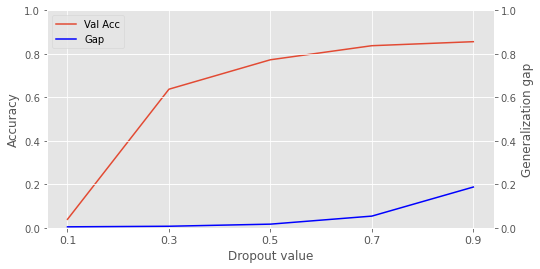

In [325]:
fig,_,_ = plot_dropout(model_dropouts)
fig.savefig('dropout.pdf',format='pdf')

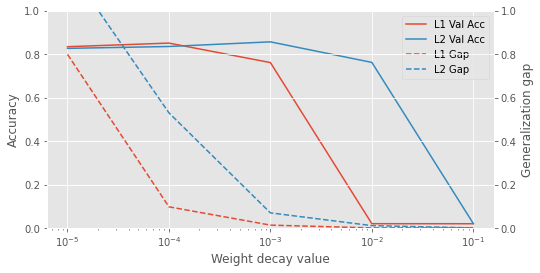

In [338]:
fig,_,_ = plot_with_generalization_gap(models_penalties_new)
fig.savefig('penalties-no-bias.pdf',format='pdf')

In [327]:
num_layers = [1,2,3]
val_accs_depth = []
train_accs_depth = []
gen_gaps_depth = []
for stats,keys,hidden_layer in models_vary_layers:
    val_accs_depth.append(stats[1:,keys['acc(valid)']][-1])
    train_accs_depth.append(stats[1:,keys['acc(train)']][-1])
    gen_gaps_depth.append(abs(stats[1:,keys['error(train)']][-1] - stats[1:,keys['error(valid)']][-1]))
print("Number of layers for varying depth:",num_layers)
print("Train Accuracies:",train_accs_depth)
print("Validation Accuracies:",val_accs_depth)
print("Generalization Gaps:",gen_gaps_depth)

Number of layers for varying depth: [1, 2, 3]
Train Accuracies: [9.368400000000031e-01, 0.9599300000000115, 0.9577500000000109]
Validation Accuracies: [0.8065189873417719, 0.8135443037974683, 0.8225949367088607]
Generalization Gaps: [0.7996625716803819, 1.4875987525225225, 1.569889042475124]


In [328]:
valid_accs_l1 = []
train_accs_l1 = []
train_accs_l2 = []
valid_accs_l2 = []
gen_gaps_l1 = []
gen_gaps_l2 = []
for stats,keys,penalty_name,penalty_val in models_penalties:
    if penalty_name == 'L1':
        valid_accs_l1.append(stats[1:,keys['acc(valid)']][-1])
        train_accs_l1.append(stats[1:,keys['acc(train)']][-1])
        gap_l1 = abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1])
        gen_gaps_l1.append(gap_l1)
    if penalty_name == 'L2':
        valid_accs_l2.append(stats[1:,keys['acc(valid)']][-1])
        train_accs_l2.append(stats[1:,keys['acc(train)']][-1])
        gap_l2 = abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1])
        gen_gaps_l2.append(gap_l2)
print("Values used for penalties:",[1e-5,1e-4,1e-3,1e-2,1e-1])
print("Train accuracies for L1 Penalty", train_accs_l1)
print("Train accuracies for L2 Penalty", train_accs_l2)        
print("Validation accuracies for L1 Penalty",valid_accs_l1)
print("Validation accuracies for L2 Penalty",valid_accs_l2)
print("Generalization Gaps for L1 Penalty", gen_gaps_l1)
print("Generalization Gaps for L2 Penalty", gen_gaps_l2)

Values used for penalties: [1e-05, 0.0001, 0.001, 0.01, 0.1]
Train accuracies for L1 Penalty [0.9473000000000071, 0.8726499999999999, 0.7626299999999986, 0.021099999999999935, 0.02123999999999994]
Train accuracies for L2 Penalty [0.9557200000000107, 0.9448900000000071, 0.8715199999999997, 0.7635099999999988, 0.021099999999999924]
Validation accuracies for L1 Penalty [0.8331645569620254, 0.8462025316455696, 0.755379746835443, 0.021265822784810092, 0.021582278481012625]
Validation accuracies for L2 Penalty [0.8222784810126581, 0.836392405063291, 0.8498734177215186, 0.759620253164557, 0.0212658227848101]
Generalization Gaps for L1 Penalty [0.8118680416812516, 0.09549952073405876, 0.018030731824687396, 4.132451416616334e-07, 1.0327801147624882e-06]
Generalization Gaps for L2 Penalty [1.240495249154736, 0.51983037616703, 0.06952482069524707, 0.007719027137877199, 5.455458996550533e-05]


In [336]:
val_accs_dropout = []
train_accs_dropout = []
generalization_gaps_dropout = []
for stats,keys in model_dropouts:
    val_accs_dropout.append(stats[1:,keys['acc(valid)']][-1])
    train_accs_dropout.append(stats[1:,keys['acc(train)']][-1])
    generalization_gaps_dropout.append(abs(stats[1:,keys['error(train)']][-1] - stats[1:,keys['error(valid)']][-1]))
print("Results for the following include probs:",[0.9,0.7,0.5,0.3,0.1])    
print("Training accuracies:", train_accs_dropout)
print("Validation accuracies:", val_accs_dropout)
print("Generalization Gap:",generalization_gaps_dropout)

Results for the following include probs: [0.9, 0.7, 0.5, 0.3, 0.1]
Training accuracies: [0.9070299999999971, 0.8510500000000016, 0.777049999999998, 0.6355199999999999, 0.04075000000000002]
Validation accuracies: [0.8559493670886072, 0.8374683544303795, 0.7727848101265818, 0.6374050632911394, 0.03905063291139236]
Generalization Gap: [0.18748986410067806, 0.05377001285376942, 0.01680079826612857, 0.007121487334753818, 0.0045039867239307085]


In [329]:
#print(models_experimental_l1)
val_accs_experimental_dropout_l1 = []
train_accs_experimental_dropout_l1 = []
gap_experimental_dropout_l1 = []
list_params = []
penalties = [1e-5,1e-4]
dropouts = [0.95,0.85,0.8,0.75]
for prob in dropouts:
    for penalty in penalties:
        list_params.append((prob,penalty))
for stats,keys in models_experimental_l1:
    train_accs_experimental_dropout_l1.append(stats[1:,keys['acc(train)']][-1])
    val_accs_experimental_dropout_l1.append(stats[1:,keys['acc(valid)']][-1])
    gap_experimental_dropout_l1.append(abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1]))
print("Dropout,penalty combinations used:",list_params)
print('Train accuracies:', train_accs_experimental_dropout_l1)
print('Validation accuracies:',val_accs_experimental_dropout_l1)
print('Generalization gaps:',gap_experimental_dropout_l1)

Dropout,penalty combinations used: [(0.95, 1e-05), (0.95, 0.0001), (0.85, 1e-05), (0.85, 0.0001), (0.8, 1e-05), (0.8, 0.0001), (0.75, 1e-05), (0.75, 0.0001)]
Train accuracies: [0.9176999999999979, 0.8668499999999992, 0.8830199999999973, 0.8487400000000017, 0.8723000000000005, 0.8388600000000025, 0.8606900000000012, 0.8290900000000004]
Validation accuracies: [0.861012658227848, 0.8524050632911393, 0.8597468354430382, 0.840632911392405, 0.8565822784810125, 0.8312658227848096, 0.8466455696202527, 0.8249999999999996]
Generalization gaps: [0.21420526053818478, 0.046048721925616154, 0.08264510951664533, 0.02366951909635384, 0.0644497093782388, 0.017355478062932528, 0.0443220075597614, 0.013667922516533815]


In [330]:
val_accs_experimental_dropout_l2 = []
train_accs_experimental_dropout_l2 = []
gap_experimental_dropout_l2 = []
penalties = [1e-5,1e-4]
dropouts = [0.95,0.85,0.8,0.75]
list_params = []
for prob in dropouts:
    for penalty in penalties:
        list_params.append((prob,penalty))
for stats,keys in models_experimental_l2:
    train_accs_experimental_dropout_l2.append(stats[1:,keys['acc(train)']][-1])
    val_accs_experimental_dropout_l2.append(stats[1:,keys['acc(valid)']][-1])
    gap_experimental_dropout_l2.append(abs(stats[1:,keys['error(valid)']][-1] - stats[1:,keys['error(train)']][-1]))
print("Dropout,penalty combinations used:",list_params)
print('Train accuracies:', train_accs_experimental_dropout_l2)
print('Validation accuracies:',val_accs_experimental_dropout_l2)
print('Generalization gaps:',gap_experimental_dropout_l2)

Dropout,penalty combinations used: [(0.95, 1e-05), (0.95, 0.0001), (0.85, 1e-05), (0.85, 0.0001), (0.8, 1e-05), (0.8, 0.0001), (0.75, 1e-05), (0.75, 0.0001)]
Train accuracies: [0.9230199999999975, 0.910789999999996, 0.890759999999997, 0.8763199999999995, 0.8757899999999987, 0.8667000000000009, 0.8621800000000003, 0.8528200000000016]
Validation accuracies: [0.8522151898734182, 0.8620886075949366, 0.8604430379746835, 0.8570253164556964, 0.854556962025316, 0.8537341772151893, 0.8470886075949371, 0.8419620253164559]
Generalization gaps: [0.27446814969237643, 0.1698473673427885, 0.11067963605179343, 0.0726229338547753, 0.07816641997041762, 0.05147694293721572, 0.059742786335793885, 0.03943616577122022]


In [334]:
gap = list(zip(gap_experimental_dropout_l1,gap_experimental_dropout_l2))
gaps = []
for tup in gap:
    gaps.extend([tup[0],tup[1]])
#print(len(gaps))    

[(0.21420526053818478, 0.27446814969237643), (0.046048721925616154, 0.1698473673427885), (0.08264510951664533, 0.11067963605179343), (0.02366951909635384, 0.0726229338547753), (0.0644497093782388, 0.07816641997041762), (0.017355478062932528, 0.05147694293721572), (0.0443220075597614, 0.059742786335793885), (0.013667922516533815, 0.03943616577122022)]
16


In [263]:
dropouts = [0.95,0.85,0.8,0.75]
penalties = [1e-5,1e-4]
penalty_names = ['L1','L2']
labels = []
for dropout in dropouts:
    for penalty in penalties:
        for penalty_name in penalty_names:
            labels.append(f"Dropout:{dropout} & {penalty_name}:{penalty}")
print("Labels for the experiments:",labels)

Labels for the experiments: ['Dropout:0.95 & L1:1e-05', 'Dropout:0.95 & L2:1e-05', 'Dropout:0.95 & L1:0.0001', 'Dropout:0.95 & L2:0.0001', 'Dropout:0.85 & L1:1e-05', 'Dropout:0.85 & L2:1e-05', 'Dropout:0.85 & L1:0.0001', 'Dropout:0.85 & L2:0.0001', 'Dropout:0.8 & L1:1e-05', 'Dropout:0.8 & L2:1e-05', 'Dropout:0.8 & L1:0.0001', 'Dropout:0.8 & L2:0.0001', 'Dropout:0.75 & L1:1e-05', 'Dropout:0.75 & L2:1e-05', 'Dropout:0.75 & L1:0.0001', 'Dropout:0.75 & L2:0.0001']


In [316]:
def plot_3d_experiments(val_accs,gen_gaps,notebook=True):
    fig_1 = plt.figure(figsize=(20,6))
    ax_acc = fig_1.add_subplot(121,projection='3d')
    #fig_2 = plt.figure(figsize=(10,6))
    ax_gap = fig_1.add_subplot(122,projection='3d')
    
    dropout_vals = [0.95,0.85,0.8,0.75]
    penalty_vals = [1e-5,1e-4]
    penalty_names = ['L1','L2']
    labels = []
    Xa = []
    Ya = []
    
    colors = ["red","orange","blue","pink","yellow","green","black","gray","cyan","purple","magenta","brown","salmon",
             "lime","teal","peru"]
    for dropout in dropout_vals:
        for penalty in penalty_vals:
            for penalty_name in penalty_names:
                labels.append(f"D:{dropout} & {penalty_name}:{penalty}")
    
    for dropout in dropout_vals:
        for val in [dropout]*4:
            Xa.append(val)
            
    for penalty in penalty_vals:
        Ya.extend([penalty,penalty])
    
    Ya = Ya*4
    #Xa = [0.95,0.95,0.95,0.95,0.85,0.85,0.85,0.85,0.8,0.8,0.8,0.8,0.75,0.75,0.75,0.75]
    #Ya = [1e-5,1e-5,1e-4,1e-4,1e-5,1e-5,1e-4,1e-4,1e-5,1e-5,1e-4,1e-4,1e-5,1e-5,1e-4,1e-4]
    
    for idx,val in enumerate(Xa):
        ax_acc.scatter(Xa[idx],Ya[idx],val_accs[idx],c=colors[idx],label=labels[idx],cmap='Spectral')
    ax_acc.set_xlabel("Dropout value")
    ax_acc.set_ylabel("Weight decay value")
    ax_acc.set_zlabel("Accuracy")
    
    ax_acc.legend(bbox_to_anchor=(0.5,-0.3),loc='upper center',fancybox=True,ncol=1)
    for idx,val in enumerate(Xa):
        ax_gap.scatter(Xa[idx],Ya[idx],gen_gaps[idx],c = colors[idx],label=labels[idx],cmap='Spectral')
    ax_gap.set_xlabel("Dropout value")
    ax_gap.set_ylabel("Weight decay value")
    ax_gap.set_zlabel("Generalization gap")
    
    ax_gap.legend(bbox_to_anchor=(0.5,-0.3),loc='upper center',fancybox=True,ncol=1)
    
    return fig_1,ax_acc,ax_gap

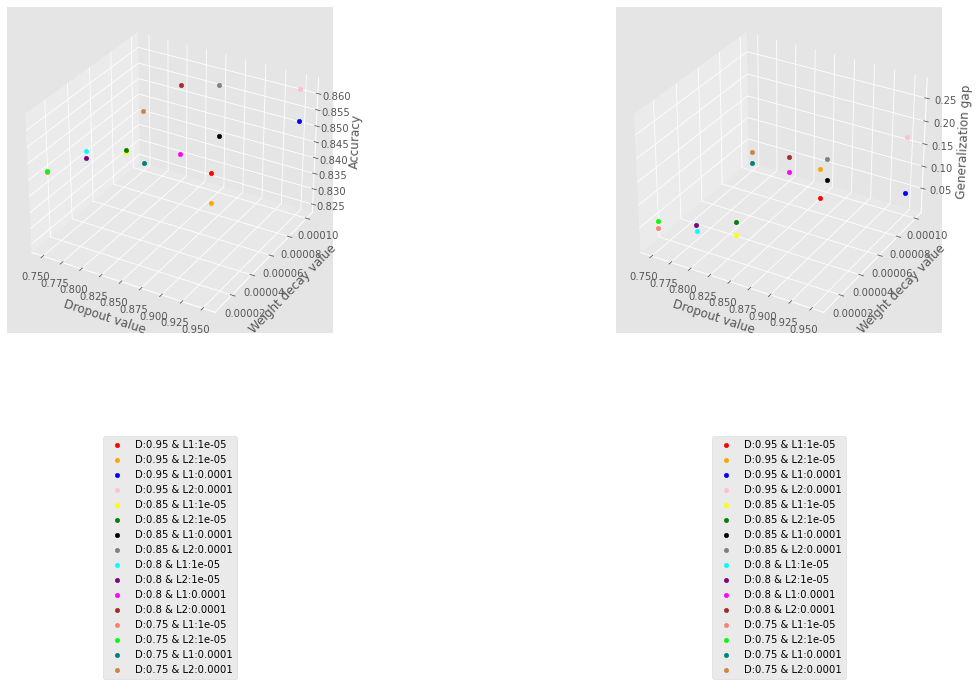

In [335]:
#gaps = [0.056687341772149846, 0.07080481012657935, 0.014444936708859935, 0.04870139240505944, 0.023273164556959047,
        #0.030316962025313532, 0.00810708860759668, 0.019294683544303193, 0.01571772151898798,0.02123303797468279, 
        #0.007594177215192843,0.01296582278481162, 0.014044430379748452, 0.015091392405063186, 0.004090000000000815,
        #0.010857974683545657]
val_accs = [0.861012658227848,0.8522151898734182, 0.8524050632911393, 0.8620886075949366, 0.8597468354430382, 
             0.8604430379746835, 0.840632911392405,0.8570253164556964, 0.8565822784810125, 0.854556962025316, 
             0.8312658227848096, 0.8537341772151893,  0.8466455696202527, 0.8470886075949371,0.8249999999999996, 
             0.8419620253164559]
gap = list(zip(gap_experimental_dropout_l1,gap_experimental_dropout_l2))
gaps = []
for tup in gap:
    gaps.extend([tup[0],tup[1]])

fig_1,_,_ = plot_3d_experiments(val_accs,gaps)
fig_1.savefig("experiments.pdf",bbox_inches='tight',format='pdf')
#fig_2.savefig("experiments_gap.svg",bbox_inches='tight',format='svg')

In [280]:
# I have created a max pooling layer to conduct experiments on maxout networks for the literature review  
from mlp.layers import Layer
class MaxPoolingLayer(Layer):
    def __init__(self,pool_size=2):
        self.pool_size = pool_size
        
    def fprop(self,inputs):
        assert inputs.shape[-1]%self.pool_size == 0
        pooled_inputs = inputs.reshape(inputs.shape[:-1] + (inputs.shape[-1]//self.pool_size,self.pool_size))
        pooled_max = pooled_inputs.max(axis=-1)
        self.mask = pooled_inputs == pooled_max[...,None]
        return pooled_max
    
    def bprop(self,inputs,outputs,grad_wrt_outputs):
        return (self.mask*grad_wrt_outputs[...,None]).reshape(inputs.shape)
    
    def __repr__(self):
        return 'MaxPoolingLayer(pool_size={0})'.format(self.pool_size)
        

In [ ]:
def train_maxout_network():
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    input_dim,output_dim,hidden_dim = 784,47,128
    num_epochs = 100
    learning_rate= 0.1
    error = CrossEntropySoftmaxError()
    learning_rule = AdamLearningRule()
    pool_size=4
    stats_interval = 1
    dropouts = [0.95,0.8,0.7]
    model_stats = []
    for prob in dropouts:
        model = MultipleLayerModel([
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(input_dim,hidden_dim*pool_size,weights_init,biases_init,weights_penalty=L2Penalty(1e-4),
                   biases_penalty=L2Penalty(1e-4)),
        #ReluLayer(),
        MaxPoolingLayer(pool_size),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim,hidden_dim*pool_size,weights_init,biases_init,weights_penalty=L2Penalty(1e-4),
                   biases_penalty=L2Penalty(1e-4)),
        #ReluLayer(),
        MaxPoolingLayer(pool_size),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim,hidden_dim*pool_size,weights_init,biases_init,weights_penalty=L2Penalty(1e-4),
                   biases_penalty=L2Penalty(1e-4)),
        #ReluLayer(),
        MaxPoolingLayer(pool_size),
        DropoutLayer(rng,incl_prob=prob,share_across_batch=False),
        AffineLayer(hidden_dim,output_dim,weights_init,biases_init,weights_penalty=L2Penalty(1e-4),
                   biases_penalty=L2Penalty(1e-4))
    ])
        stats,keys = train_model(model,error,learning_rule, train_data, 
                                 valid_data, num_epochs, stats_interval, notebook = True)
        model_stats.append((stats,keys))
    return model_stats

model_stats_maxout = train_maxout_network()

In [299]:
def plot_maxout(models,stats_interval,notebook=True):
    #Value to be varried could be width,depth,L1/L2
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    
    for k in ['error(train)','error(valid)']:
        for stats,keys in models: #parameter_val is the numeric value of the value_to_be_varried
            if k == 'error(train)':
                ax_1.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],
                         label=k)
            else:
                ax_1.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],'--',
                         label=k)
                
    ax_1.legend(loc="upper center",bbox_to_anchor=(0.5,-0.2))
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    
    for k in ['acc(train)','acc(valid)']:
        for stats,keys in models: #parameter_val is the numeric value of the value_to_be_varried
            if k == 'acc(train)':
                ax_2.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],
                         label=k)
            else:
                ax_2.plot(np.arange(1, stats.shape[0])*stats_interval,stats[1:,keys[k]],'--',
                         label=k)
    
    ax_2.legend(loc="upper center",bbox_to_anchor=(0.5,-0.2))
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel("Accuracy")
    
    return fig_1,ax_1,fig_2,ax_2 

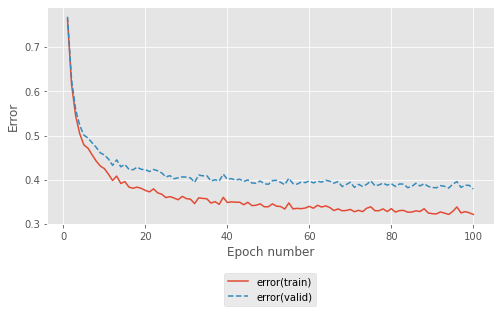

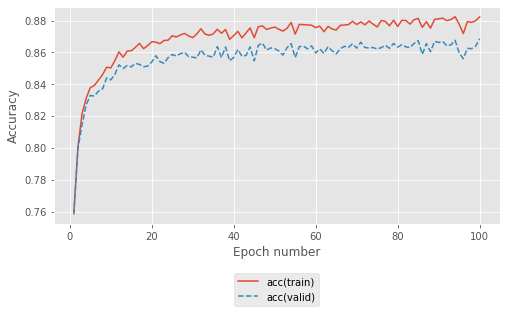

In [300]:
fig_1,_,fig_2,_ = plot_maxout(model_stats_maxout,stats_interval=1,notebook=True)